# **PROBLEM SOLVING DESIGN**

![Lean StartUp Feedback Loop](../img/project_structure/lean_startup_feedback_loop.jpg)

# **BUSINESS CONTEXT**

## **What is the company?**

Hotmart

## **What is its business model?**

Two-sided marketplace. It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.

## **What is the company stage on the market?**

"Virality" (Lean Analytics) or "early majority" (Innovation Adoption Curve). The company found a pain in the market and validated a product that solves the pain; now is the time to increase the customer base.

# **BUSINESS PROBLEM**

## **What is the business problem the company is facing?**

The company wants to get insight based on customers' data in order to unveil new product opportunities, especially in terms of product success, customer segmentation, and revenue estimation.

## **What is the business solution that this project has to deliver?**

A presentation of storytelling insights based on the available data and, possibly, answers to the following questions:
- Does Hotmart depend on the biggest producers on the platform? That is, the top-selling producers are responsible for most of the
Hotmart billing?
- Are there any relevant patterns or trends in the data?
- It is possible to segment users based on their characteristics (revenue, product niche, etc.)?
- What features most impact the success of a product? that is, the What makes a product sell more?
- It is possible to estimate how much revenue Hotmart will generate in the next three months from the last month shown in the dataset?

**References:**
- Case description
- https://hotmart.com/pt-br

# **SCOPE AND BUSINESS ASSUMPTIONS**

- **Affiliate comission is NaN ---> 0**

- **...**


REFERENCES:
...

# **SOLUTION STRATEGY**

![IoT method](../img/project_structure/iot_method.png)*IOT (Input-Output-Taks) is a planning strategy to structure a problem solution and make sure it delivers a solution that solves the initial problem.*

### INPUT

- **Business context**:
    - It is a platform for buying, selling and promoting digital products in which Hotmart connects product creators/disseminators to their customers.
    - In principle, Hotmart makes money by **taxing**, either the creators or the disseminators, **a percentage of the purchase by the customer**.
- **Business problem**:
    - The company wants to get **insights** based on customers' data in order to **unveil new product opportunities**, especially in terms of product success, customer segmentation, and revenue estimation.
- **Business questions**:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
    - Are there any **relevant patterns or trends** in the data?
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
    - What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
- **Available data**:
    - Data referring to a **sample of purchases made** at Hotmart in 2016. These are more than 1.5 million records of purchases made on our **platform**.

### OUTPUT 

- A presentation of storytelling insights based on the available data and, possibly, answers to the previous questions.

### TASKs

- *QUESTION*:
    - Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues

<br >

- *QUESTION*:
    - Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.

<br >

- *QUESTION*:
    - It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)

<br >      

- *QUESTION*:
    - What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.

<br >

- *QUESTION*:
    - It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

# **PRODUCT BUILDING ROADMAP**

![CRISP-DS Framework](../img/project_structure/crisp_ds.jpg)

---
---
---

# **0 - HELPERS**

## 0.1 - Libraries

*Import required libraries*

In [1]:
# don't cache libraries (especially project library)
%load_ext autoreload
%autoreload 2

In [2]:
# setup and environment
import os
from   pathlib import Path

# save artifacts
import pickle

# data extraction
from sqlalchemy import create_engine

# data manipulation
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# statistics
from scipy.stats import mannwhitneyu

# sklearn pipelines
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config; set_config(display='diagram')
from sklearn.compose import make_column_selector
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder

# model tracking
import mlflow

# clustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# time series
import pmdarima as pm
from prophet import Prophet
from prophet.plot import plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

# project library
from project_lib.initial_config import initial_settings
from project_lib.data_description import (check_dataframe, inspect_dtypes, 
                                          check_na_unique_dtypes, check_dtype_convertion,
                                          summary_statistics, categorical_summary, datetime_summary
                                          )
from project_lib.data_exploration import (numerical_plot, categorical_plot, datetime_plot,
                                          create_cramer_v_dataframe)
from project_lib.ab_testing import check_for_bias
from project_lib.clustering_analysis import silhouette_inspection

/home/ds-gustavo-cunha/.pyenv/versions/hotmart_case/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## 0.2 - Functions

*Define functions that will be used on the project*

NOTE: Most functions made for this project are inside the project library. That is, **a package called "project_lib" was created to hold all functions that will be needed for this project.**


For further details, please check the modules inside "project_lib" package [in other words, check .py files inside project_lib folder]

In [3]:
# example of function created for this project
help(check_dataframe)

Help on function check_dataframe in module project_lib.data_description:

check_dataframe(dataframe: pandas.core.frame.DataFrame, summary_stats=False, head: bool = False, size: int = 5) -> None
    It displays the number of NAs, the percentage of NA, the number of unique values and
    the data type for each column.
    It can (depending on summary_stats param) also displays dataframe shape and
    also displays statistics for numerical variables.
    Finally, it displays the dataframe head or a random sample of dataframe according to user choice.
    
    Args
        dataframe: the pandas dataframe that the user wants to check.
        summary_stats: a boolean to indicate if user wants to see summary statistic
            for numerical features.
        head: boolean that indicate if user wants to see
            the head of the dataframe (True) or
            a sample of the dataframe (False)
        size: size of the dataframe.head() or dataframe.sample() function .
    
    Return

## 0.3 - Setup

*Define basic configurations*

In [4]:
# initial setup of dataframes and plots
initial_settings(storytelling=False)

## 0.4 - Constants

*Define reusuable constants*

In [5]:
# define the project root path that will be the "baseline" for all paths in the notebook
PROJECT_ROOT_PATH = Path.cwd().parent
PROJECT_ROOT_PATH

PosixPath('/home/ds-gustavo-cunha/Projects/hotmart_case')

In [6]:
# # variables to connect to data source
# HOST=os.environ["HOST"]
# PORT=os.environ["PORT"]
# USER=os.environ["USER"]
# PASSWORD=os.environ["PASSWORD"]
# SCHEMA=os.environ["SCHEMA"]
# TABLE=os.environ["TABLE"]

# **1 - DATA EXTRACTION**

## 1.1 - Entity Relationship Diagram

*Display Entity-Relationship Diagram to a better data understanding*

In [7]:
# Not available -> datasets are already merged

## 1.2 - Data Fields Description

*Describe available data in regard to database information*


---

Na Hotmart, possuímos três principais personas que integram nosso negócio: os produtores, os afiliados e os compradores.
- Produtores são pessoas que criam produtos digitais na Hotmart, como cursos de idiomas, ebooks de receitas culinárias, audiolivros, softwares, dentre muitos outros exemplos.
- Afiliados são pessoas que promovem produtos dos produtores em troca de uma comissão na venda, que varia de produto para produto, e de afiliado para afiliado.
- Compradores são pessoas que adquirem um ou mais produtos digitais.
    
Uma venda é feita por um afiliado quando alguém clica em um link de afiliados. Eles geralmente fazem a promoção desses produtos em redes sociais, vídeos, anúncios, etc.

Já uma venda é feita por um produtor quando alguém tem acesso direto ao seu produto, sem intermediação do afiliado. Por exemplo, pessoas que seguem o Whindersson Nunes no Youtube e entraram em seu site oficial para adquirir seu produto, ou clicaram no link do produto sem código de afiliação.

---

---

Durante sua avaliação, você irá analisar dados referentes a uma amostra de compras feitas na Hotmart em 2016. Tratam-se de mais de 1,5 milhão registros de compras realizadas em nossa plataforma. Abaixo, nós iremos detalhar o que significa cada campo:
- **purchase_id**: Identificação da compra na Hotmart;
- **product_id**: Identificação do produto na Hotmart;
- **affiliate_id**: Identificação do afiliado na Hotmart;
- **producer_id**: Identificação do produtor na Hotmart;
- **buyer_id**: Identificação do comprador na Hotmart;
- **purchase_date**: Data e hora em que a compra foi realizada;
- **product_creation_date**: Data e hora em que o produto foi criado na Hotmart;
- **product_category**: categoria do produto na Hotmart. Exemplo: e-book, software, curso online, e-tickets, etc.;
- **product_niche**: nicho de mercado que o produto faz parte. Exemplo: educação, saúde e bem-estar, sexualidade, etc.;
- **purchase_value**: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a confidencialidade. O valor apresentado no dataset é o z-score do valor real;
- **affiliate_commission_percentual**: percentual de comissão que o afiliado receberá da compra;
- **purchase_device**: tipo de dispositivo utilizado no momento da compra, como: Desktop, Mobile, Tablet, ou Outros;
- **purchase_origin**: endereço do site do qual a pessoa veio antes da compra. Por exemplo, se uma pessoa veio do Facebook, Youtube, ou até mesmo de outra página no site oficial do produto;
- **is_origin_page_social_network**: informa se essa compra veio de uma URL do Facebook, Youtube, Instagram, Pinterest, ou Twitter.

---

---

Algumas regras de negócio:
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;
- No campo purchase_origin nós apenas consideramos o host do site. Isso quer dizer que, se uma pessoa veio do site www.meuproduto.com/promocoes, esse campo só irá retornar o valor www.meuproduto.com;

---

## 1.3 - Data Loading

*Load data from required files*

In [8]:
# # define connection "endpoint"
# db_connection_str = f'mysql+pymysql://{USER}:{PASSWORD}@{HOST}/{SCHEMA}'
# # create an engine to connect to database
# db_connection = create_engine(db_connection_str)

# # define query to get data
# query=f"""
# SELECT *
# FROM {TABLE}
# """

# # read all data from database
# df_sql = pd.read_sql(sql=query, con=db_connection)
# df_sql

In [9]:
# # save data to parquet so as to not overload database server unnecessarily
# df_sql.to_parquet(
#     path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
# )

In [10]:
# read data from local source
df_extraction = pd.read_parquet(
    path=os.path.join(PROJECT_ROOT_PATH, "data", "raw_data", "customer_data.parquet")
)

# inspect results
df_extraction.sample(5)

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
16303       10872256      122903       3776170      3776170   5931376  \
250187      11343371      187672       2685881      2685881   6257888   
1296309     13421481      202902       4462059      4462059   5892122   
567297      11999633      170593       4245842      4245842   3780771   
128470      11096679      101445       2475806      2475806    195164   

              purchase_date product_creation_date product_category   
16303   2016-01-03 14:55:41   2014-11-06 03:53:55    Phisical book  \
250187  2016-01-31 20:20:57   2015-11-24 07:42:35    Phisical book   
1296309 2016-05-30 02:31:19   2016-02-06 12:20:28    Phisical book   
567297  2016-03-12 00:26:41   2015-08-28 19:09:45    Phisical book   
128470  2016-01-17 01:34:21   2014-05-24 16:53:20          Podcast   

               product_niche  purchase_value  affiliate_commission_percentual   
16303                Careers          -0.171                            0.000  \
250187           Negotiation          -0.455                            0.000   
1296309      Procrastination          -0.171                            0.000   
567297           Negotiation          -0.171                            0.000   
128470   Presentation skills          -0.457                            0.000   

        purchase_device purchase_origin is_origin_page_social_network  Venda  
16303          eReaders     Origin e03b                           0,0      1  
250187         eReaders     Origin a8fd                           0,0      1  
1296309        eReaders     Origin 55a6                           0,0      1  
567297          Desktop     Origin cf02                           0,0      1  
128470          Desktop     Origin 4321                           0,0      1  

[5 rows x 15 columns]

# **2 - DATA DESCRIPTION**

## 2.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [11]:
# create a restore point of the previous section
df_description = df_extraction.copy()

# check dataframe for this new section
check_dataframe( dataframe=df_description, summary_stats=True, head=True )

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.head(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
0      1663958        6640        209372       116238   1200397  \
1      1677087        2350        141418         2821   1083764   
2      2017360       35669        618642       618642   1436106   
3      2017379       57998       1164511        70388   1436118   
4      2017382       58329       1261488       221253   1386357   

        purchase_date product_creation_date product_category   
0 2016-06-26 12:00:00   2011-03-19 15:47:36            Video  \
1 2016-06-26 12:00:00   2010-07-05 01:50:15          Podcast   
2 2016-06-26 12:00:00   2012-06-13 02:59:37          Podcast   
3 2016-06-26 12:00:00   2013-05-07 08:51:31          Podcast   
4 2016-06-26 12:00:00   2013-05-12 08:12:06          Podcast   

         product_niche  purchase_value  affiliate_commission_percentual   
0  Presentation skills            -0.3                              NaN  \
1     Child psychology            -0.2                              NaN   
2  Presentation skills            -0.5                              NaN   
3   Anxiety management            -0.4                              NaN   
4     Teaching English            -0.5                              NaN   

  purchase_device purchase_origin is_origin_page_social_network  Venda  
0        Smart TV     Origin ef2b                           0,0      1  
1        Smart TV     Origin ef2b                           0,0      1  
2        Smart TV     Origin ef2b                           0,0      1  
3        Smart TV     Origin ef2b                           0,0      1  
4        Smart TV     Origin ef2b                           0,0      1  

[5 rows x 15 columns]

*************************************************


In [12]:
# delete previous section dataframe to save memory
lst = [df_extraction]
del lst
del df_extraction

## 2.2 - Rename Columns

*Search for misleading or error-prone column names*

In [13]:
# inspect column names
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'Venda'],
      dtype='object')

In [14]:
# lower the case of venda column
df_description = df_description.rename(columns={"Venda": "sell"})

# inspect results
df_description.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'purchase_origin', 'is_origin_page_social_network',
       'sell'],
      dtype='object')

## 2.3 - Check Data Dimensions

*Check dataframe dimensions to know if pandas will be enough to handle such data size or we will need Big Data tools like Spark*

In [15]:
# check number of rows and columns
print( f'\
Dataframe has {df_description.shape[0]:,} \
rows and {df_description.shape[1]} columns' )

Dataframe has 1,599,828 rows and 15 columns


## 2.4 - Data Types

*Check if data types on dataframe makes sense according to database information*

In [16]:
# define shape before dtype convertion
shape_before = df_description.shape

# inspect dataframe types
inspect_dtypes(df_description, 15)

In [17]:
# inspect basic column descriptions
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 660.704 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 



In [18]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [19]:
# print report
print(
    f"Unique values in colum 'sell': {set(df_description['is_origin_page_social_network'].tolist())}"
)

# convert column is_origin_page_social_network to boolean
df_description["is_origin_page_social_network"] = df_description["is_origin_page_social_network"].apply( lambda x: True if x == '0,0' else False if x == '1,0' else "NaN")

# print report
print(
    f"Unique values in colum 'sell' after transformation: {set(df_description['is_origin_page_social_network'].tolist())}"
)

Unique values in colum 'sell': {'1,0', '0,0'}
Unique values in colum 'sell' after transformation: {False, True}


In [20]:
# sanity check
assert df_description.shape == shape_before, "Data was missed during dtype convertion"

## 2.5 - Data Validation

*Check if columns make sense in regard to business understanding*

In [21]:
# as data was already made available to us 
# and there is no way to validate data source,
# no need for data validation right now.

## 2.6 - Check Duplicated Rows

*Inspect duplicated rows and handle them properly*

In [22]:
# define dataframe grain
grain = ["purchase_id"]

# check duplicated rows
print(
    f'{"*"*49}\n\n'
    f'There are {df_description.duplicated(keep=False).sum():,} '
    f'duplicated rows [{df_description.duplicated(keep=False).mean()*100:.2f}%] based on all columns. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}\n\n'
    f'Dataframe granularity: {grain}\n\n'
    f'There are {df_description.duplicated(subset=grain, keep=False).sum():,} duplicated rows '
    f'[{df_description.duplicated(subset=grain, keep=False).mean()*100:.2f}%] based on table granularity. '
    f'Duplicated rows are double counted.'
    f'\n\n{"*"*49}'
)

*************************************************

There are 0 duplicated rows [0.00%] based on all columns. Duplicated rows are double counted.

*************************************************

Dataframe granularity: ['purchase_id']

There are 0 duplicated rows [0.00%] based on table granularity. Duplicated rows are double counted.

*************************************************


## 2.7 - Check Missing Values

*Inspect number and percentage of missing value per column to decide what to do with them*

In [23]:
#  get number of NA, percent of NA, number of unique and column type
check_na_unique_dtypes(df_description);

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 



In [24]:
# print report
print(
    f'affiliate_commission_percentual\n'
    f'\tmax value {df_description["affiliate_commission_percentual"].max(skipna=True)}\n'
    f'\tmin value {df_description["affiliate_commission_percentual"].min(skipna=True)}'
)

affiliate_commission_percentual
	max value 100.0
	min value 0.0


## 2.8 - Handle Missing Values

*Handle missing value for columns*

**Business rule**
- Quando a compra for feita diretamente pelo produtor, ou seja, quando não houver afiliado intermediando a compra, o campo affiliate_commission_percentual terá valor 0, e o campo affiliate_id será igual ao producer_id;

In [25]:
# get number of NaN in affiliate_commission_percentual
num_nas = df_description["affiliate_commission_percentual"].isna().sum()

In [26]:
# inspect rows where affiliate_commission_percentual is NaN to validate business rule
df_description.loc[
    df_description["affiliate_commission_percentual"].isna(),
    ["affiliate_commission_percentual", "affiliate_id", "producer_id"]    
].sample(5, random_state=7)

affiliate_commission_percentual  affiliate_id  producer_id
85                               NaN        213339       213339
106                              NaN        195000       195000
22                               NaN        431496       298517
11                               NaN        618642       618642
65                               NaN          8716       361052

[5 rows x 3 columns]

In [27]:
# as NaNs in affiliate_commission_percentual don't seem to be due to business rule,
# let's fill NaN with -1 (number outside of the scope of min-max range)
df_description["affiliate_commission_percentual"] = df_description["affiliate_commission_percentual"].fillna(value=-1)

# sanity check
assert (df_description["affiliate_commission_percentual"] == -1).sum() == num_nas, "Misleading fillna operation"

## 2.9 - Descriptive Statistics

*Inspect some summary statistics for numerical columns*

In [28]:
# split dataset into types of features
df_number = df_description.select_dtypes(include=["number", "bool"])
df_date = df_description.select_dtypes(include=["datetime"])
df_string = df_description.select_dtypes(include=["object"])

# sanity check
assert df_number.shape[1] + df_date.shape[1] + df_string.shape[1] == df_description.shape[1], """Revise the previous split, something may be wrong!"""

### 2.9.1 - Numerical Variables

*Inspect numerical variables*

In [29]:
# check summary statistics
summary_statistics(df_number)

# delete previous dataframe to save memory
lst = [df_number]
del lst
del df_number



Statistics for Numerical Variables [NaNs are ignored]:


According to business rule:
- purchase_value: "valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real";
  - So it is fine to have negative values!

### 2.9.2 - Categorical Variables

*Inspect categorical variables*

In [30]:
# check overview of categorical features
categorical_summary(df_string, nunique_threshold=30, unique_name_len_threshold=50)

# delete previous dataframe to save memory
lst = [df_string]
del lst
del df_string

Overview of string columns:


------------------------------------------------- 

---> The unique values for product_category column are: [values are truncated] 

['Video', 'Podcast', 'Phisical book', 'eBook', 'In-class course', 'Workshop', 'Webinar', 'eTicket', 'Subscription', 'App']
------------------------------------------------- 

---> The unique values for product_niche column are: [values are truncated] 

['Presentation skills', 'Child psychology', 'Anxiety management', 'Teaching English', 'Online course creation', 'Media training', 'Storytelling', 'YouTube video creation', 'Procrastination', 'Organization', 'Negotiation', 'Careers', 'Personal finance', 'Filmmaking', 'Government', 'Global diplomacy', 'Immigration', 'Economics', 'Accounting', 'Biology', 'Physics', 'Genetics', 'Disease', 'Thermodynamics', 'Travel hacking']
------------------------------------------------- 

---> The unique values for purchase_device column are: [values are truncated] 

['Smart TV', 'Tablet', 'Desktop', 'eReaders', 'Cellphone']

### 2.9.3 - Datetime Variables

*Inspect datetime variables*

In [31]:
# check an overview of datetime features
datetime_summary(df_date)

# delete previous dataframe to save memory
lst = [df_date]
del lst
del df_date

### 2.9.4 - Investigate further:

*Variables to inspect the real meaning*

In [32]:
# None up to this point

# **3 - FEATURE ENGINEERING**

## 3.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [33]:
# create a restore point for the previous section dataframe
df_f_eng = df_description.copy()

# check dataframe
check_dataframe( df_f_eng )

*************************************************
Dataframe size in memory: 566.315 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 15) 

-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
545099      11952943      112514       3298020       426265   6733374  \
742506      12351961       50332       2166473       992151   6919229   
1035494     12928057      219755       6697083      6697083   3480944   
467492      11793916      138480        406079         3672   6657614   
1545735     13904968      150610       4462059      4462059   6976864   

              purchase_date product_creation_date product_category   
545099  2016-03-09 00:59:47   2014-08-13 18:48:18    Phisical book  \
742506  2016-03-31 22:26:14   2013-01-10 20:17:46          Podcast   
1035494 2016-05-03 00:34:45   2016-04-11 13:35:45    Phisical book   
467492  2016-02-28 21:30:19   2015-02-20 22:46:42    Phisical book   
1545735 2016-06-24 20:53:54   2015-05-09 16:33:03    Phisical book   

               product_niche  purchase_value  affiliate_commission_percentual   
545099           Negotiation            -0.5                             50.0  \
742506           Negotiation            -0.4                             30.0   
1035494          Immigration            -0.3                              0.0   
467492   Presentation skills             0.2                             50.0   
1545735     Child psychology             0.3                              0.0   

        purchase_device purchase_origin  is_origin_page_social_network  sell  
545099          Desktop     Origin fffb                           True     1  
742506         eReaders     Origin 49d7                           True     1  
1035494        eReaders     Origin 18eb                           True     1  
467492          Desktop     Origin 5187                           True     1  
1545735         Desktop     Origin 55a6                           True     1  

[5 rows x 15 columns]

*************************************************


In [34]:
# delete previous section dataframe to save memory
lst = [df_description]
del lst
del df_description

## 3.2 - Hypothesis Testing List

*Define the list of hypotheses that will be validated during Exploratory Data Analysis (EDA)*

**HYPOTHESIS MIND MAP**

![Business hypothesis mindmap](../img/project_structure/xxx.jpg)

*The above image is the product of a brainstorm that took into consideration many different variables that can impact the main business metric. This mind map is a great help when trying to raise hypotheses that could lead to insights. It is also helpful to guide feature engineering (create new relevant features) and when there is a need to look for more data elsewhere.*

> *Taking into consideration hypothesis mind map (at the beginning of this notebook) and the business case questions:*


**H1**. Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?

**H2**. Are there any **relevant patterns or trends** in the data?

**H3**. It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?

**H4**. What **features most impact** the success of a **product**? that is, the What makes a **product sell more**?

**H5**. It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?


## 3.3 - Feature Creation

*Create new features (columns) that can be meaningful for EDA and, especially, machine learning modelling.*

### product_age_when_purchased

In [35]:
# create a column to indicate what is the age of the product when it was purchased
# purchase_date - product_creation_date in months
# month = 0 ---> purchased on the month of creation
df_f_eng["product_age_when_purchased"] = df_f_eng["purchase_date"].dt.to_period(freq="M") - df_f_eng["product_creation_date"].dt.to_period(freq="M")
# extract the month information
df_f_eng["product_age_when_purchased"] = df_f_eng["product_age_when_purchased"].apply(lambda x: x.n)

# inspect result
df_f_eng[["product_creation_date", "purchase_date", "product_age_when_purchased"]].sample(10, random_state=7)

product_creation_date       purchase_date  product_age_when_purchased
687286    2015-12-01 12:37:00 2016-03-24 20:01:35                           3
307154    2016-01-27 22:56:37 2016-02-08 01:28:05                           1
94908     2015-01-10 15:32:09 2016-01-13 13:48:37                          12
309710    2013-01-14 13:17:37 2016-02-08 13:19:27                          37
1074287   2015-12-27 13:17:06 2016-05-06 12:38:26                           5
1398614   2016-04-11 13:35:45 2016-06-09 12:45:41                           2
1587844   2015-11-06 23:59:53 2016-06-29 12:32:21                           7
1184721   2016-04-14 21:41:31 2016-05-17 02:28:10                           1
514906    2016-02-12 14:33:39 2016-03-06 01:52:02                           1
810722    2016-02-21 18:28:50 2016-04-09 11:46:53                           2

[10 rows x 3 columns]

### binned_affiliate_commission_percentual

In [36]:
# check numerical stats for affiliate_commission_percentual and product_age_when_purchased
summary_statistics(df_f_eng[["affiliate_commission_percentual", "product_age_when_purchased"]])



Statistics for Numerical Variables [NaNs are ignored]:


In [37]:
# defiene bins to discretize affiliate_commission_percentual
bins = [-1] + [*range(0, 111, 10)] 
print(f"Chosen bins: {bins}")

# create a new column with discretized affiliate_commission_percentual
df_f_eng["binned_affiliate_commission_percentual"] = pd.cut(x=df_f_eng["affiliate_commission_percentual"], 
       bins=bins, right=False, retbins=False, include_lowest=True, ordered=True)

# inspect results
df_f_eng[["affiliate_commission_percentual", "binned_affiliate_commission_percentual"]].sample(10, random_state=14)

Chosen bins: [-1, 0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]


affiliate_commission_percentual   
1217024                              0.0  \
479333                               0.0   
1417890                             50.0   
1096048                              0.0   
63787                                0.0   
844732                              50.0   
464067                              60.0   
253831                               0.0   
343993                               0.0   
283460                              50.0   

        binned_affiliate_commission_percentual  
1217024                                [0, 10)  
479333                                 [0, 10)  
1417890                               [50, 60)  
1096048                                [0, 10)  
63787                                  [0, 10)  
844732                                [50, 60)  
464067                                [60, 70)  
253831                                 [0, 10)  
343993                                 [0, 10)  
283460                                [50, 60)  

[10 rows x 2 columns]

### binned_product_age_when_purchased

In [38]:
# defiene bins to discretize product_age_when_purchased
bins = [*range(0, 110, 10)] 
print(f"Chosen bins: {bins}")

# create a new column with discretized product_age_when_purchased
df_f_eng["binned_product_age_when_purchased"] = pd.cut(x=df_f_eng["product_age_when_purchased"], 
       bins=bins, right=False, include_lowest=True,
       retbins=False, 
       ordered=True,
       )

# inspect results
df_f_eng[["product_age_when_purchased", "binned_product_age_when_purchased"]].sample(10, random_state=14)

Chosen bins: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


product_age_when_purchased binned_product_age_when_purchased
1217024                          20                          [20, 30)
479333                            5                           [0, 10)
1417890                           7                           [0, 10)
1096048                           2                           [0, 10)
63787                            26                          [20, 30)
844732                           16                          [10, 20)
464067                           25                          [20, 30)
253831                           15                          [10, 20)
343993                           41                          [40, 50)
283460                           21                          [20, 30)

[10 rows x 2 columns]

### purchase_date_daily

In [39]:
# convert purchase_date to daily frequency and keep it as datetime format
df_f_eng["purchase_date_daily"] = df_f_eng["purchase_date"].dt.strftime('%Y-%m-%d')
df_f_eng["purchase_date_daily"] = pd.to_datetime(df_f_eng["purchase_date_daily"], format='%Y-%m-%d')

# inspect results
display(
    df_f_eng[["purchase_date", "purchase_date_daily"]].dtypes,
    df_f_eng[["purchase_date", "purchase_date_daily"]].sample(10, random_state=7)
)

purchase_date          datetime64[ns]
purchase_date_daily    datetime64[ns]
Length: 2, dtype: object

purchase_date purchase_date_daily
687286  2016-03-24 20:01:35          2016-03-24
307154  2016-02-08 01:28:05          2016-02-08
94908   2016-01-13 13:48:37          2016-01-13
309710  2016-02-08 13:19:27          2016-02-08
1074287 2016-05-06 12:38:26          2016-05-06
1398614 2016-06-09 12:45:41          2016-06-09
1587844 2016-06-29 12:32:21          2016-06-29
1184721 2016-05-17 02:28:10          2016-05-17
514906  2016-03-06 01:52:02          2016-03-06
810722  2016-04-09 11:46:53          2016-04-09

[10 rows x 2 columns]

# **4 - DATA FILTERING**

## 4.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [40]:
# create a restore point for the previous section dataframe
df_filter = df_f_eng.copy()

# check dataframe
check_dataframe( df_filter, summary_stats=True )

*************************************************
Dataframe size in memory: 595.112 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599828, 19) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
1394369     13609234      228107       4351469      4351469   6606979  \
1097934     13041937       97963       4220642       195000   7252197   
294036      11435167      111830       3258278      3258278   6483588   
518691      11900545      188577       5748460      5748460   6646916   
24920       10889697      107251       1396194      1396194   1064750   

              purchase_date product_creation_date product_category   
1394369 2016-06-08 19:49:21   2016-05-11 20:25:45    Phisical book  \
1097934 2016-05-08 15:00:07   2014-04-30 15:02:56    Phisical book   
294036  2016-02-06 17:44:21   2014-08-06 17:59:26          Podcast   
518691  2016-03-06 14:25:20   2015-11-28 22:50:23    Phisical book   
24920   2016-01-04 15:55:29   2014-06-30 15:43:12    Phisical book   

               product_niche  purchase_value  affiliate_commission_percentual   
1394369              Physics            -0.3                              0.0  \
1097934            Economics             0.1                             60.0   
294036               Careers            -0.5                              0.0   
518691   Presentation skills             0.0                              0.0   
24920                Physics            -0.5                              0.0   

        purchase_device purchase_origin  is_origin_page_social_network  sell   
1394369        eReaders     Origin e4c1                           True     1  \
1097934        eReaders     Origin 91bf                           True     1   
294036          Desktop     Origin 90f2                           True     1   
518691         eReaders     Origin dc1f                           True     1   
24920          Smart TV     Origin ef2b                           True     1   

         product_age_when_purchased binned_affiliate_commission_percentual   
1394369                           1                                [0, 10)  \
1097934                          25                               [60, 70)   
294036                           18                                [0, 10)   
518691                            4                                [0, 10)   
24920                            19                                [0, 10)   

        binned_product_age_when_purchased purchase_date_daily  
1394369                           [0, 10)          2016-06-08  
1097934                          [20, 30)          2016-05-08  
294036                           [10, 20)          2016-02-06  
518691                            [0, 10)          2016-03-06  
24920                            [10, 20)          2016-01-04  

[5 rows x 19 columns]

*************************************************


In [41]:
# delete previous section dataframe to save memory
lst = [df_f_eng]
del lst
del df_f_eng

## 4.2 Rows Filtering

*Remove rows with meaningless (or unimportant) data*

### purchase_value column

In [42]:
# According to business rule:
# - purchase_value: valor da compra. Esse dado, assim como nicho e categoria foi codificado para manter a  confidencialidade. O valor apresentado no dataset é o **z-score** do valor real;
# So it is fine to have negative values! ---> no need to filter rows!

### product_age_when_purchased column

In [43]:
# check negative product_age_when_purchased
df_filter[df_filter["product_age_when_purchased"] < 0]


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
1394257     13609042      319129       1738263      9868481   7049073  \
1438238     13692956      319129        599274      9868481   4450488   

              purchase_date product_creation_date product_category   
1394257 2016-06-08 19:41:27   2016-12-31 13:43:50    Phisical book  \
1438238 2016-06-13 05:57:13   2016-12-31 13:43:50    Phisical book   

        product_niche  purchase_value  affiliate_commission_percentual   
1394257   Negotiation             3.4                             20.0  \
1438238   Negotiation             3.5                             30.0   

        purchase_device purchase_origin  is_origin_page_social_network  sell   
1394257         Desktop     Origin 5187                           True     1  \
1438238         Desktop     Origin 6c05                           True     1   

         product_age_when_purchased binned_affiliate_commission_percentual   
1394257                          -6                               [20, 30)  \
1438238                          -6                               [30, 40)   

        binned_product_age_when_purchased purchase_date_daily  
1394257                               NaN          2016-06-08  
1438238                               NaN          2016-06-13  

[2 rows x 19 columns]

In [44]:
# define shape before filtering data
shape_before = df_filter.shape

# it order to avoid misleading data (product was sold before being created)
# we will remove these rows
df_filter = df_filter[df_filter["product_age_when_purchased"] >= 0]

# sanity check
assert (
    df_filter.shape[0] == shape_before[0] - 2
) & (
    df_filter.shape[1] == shape_before[1]
), "Misleading rows filtering!"

## 4.3 - Columns Filtering

*Remove auxiliary columns or columns that won't be available in the prediction moment*

### sell column

In [45]:
# TO-DO
# print report
print(
    f"Unique values in colum 'sell': {set(df_filter['sell'].tolist())}"
)

Unique values in colum 'sell': {1}


In [46]:
# define shape before filtering data
shape_before = df_filter.shape

# column sell is a constant column ---> remove it
df_filter = df_filter.drop(columns=["sell"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

### purchase origin

In [47]:
# inspect column
check_na_unique_dtypes(df_filter[["purchase_origin"]]);

*************************************************
Dataframe size in memory: 121.587 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599826, 1) 



*Purchase origin is a categorical column with more than 9.000 unique values. So, it would be quite complex to analyse this feature at this point of the project. Then, we decided to remove this column for this project cycle*

In [48]:
# define shape before filtering data
shape_before = df_filter.shape

# remove column
df_filter = df_filter.drop(columns=["purchase_origin"])

# sanity check
# sanity check
assert (
    df_filter.shape[0] == shape_before[0]
) & (
    df_filter.shape[1] == shape_before[1] - 1
), "Misleading columns filtering!"

# **5 - EXPLORATORY DATA ANALYSIS**

## 5.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [49]:
# create a restore point for the previous section dataframe
df_eda = df_filter.copy()

# check dataframe
check_dataframe( df_eda )

*************************************************
Dataframe size in memory: 486.323 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599826, 17) 

-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
1346842     13517475      175148        497456      3978136   7471890  \
39259       10919160      188374       5755044      5755044   5066923   
954617      12774068      129876        995328       995328   3419468   
406617      11666801       54697        599274       599274   1339908   
1058741     12967956      193975        349701       349701   5086579   

              purchase_date product_creation_date product_category   
1346842 2016-06-04 16:11:00   2015-09-21 02:32:37    Phisical book  \
39259   2016-01-06 13:45:48   2015-11-28 11:44:16    Phisical book   
954617  2016-04-24 17:20:46   2014-12-26 17:50:50    Phisical book   
406617  2016-02-21 13:10:27   2013-03-18 18:59:35    Phisical book   
1058741 2016-05-04 15:18:53   2015-12-27 13:17:06    Phisical book   

              product_niche  purchase_value  affiliate_commission_percentual   
1346842  Anxiety management             2.2                             28.3  \
39259            Accounting            -0.0                              0.0   
954617            Economics            -0.5                              0.0   
406617     Personal finance             1.6                              0.0   
1058741  Anxiety management             0.1                              0.0   

        purchase_device  is_origin_page_social_network   
1346842         Desktop                           True  \
39259          Smart TV                           True   
954617         Smart TV                           True   
406617         eReaders                           True   
1058741         Desktop                           True   

         product_age_when_purchased binned_affiliate_commission_percentual   
1346842                           9                               [20, 30)  \
39259                             2                                [0, 10)   
954617                           16                                [0, 10)   
406617                           35                                [0, 10)   
1058741                           5                                [0, 10)   

        binned_product_age_when_purchased purchase_date_daily  
1346842                           [0, 10)          2016-06-04  
39259                             [0, 10)          2016-01-06  
954617                           [10, 20)          2016-04-24  
406617                           [30, 40)          2016-02-21  
1058741                           [0, 10)          2016-05-04  

[5 rows x 17 columns]

*************************************************


In [50]:
# delete previous section dataframe to save memory
lst = [df_filter]
del lst
del df_filter

## 5.2 - Univariate Analysis

*Explore variables distributions*

In [51]:
# split dataset into types of features
df_eda_num = df_eda.select_dtypes(include=["number", "bool"])
df_eda_date = df_eda.select_dtypes(include=["datetime"])
df_eda_str = df_eda.select_dtypes(include=["object", "category"])

# sanity check
assert df_eda_num.shape[1] + df_eda_date.shape[1] + df_eda_str.shape[1] == df_eda.shape[1], """Revise the previous split, something may be wrong!"""

### 5.2.1 - Numerical Columns

In [52]:
# define categorical figure path
numerical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "numerical_fatures_eda.png")

# # plot numerical columns for base data
# numerical_plot(
#     dataframe=df_eda_num, 
#     n_cols=3,
#     hist=False,
#     save_fig=numerical_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_num]
del lst
del df_eda_num

![Numerical Univariate EDA](../img/data_exploration/numerical_fatures_eda.png)

### 5.2.2 - Categorical Columns

In [53]:
# define categorical figure path
categorical_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "categorical_fatures_eda.png")

# # plot categorical columns for base data
# categorical_plot(
#     dataframe=df_eda_str,
#     max_num_cat=10,
#     n_cols=3,
#     trunc_label=20,
#     save_fig=categorical_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_str]
del lst
del df_eda_str

![Categorical Univariate EDA](../img/data_exploration/categorical_fatures_eda.png)

### 5.2.3 Datetime Columns

In [54]:
# define datetime figure path
datetime_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "datetime_fatures_eda.png")

# # plot datetime columns for base data
# datetime_plot(
#     dataframe=df_eda_date,
#     n_cols=3,
#     save_fig=datetime_fig_path
#     )

# delete previous dataframe to save memory
lst = [df_eda_date]
del lst
del df_eda_date

![Datetime Univariate EDA](../img/data_exploration/datetime_fatures_eda.png)

## 5.3 - Bivariate Analysis

*Explore relationship between variables (in pairs)*

### 5.3.1 - Numerical variables

In [55]:
# define pairplot figure path
pairplot_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "pairplot_eda.png")

# # plot pairplot
# # don't consider id columns -> make no sense as they are "random"
# g = sns.pairplot( df_eda[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].sample(100_000), diag_kind="kde", corner=False )
# # define plot details
# for ax in g.axes.flatten():
#     # rotate x axis labels
#     ax.set_xlabel(ax.get_xlabel(), rotation = 45)
#     # rotate y axis labels
#     ax.set_ylabel(ax.get_ylabel(), rotation = 45)
#     # set y labels alignment
#     ax.yaxis.get_label().set_horizontalalignment('right')

# # save figure
# plt.savefig(pairplot_fig_path, facecolor="white", bbox_inches="tight");        

![Pairplot EDA](../img/data_exploration/pairplot_eda.png)

In [56]:
# define pairplot figure path
spearman_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "spearman_corr_eda.png")

# # calculate pearson correlation coefficient
# # don't consider id columns -> make no sense as they are "random"
# correlation = df_eda_num[[
#     'purchase_value', 'affiliate_commission_percentual',
#     'is_origin_page_social_network', 'product_age_when_purchased'
#     ]].corr( method = 'spearman' )

# # display heatmap of correlation on figure
# sns.heatmap( correlation, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(spearman_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/spearman_corr_eda.png)

### 5.3.2 - Categorical variables

In [57]:
# # create a dataframe with cramer-v for every row-column pair
# cramer_v_corr = create_cramer_v_dataframe( df_eda_str )

# # inspect results
# cramer_v_corr

In [58]:
# # define pairplot figure path
# cramer_corr_fig_path = os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", "cramer_corr_eda.png")

# # display heatmap of correlation on figure
# sns.heatmap( cramer_v_corr, annot = True, fmt=".2f", cmap="Blues")
# plt.yticks( rotation = 0 )
# # save figure
# plt.savefig(cramer_corr_fig_path, facecolor="white", bbox_inches="tight");

![Spearman Corr EDA](../img/data_exploration/cramer_corr_eda.png)

### 5.3.3 - Correlation with target variable

In [59]:
# check available columns
df_eda.columns

Index(['purchase_id', 'product_id', 'affiliate_id', 'producer_id', 'buyer_id',
       'purchase_date', 'product_creation_date', 'product_category',
       'product_niche', 'purchase_value', 'affiliate_commission_percentual',
       'purchase_device', 'is_origin_page_social_network',
       'product_age_when_purchased', 'binned_affiliate_commission_percentual',
       'binned_product_age_when_purchased', 'purchase_date_daily'],
      dtype='object')

In [60]:
# # iterate over columns to check for correlation with target variable
# for col in ['purchase_date', 'product_creation_date', 
#             'product_category', 
#             'product_niche', 
#             'affiliate_commission_percentual', 'purchase_device', 
#             'purchase_origin', 'is_origin_page_social_network',
#             'product_age_when_purchased']:
#     # inspect correlation
#     check_for_bias(
#         dataframe=df_eda[[col, 'purchase_value']].sample(100_000),
#         treatment="purchase_value",
#         showfliers=False,
#         figsize=(30, 6),
#         num_cols=3,
#         saving_path=os.path.join(PROJECT_ROOT_PATH, "img", "data_exploration", f"{col}_vs_purchase_value_eda.png")
#     );

![Feature vs Target EDA](../img/data_exploration/product_category_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/product_niche_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/purchase_device_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/purchase_origin_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/affiliate_commission_percentual_vs_purchase_value_eda.png)

![Feature vs Target EDA](../img/data_exploration/product_age_when_purchased_vs_purchase_value_eda.png)

## 5.4 - Business Hypothesis

*Validate all business hypothesis based on available data*

### **H1.** Does **Hotmart depend** on the **biggest producers** on the platform? That is, the **top-selling producers** are responsible for **most** of the Hotmart **billing**?
        - What are the biggest producers on the platform? What is its definition?
            - Assuming higher than 95th percentile of volume of product sold.
        - What it means to be dependent on some producers?
            - Assuming "Pareto rule" like: 80% of revenue comes from the 5th top selling producers
        - What is the revenue difference from this customers to the remaining one?
            - Compare revenues


In [61]:
# get total purchases per producer
df_producer_purchases = df_eda.groupby(
    by="producer_id", as_index=False
    ).agg({"purchase_value": "sum"})
# inspect results
df_producer_purchases

producer_id  purchase_value
0               3           -48.6
1              59            -5.0
2              60          -516.0
3              80            19.0
4              93             0.2
...           ...             ...
8014      7614592            -1.2
8015      7623443             2.8
8016      7626841            -0.8
8017      7630136            -0.4
8018      7631606             0.5

[8019 rows x 2 columns]

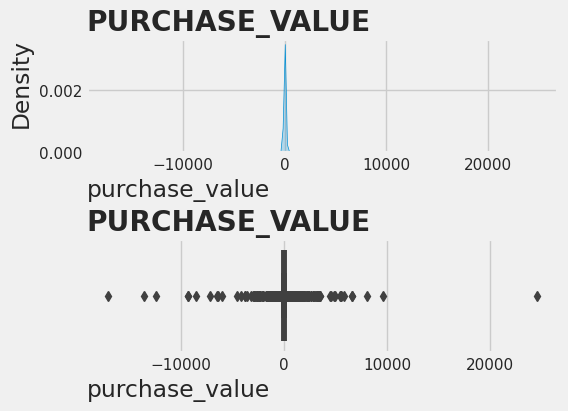

In [62]:
# inspect numerical distribution
numerical_plot(df_producer_purchases[["purchase_value"]], hist=False, figsize=(15, 4))

In [63]:
# get 95 percentile in terms of total purchases from producers
purchase_95_quantile = df_producer_purchases["purchase_value"].quantile(q=0.95)
# create a new column to indicate top producers
df_producer_purchases["top_5_percent_producers"] = df_producer_purchases["purchase_value"] >= purchase_95_quantile

# inspect results
df_producer_purchases.sample(10, random_state=7)

producer_id  purchase_value  top_5_percent_producers
3622      2574338            -5.7                    False
2261      1149717            -7.2                    False
2606      1448256             3.5                    False
2305      1184730            -1.5                    False
2768      1584978            -0.4                    False
7912      7311456            -2.0                    False
3700      2680185            -1.5                    False
1995       965721            -1.5                    False
433        116177           102.9                     True
3640      2602087           -24.0                    False

[10 rows x 3 columns]

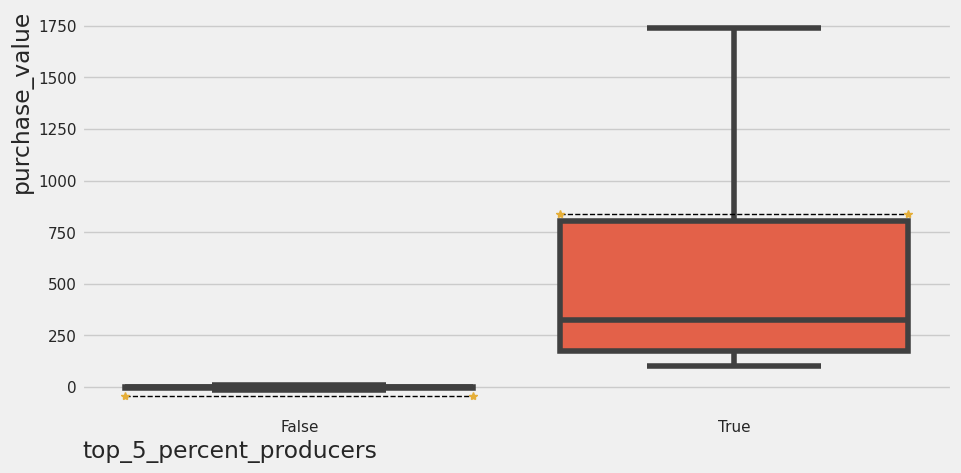

In [64]:
# inspect boxplot
sns.boxplot(
    data=df_producer_purchases, 
    y="purchase_value", x="top_5_percent_producers",
    meanline=True, showmeans=True, 
    meanprops={"color": "black", "marker": "*"},
    showfliers=False
);

In [65]:
# split purchase_value into top percent producers
data_one = df_producer_purchases.loc[df_producer_purchases["top_5_percent_producers"], "purchase_value"]
data_two = df_producer_purchases.loc[~df_producer_purchases["top_5_percent_producers"], "purchase_value"]

# perform Mann-Whitney U Test
# Tests whether the distributions of two independent samples are equal or not.
# Assumptions
#   Observations in each sample are independent and identically distributed (iid).
#   Observations in each sample can be ranked.
# Interpretation
#   H0: the distributions of both samples are equal.
#   H1: the distributions of both samples are not equal.
stat, p_value = mannwhitneyu(
    x=data_one, y=data_two,
    alternative='two-sided', 
    nan_policy='raise'    
    )

# print report
print(
    f"p-value = {p_value:.3f}"
)

p-value = 0.000


In [66]:
data_one.mean(), data_two.mean(), df_producer_purchases["purchase_value"].mean(), df_eda["purchase_value"].mean()

(839.7755384329199,
 -44.2054202045039,
 -0.0008604821436487926,
 -4.313097993100538e-06)

In [67]:
# delete previous section dataframe to save memory
lst = [df_producer_purchases]
del lst
del df_producer_purchases

### **H2.** Are there any **relevant patterns or trends** in the data?
        - Check for features (correlation between features, feature distributions and time-changes trends) that shows patterns in terms of customers/producers groups or revenue impact or scaling impact.


In [68]:
# inspect dataframe
df_eda.head()

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
0      1663958        6640        209372       116238   1200397  \
1      1677087        2350        141418         2821   1083764   
2      2017360       35669        618642       618642   1436106   
3      2017379       57998       1164511        70388   1436118   
4      2017382       58329       1261488       221253   1386357   

        purchase_date product_creation_date product_category   
0 2016-06-26 12:00:00   2011-03-19 15:47:36            Video  \
1 2016-06-26 12:00:00   2010-07-05 01:50:15          Podcast   
2 2016-06-26 12:00:00   2012-06-13 02:59:37          Podcast   
3 2016-06-26 12:00:00   2013-05-07 08:51:31          Podcast   
4 2016-06-26 12:00:00   2013-05-12 08:12:06          Podcast   

         product_niche  purchase_value  affiliate_commission_percentual   
0  Presentation skills            -0.3                             -1.0  \
1     Child psychology            -0.2                             -1.0   
2  Presentation skills            -0.5                             -1.0   
3   Anxiety management            -0.4                             -1.0   
4     Teaching English            -0.5                             -1.0   

  purchase_device  is_origin_page_social_network  product_age_when_purchased   
0        Smart TV                           True                          63  \
1        Smart TV                           True                          71   
2        Smart TV                           True                          48   
3        Smart TV                           True                          37   
4        Smart TV                           True                          37   

  binned_affiliate_commission_percentual binned_product_age_when_purchased   
0                                [-1, 0)                          [60, 70)  \
1                                [-1, 0)                          [70, 80)   
2                                [-1, 0)                          [40, 50)   
3                                [-1, 0)                          [30, 40)   
4                                [-1, 0)                          [30, 40)   

  purchase_date_daily  
0          2016-06-26  
1          2016-06-26  
2          2016-06-26  
3          2016-06-26  
4          2016-06-26  

[5 rows x 17 columns]

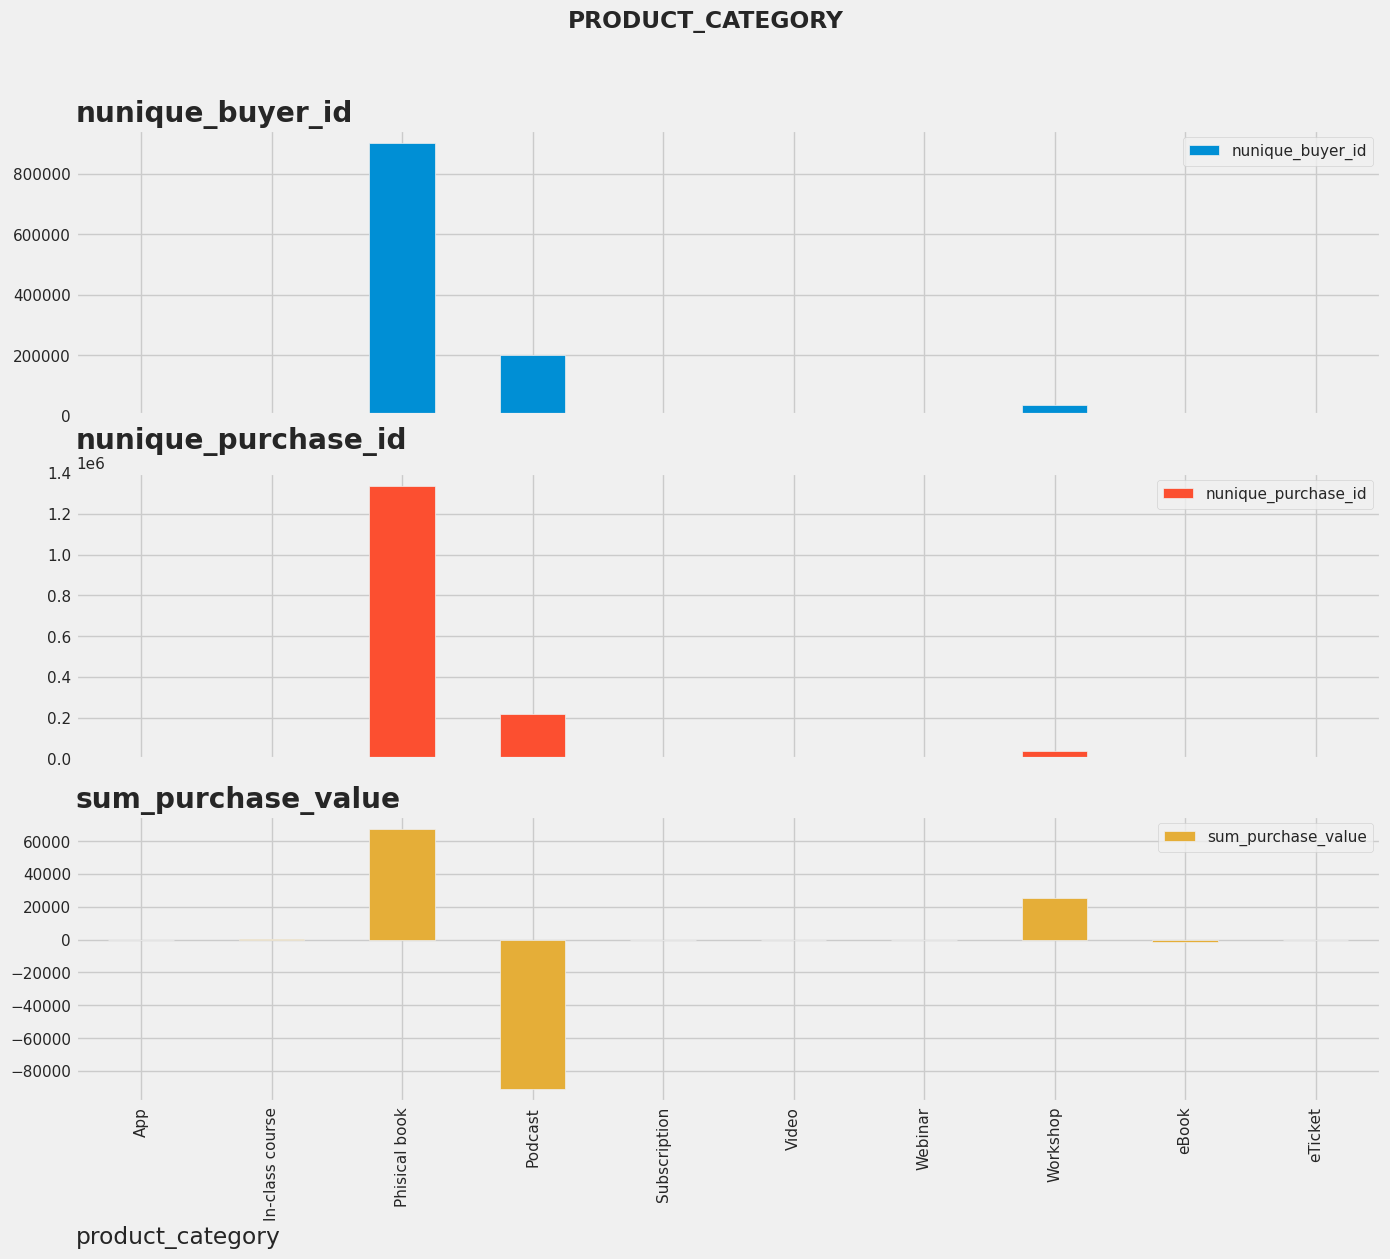

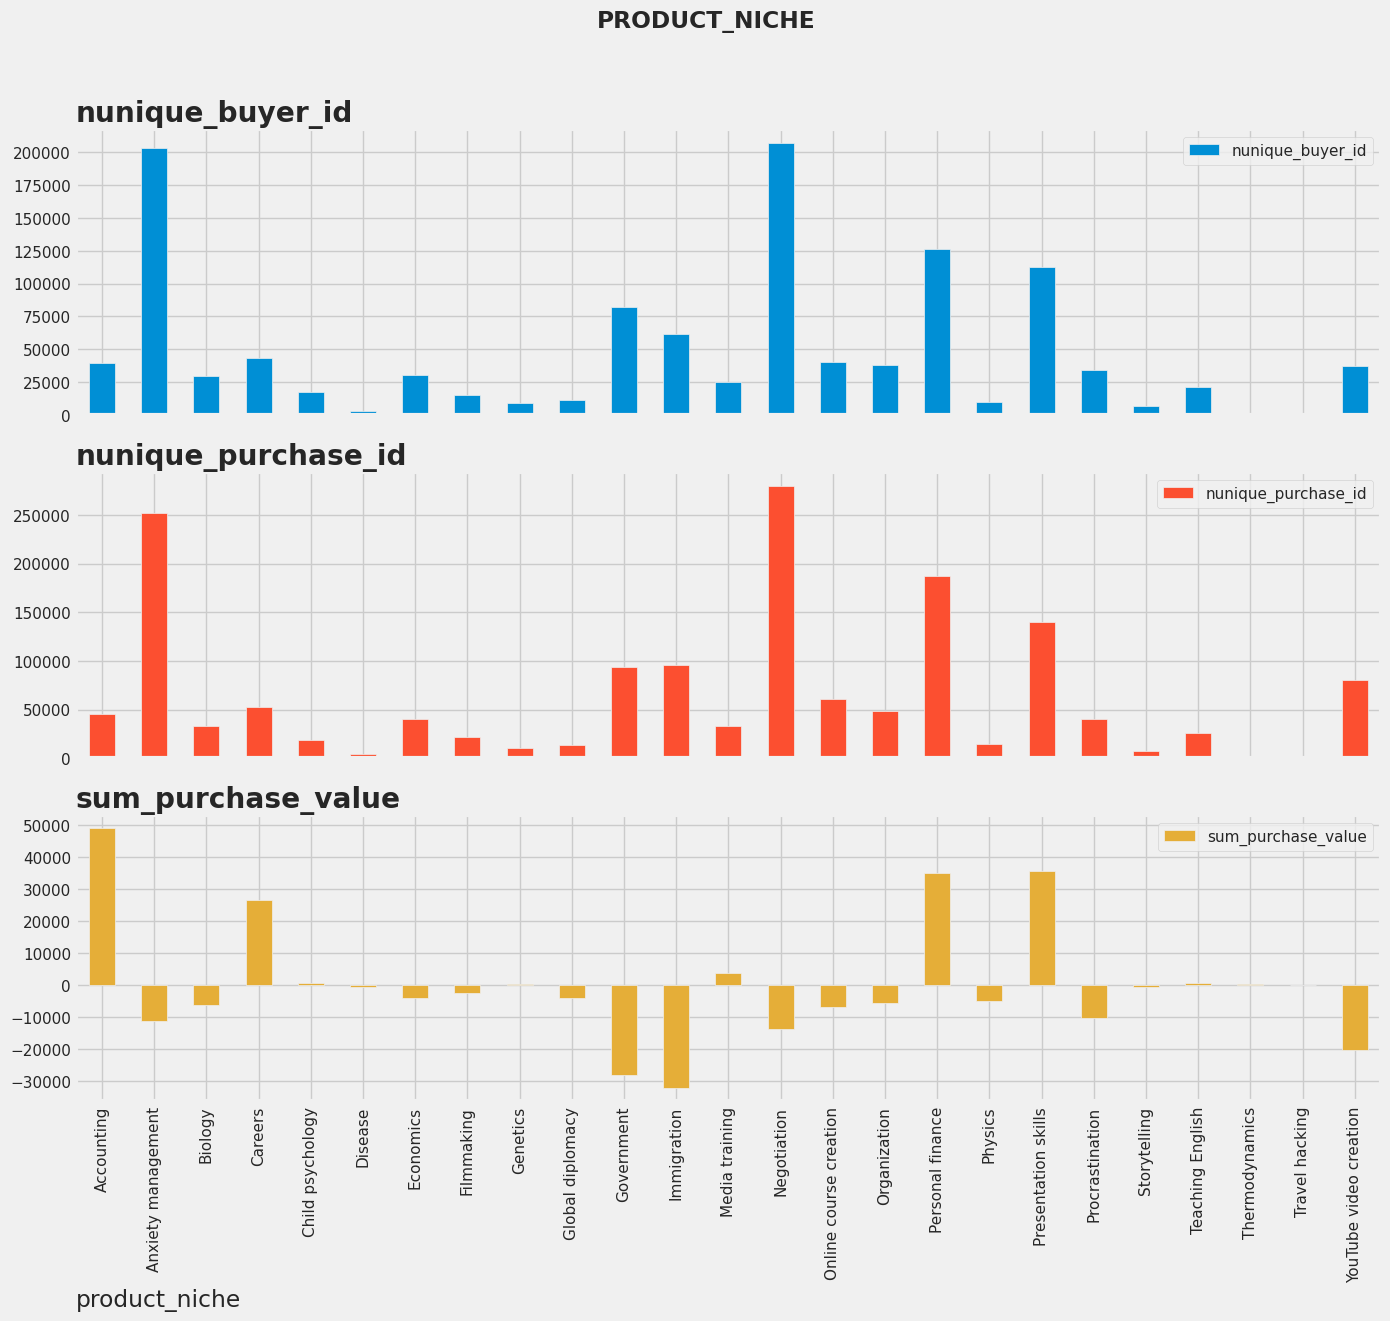

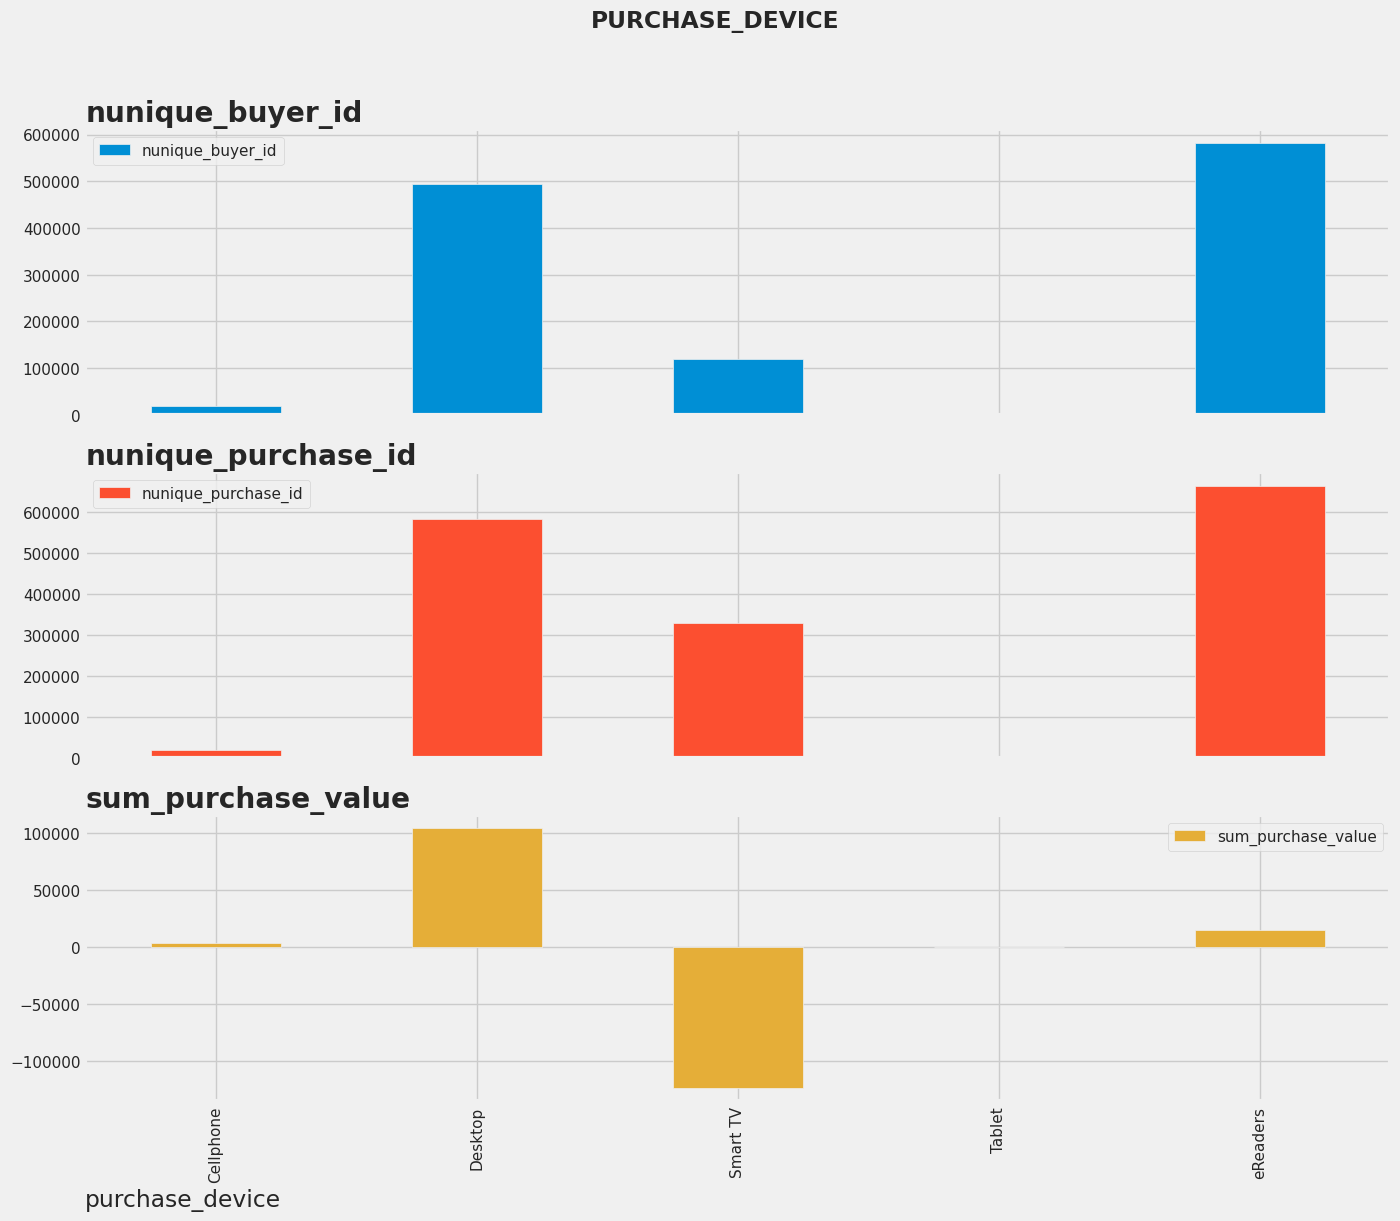

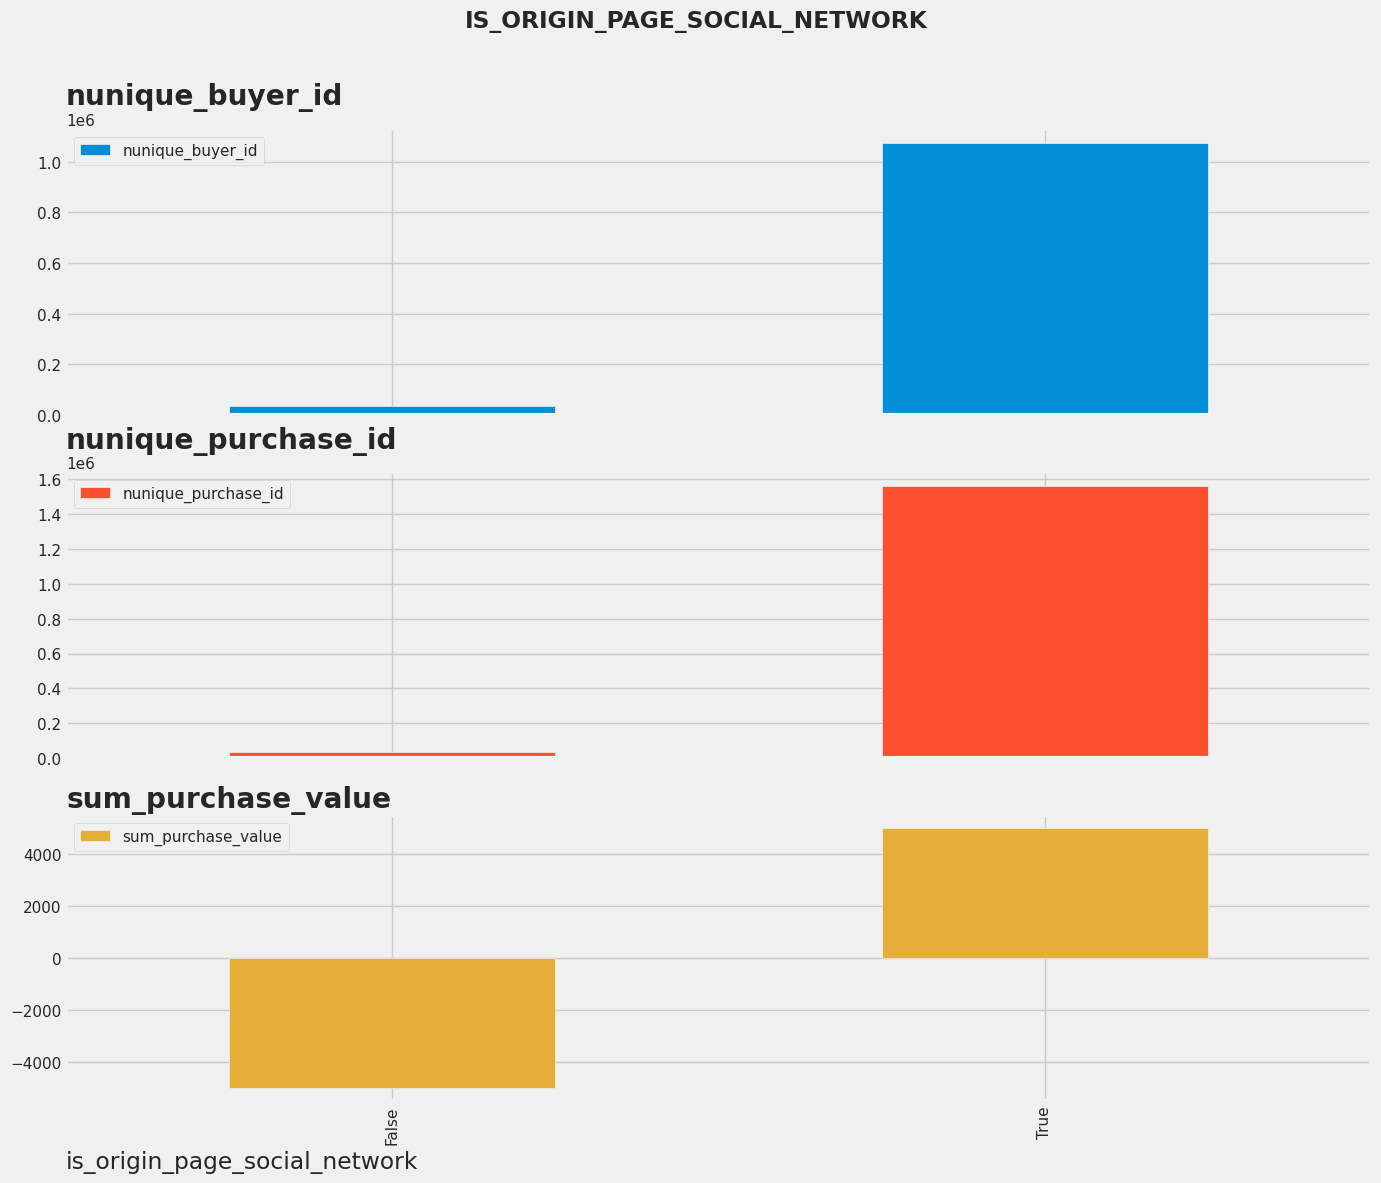

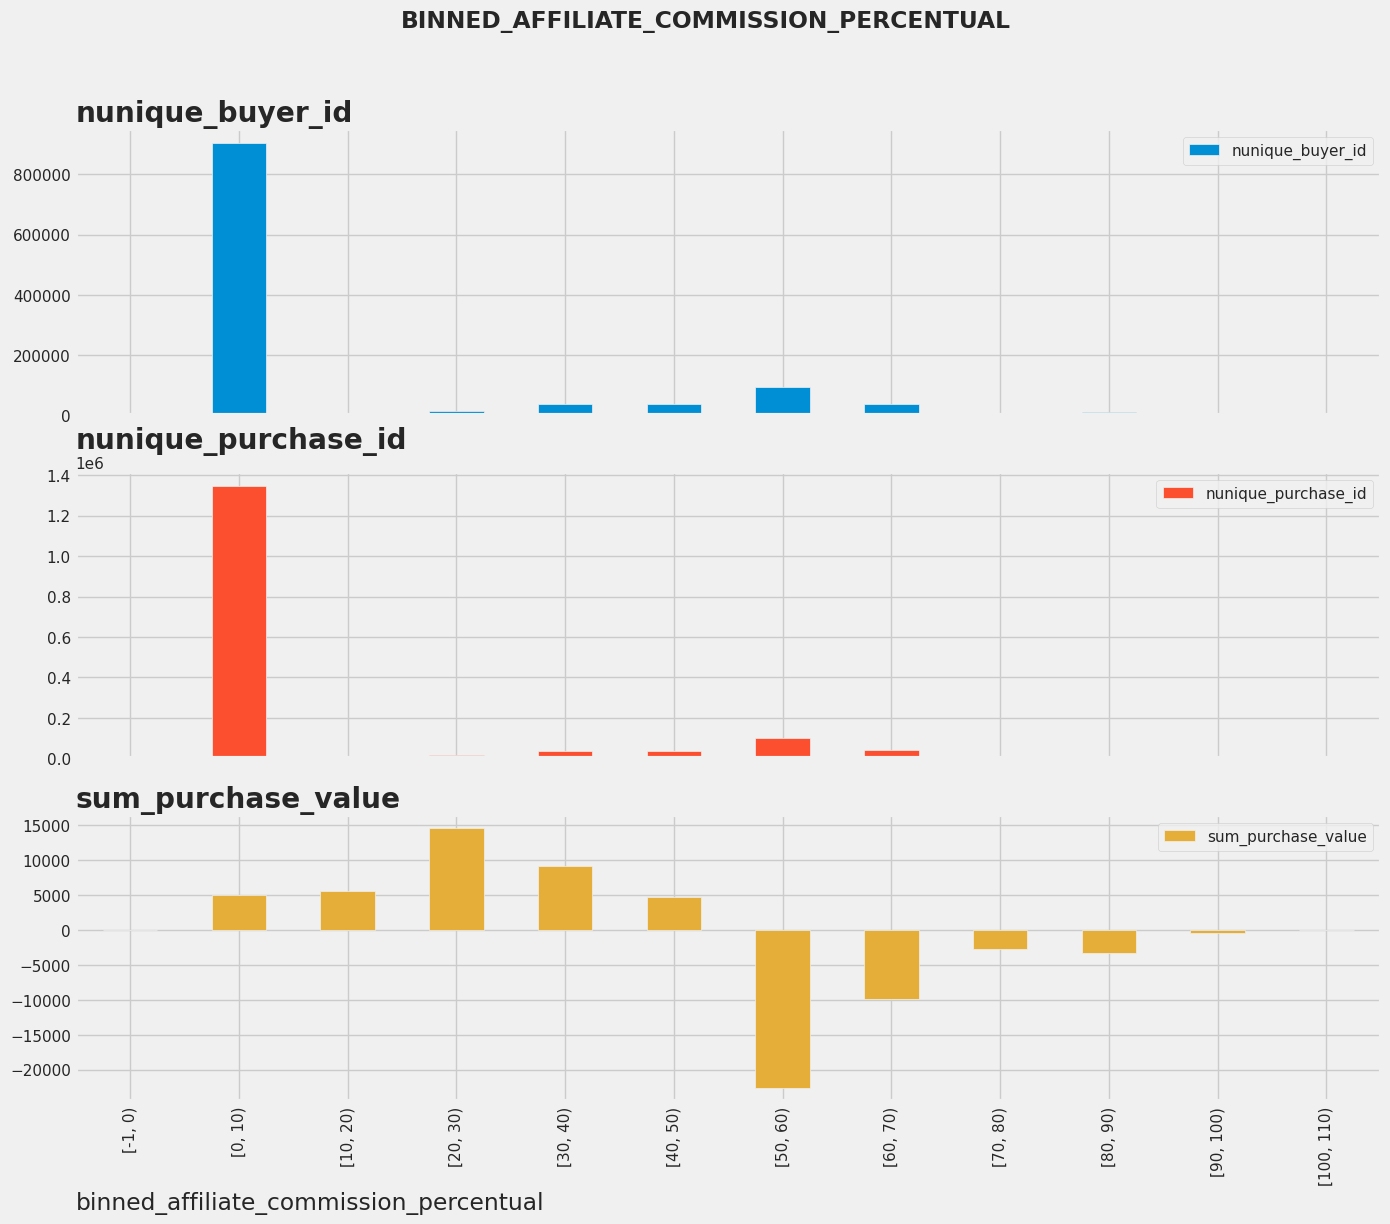

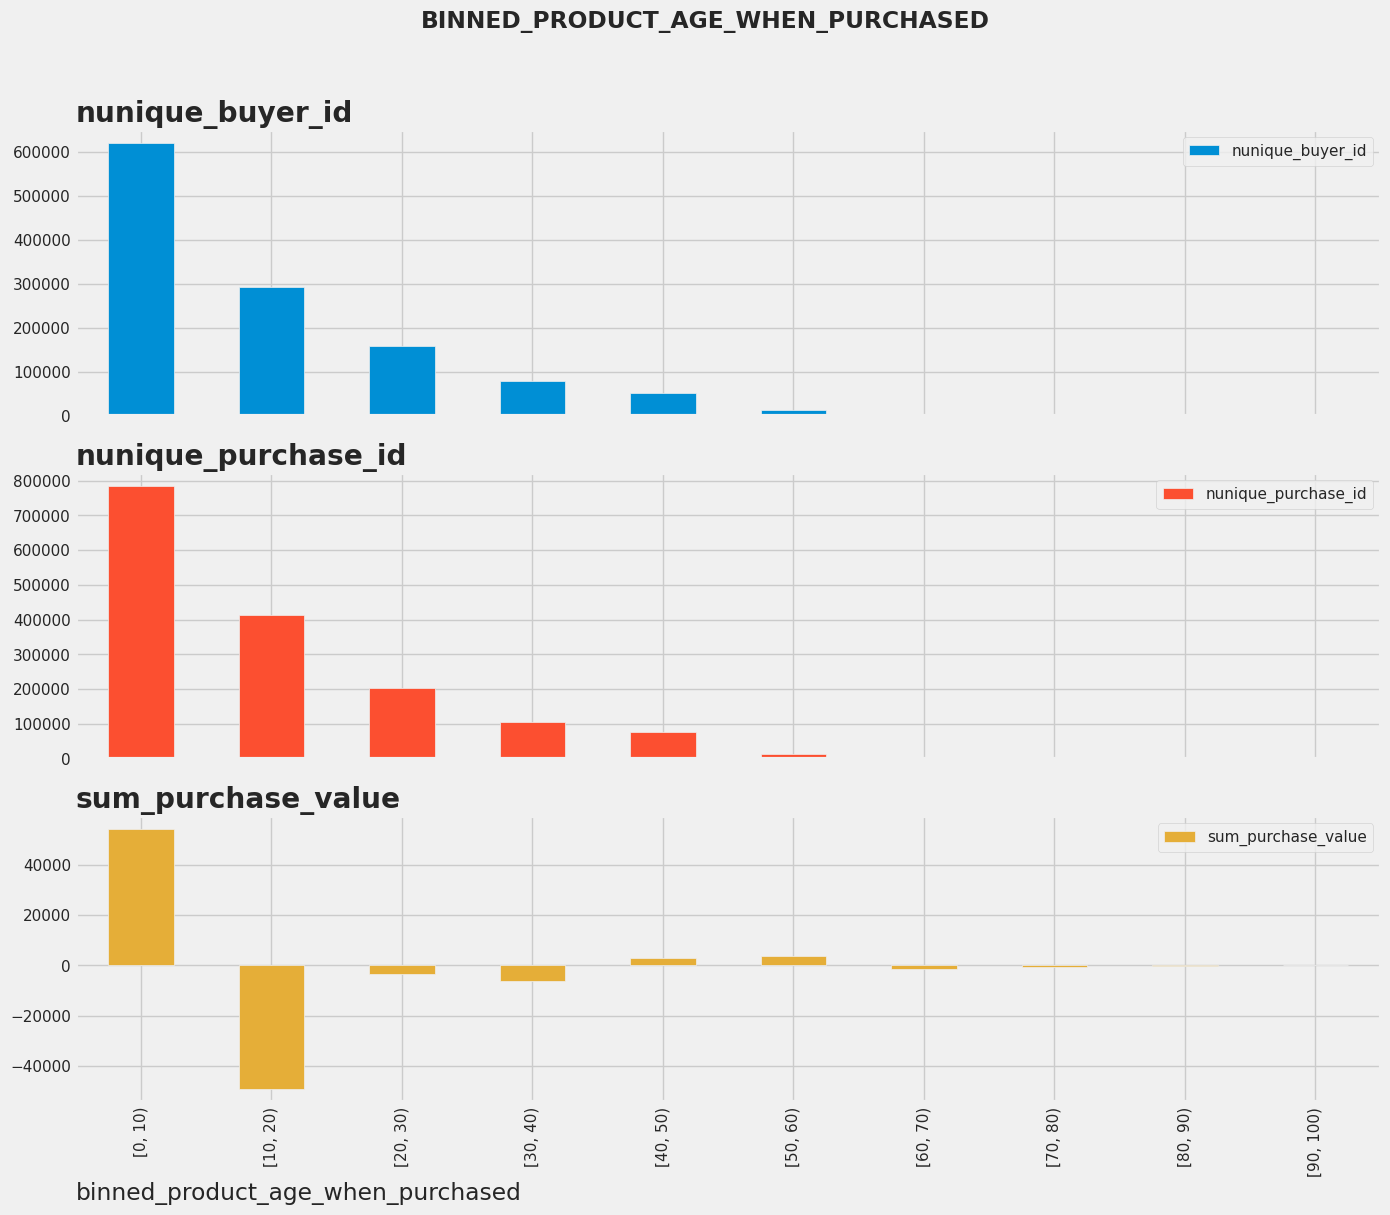

In [69]:
# iterate over columns to plot
for feature in [
    "product_category", "product_niche", "purchase_device", "is_origin_page_social_network",
    "binned_affiliate_commission_percentual", "binned_product_age_when_purchased"
    ]:
    # group data by feature and calculate meaningful aggregations for the analysis
    df_product_category_group = df_eda.groupby(
        by=feature, as_index=False).agg(
        nunique_buyer_id = ("buyer_id", "nunique"),
        nunique_purchase_id = ("purchase_id", "nunique"),
        sum_purchase_value = ("purchase_value", "sum"),
    )

    # plot feature in respect to nunique_buyer_id, nunique_purchase_id and sum_purchase_value
    df_product_category_group.plot.bar(
        x=feature, subplots=True, figsize=(15, 12),
        title=feature.upper(), grid=True
        );


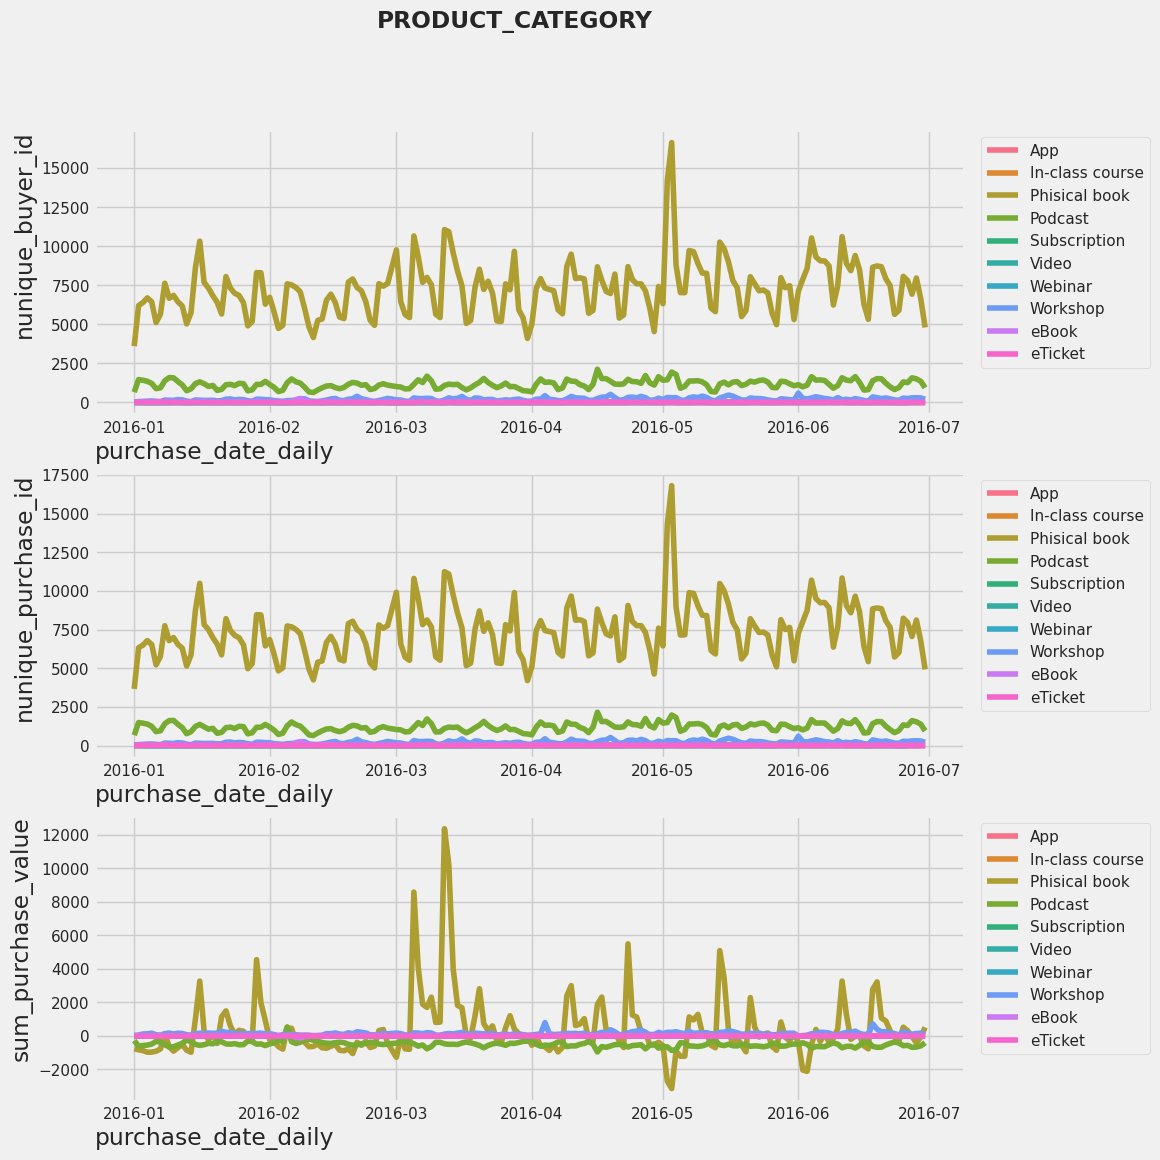

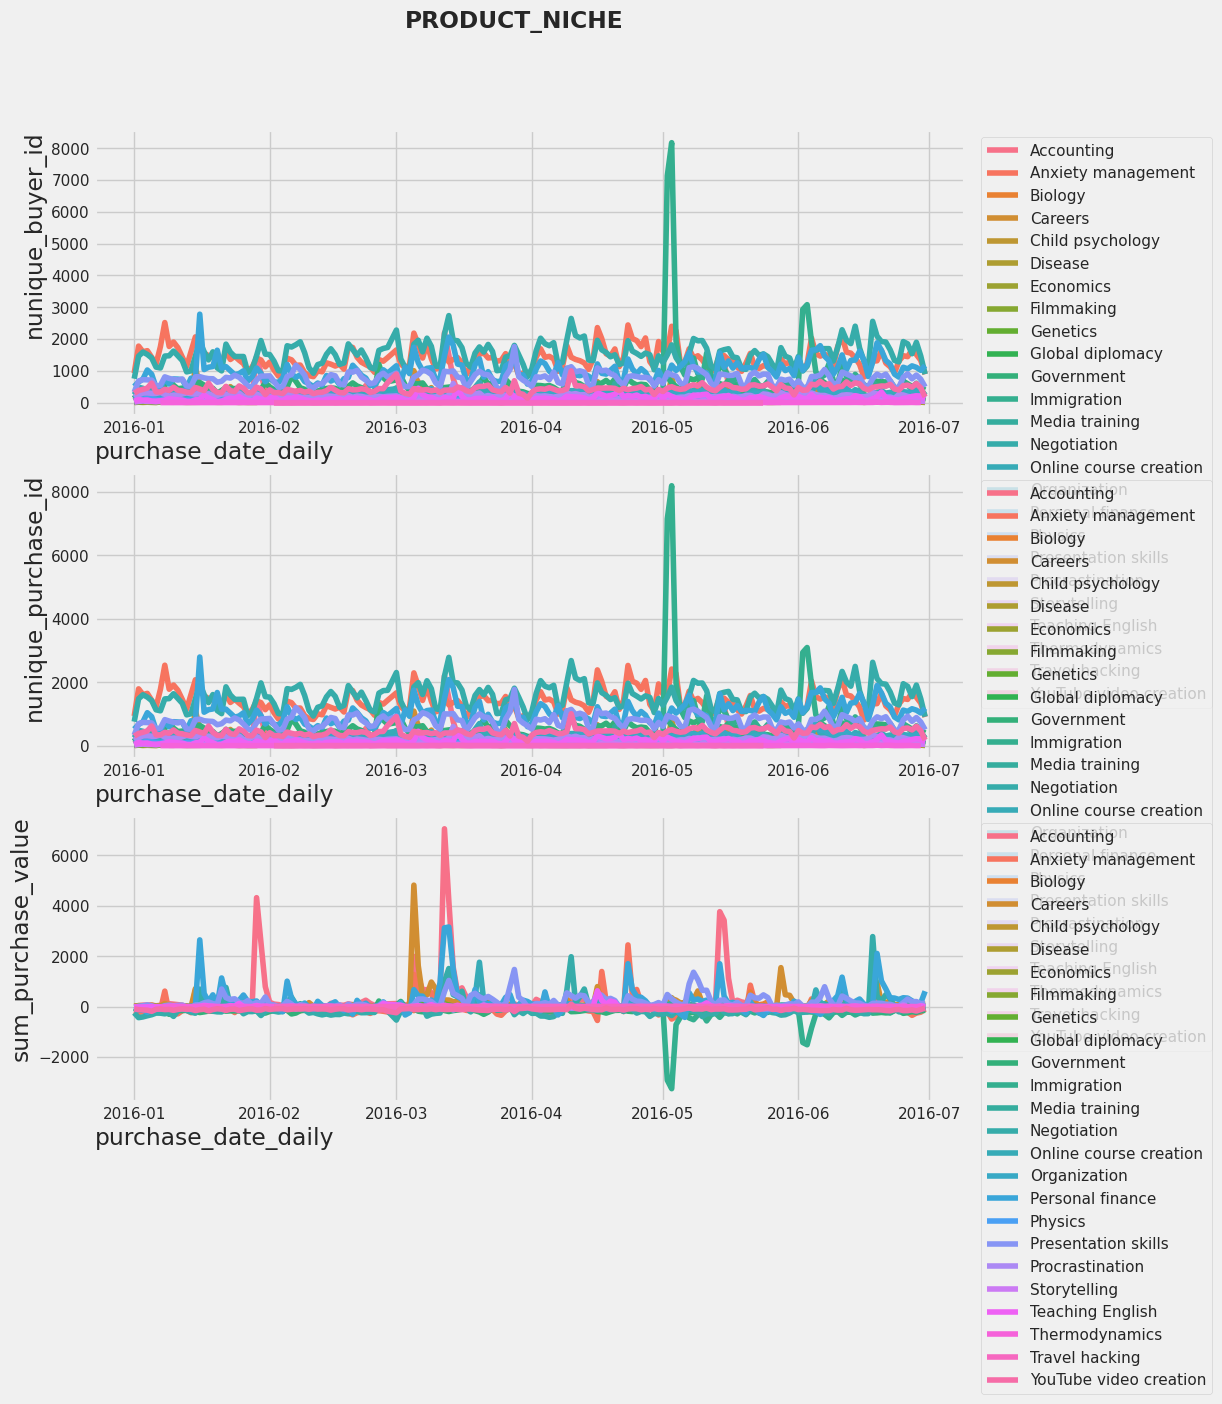

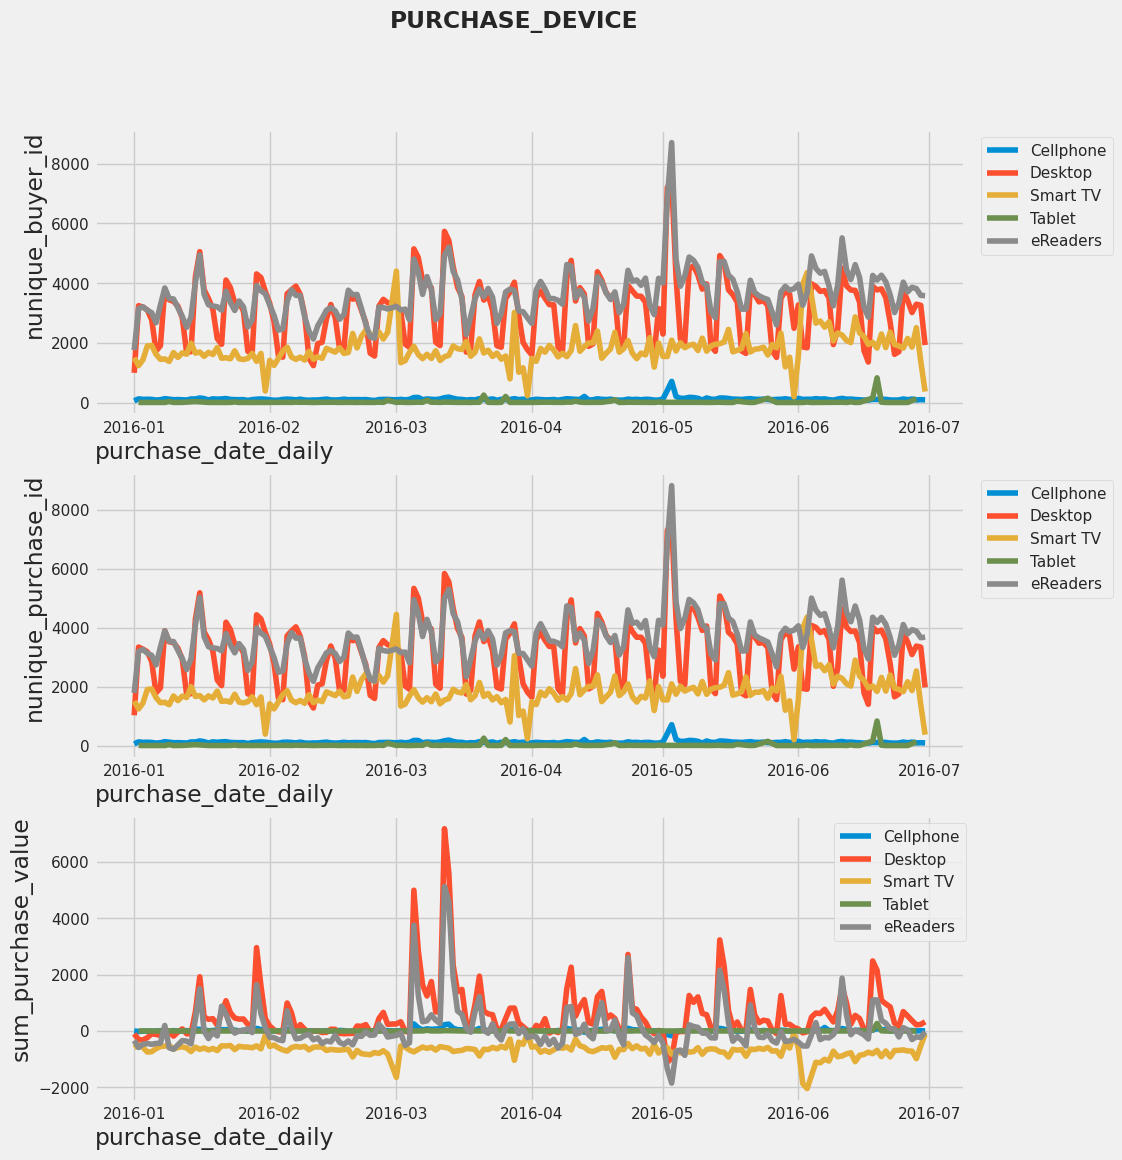

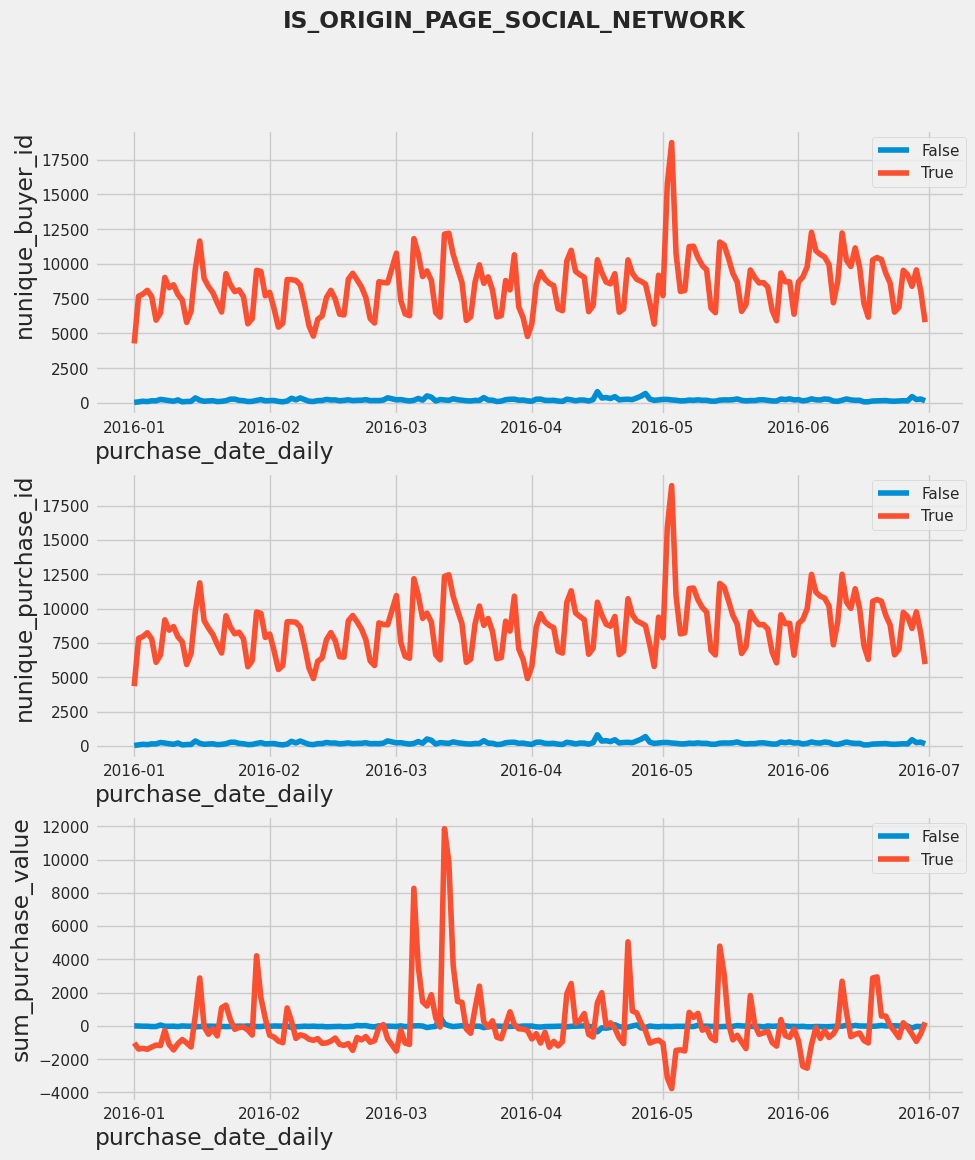

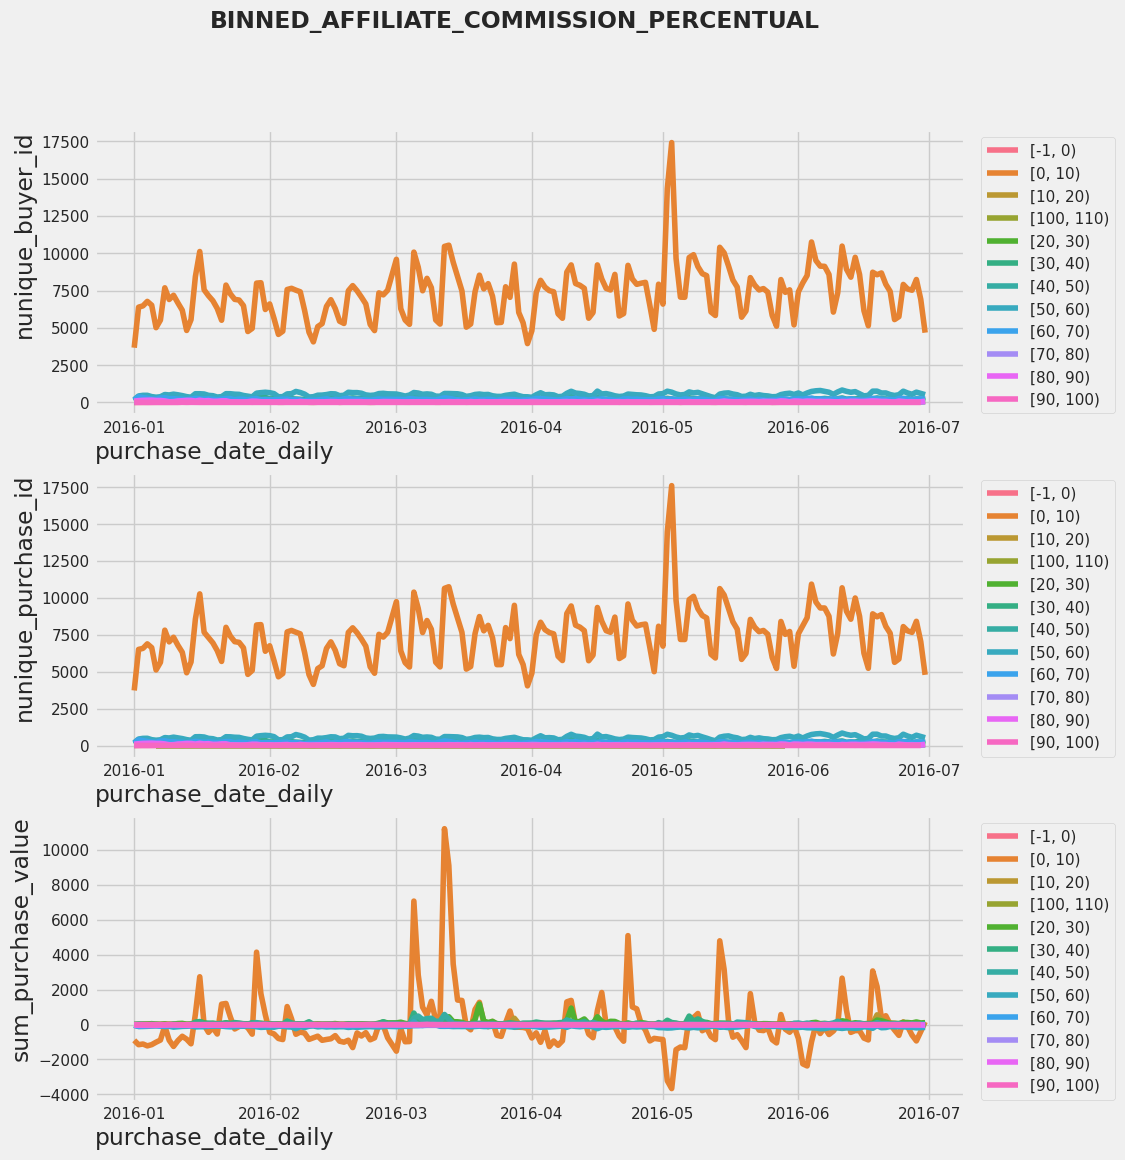

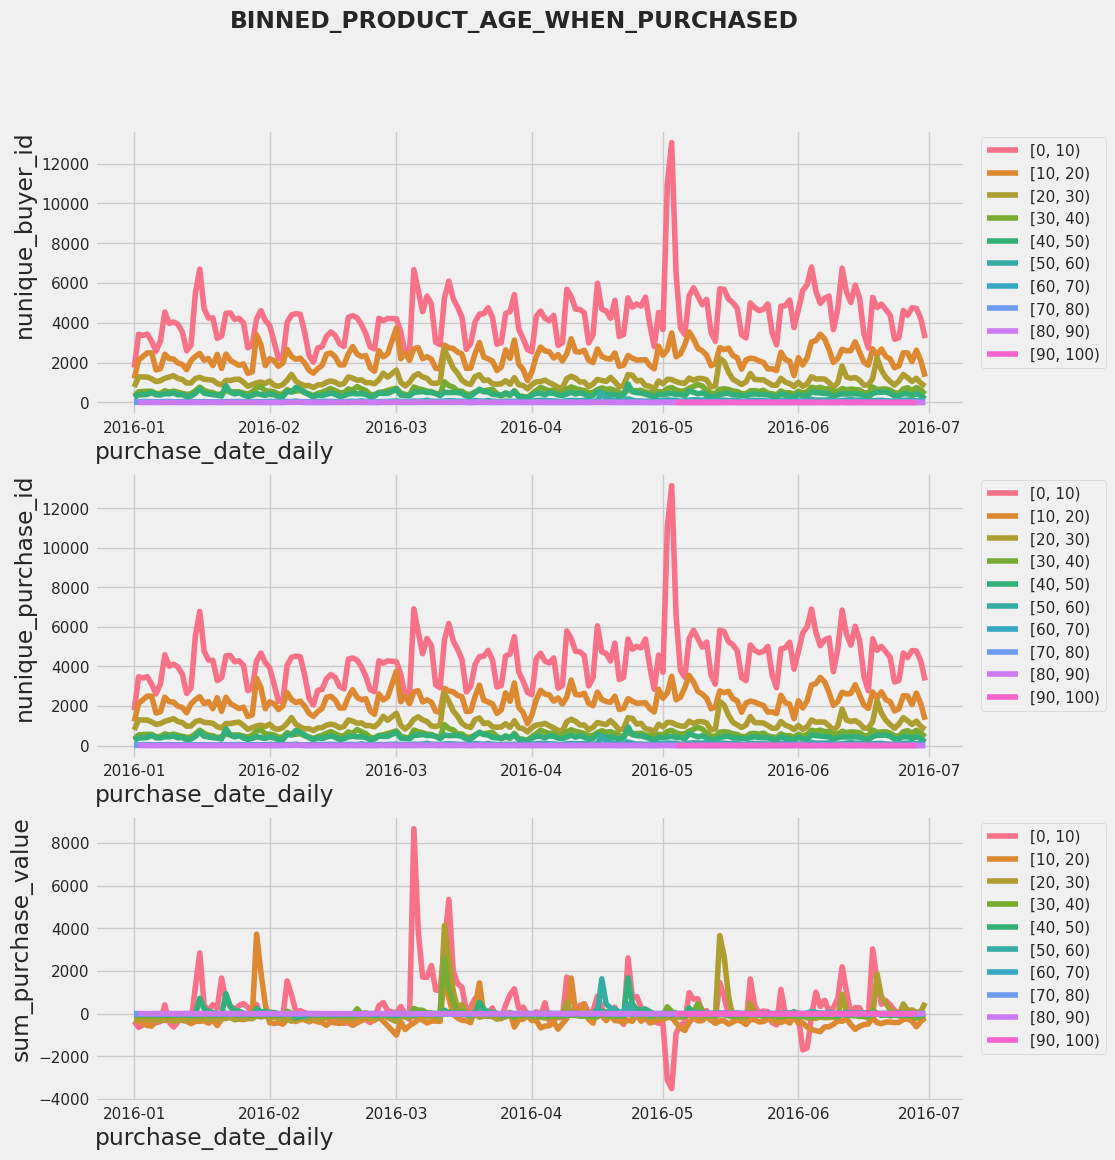

In [70]:
# iterate over columns to plot
for feature in [
    "product_category", "product_niche", "purchase_device", "is_origin_page_social_network",
    "binned_affiliate_commission_percentual", "binned_product_age_when_purchased"
    ]:

    # check if feature is categorical
    if feature in ("binned_affiliate_commission_percentual", "binned_product_age_when_purchased"):
        # convert categorical to string
        dtype_convert = {feature: "str"}
    # feature is not categorical
    else:
        # not need to convert
        dtype_convert = {}

    # define figure layout
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

    # define figure title
    fig.suptitle(feature.upper())

    # group data by feature and calculate meaningful aggregations for the analysis
    df_product_category_group = df_eda.astype(dtype_convert).groupby(
        by=[feature, "purchase_date_daily"], as_index=False).agg(
        nunique_buyer_id = ("buyer_id", "nunique"),
        nunique_purchase_id = ("purchase_id", "nunique"),
        sum_purchase_value = ("purchase_value", "sum"),
    )

    # iterate over target variables for subplots
    for idx, target in enumerate(["nunique_buyer_id", "nunique_purchase_id", "sum_purchase_value"]):
        # plot a line on subplot
        sns.lineplot(
            data=df_product_category_group, 
            x="purchase_date_daily", 
            y=target, 
            hue=feature,
            ax=axs[idx])
        # define legend position
        axs[idx].legend(bbox_to_anchor=(1.01, 1))
    
    # display
    plt.show()

In [71]:
# delete previous section dataframe to save memory
lst = [df_product_category_group]
del lst
del df_product_category_group

### **H3.** It is possible to **segment users** based on their characteristics (revenue, product niche, etc.)?
        - What is the purpose of segmenting customers?
          - Find out what are the best customers and what coould be done to change the behaviour of the not-best ones. 
          - Revenue from best customer could support scaling efforts.
        - Check for features that can cluster customer/producers for better revenue undestanding
          - Initially try RFM (Recency-Frequency-Monetary)


In [72]:
# get latest purchase date
latest_purchase_date = df_eda["purchase_date"].max()
# print report
print(
    f"Latest purchase data on dataframe: {latest_purchase_date}"
)

# group data by customer and aggregate required column to create RFM score
df_rfm = df_eda.groupby(by="buyer_id", as_index=False).agg(
    # ======= Recency ======= #
    # Create Recency feature -> time interval to the last purchase.
    # Once the dataframe is outdated, recency will be calculated 
    # with respect to the most recent date
    latest_customer_purchase = ("purchase_date", "max"),
    # ======= Frequency ======= #
    # create Frequency feature -> how many times the customer made a purchase
    frequency = ("purchase_id", "nunique"),
    # ======= Monetary =======#
    # create Monetary -> total spent by customer
    # 🚨 ! remember that purchase_value is on Z-scale -> positive and/or negative values ! 🚨
    monetary = ("purchase_value", "sum"),
)

# get how many day between customer latest purchase date and data collection
df_rfm["recency"] = (latest_purchase_date - df_rfm["latest_customer_purchase"]).dt.days
# create a constant column with latest_customer_purchase
df_rfm["db_latest_purchase_date"] = latest_purchase_date

# get shape before reshaping
shape_before=df_rfm.shape

# reorder columns
df_rfm = df_rfm[["buyer_id", "db_latest_purchase_date", "latest_customer_purchase",
                 "frequency", "monetary", "recency"]]

# sanity check
assert (df_rfm.shape[0] == shape_before[0]) & (df_rfm.shape[1] == shape_before[1]), "Error when reordering columns!"

# inspect results
df_rfm.sample(10, random_state=7)

Latest purchase data on dataframe: 2016-06-30 23:59:57


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   

        monetary  recency  
235923      -0.7      134  
681031      -0.4      107  
745630      -0.5       89  
327371      -0.8       46  
361280      -0.4      180  
881820       0.5       57  
220309      -0.5       21  
213704      -0.4      137  
733480      -0.5       92  
276468      -0.4       39  

[10 rows x 6 columns]

In [73]:
# define a dict to store RFM transformation
rfm_transform = {}

In [74]:
# get dataframe shape before feature engineering
shape_before = df_rfm.shape


# create R feature -> recency feature in a scale from 1 until 5
# calculate values to cut R into bins into discrete intervals.
recency_qcut = pd.qcut(x=df_rfm["recency"], q=5, labels=False, retbins=True, 
                       precision=3, duplicates='raise')
# assgin R bins
df_rfm['R'] = recency_qcut[0]
# save bins limits
rfm_transform["R"] = {"right": True, "bins": recency_qcut[1]}


# create M feature -> monetary feature in a scale from 1 until 5
# calculate values to cut M into bins into discrete intervals.
monetary_qcut = pd.qcut(x=df_rfm["monetary"], q=5, labels=False, retbins=True, 
                     precision=3, duplicates='raise')
# assgin M bins
df_rfm['M'] = monetary_qcut[0]
# save bins limits
rfm_transform["M"] = {"right": True, "bins": monetary_qcut[1]}


# sanity check
assert (df_rfm.shape[0] == shape_before[0]) & ((df_rfm.shape[1] == shape_before[1] +2)), "Misleading feature engineering processing!"

# inspect results
display(
    rfm_transform, 
    df_rfm.sample(10, random_state=7)
    )

{'R': {'right': True, 'bins': array([  0.,  25.,  57.,  94., 136., 181.])},
 'M': {'right': True,
  'bins': array([-17.76675 ,  -0.492735,  -0.37793 ,  -0.158981,   0.35584 ,
         133.76227 ])}}

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   

        monetary  recency  R  M  
235923      -0.7      134  3  0  
681031      -0.4      107  3  2  
745630      -0.5       89  2  0  
327371      -0.8       46  1  0  
361280      -0.4      180  4  1  
881820       0.5       57  1  4  
220309      -0.5       21  0  1  
213704      -0.4      137  4  1  
733480      -0.5       92  2  0  
276468      -0.4       39  1  1  

[10 rows x 8 columns]

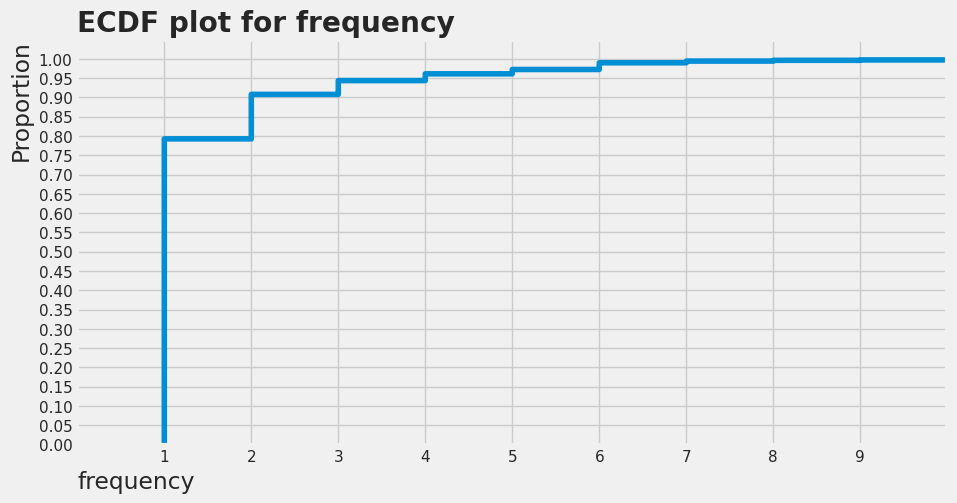

In [75]:
# inspect frequancy
sns.ecdfplot(data=df_rfm, x="frequency", stat="proportion")
# plot details
plt.ylim(0, 1.05)
plt.title("ECDF plot for frequency")
plt.xlim(0, 10)
plt.xticks([*range(1, 10)])
plt.yticks([i/100 for i in range(0, 101, 5)]);

In [76]:
# define quantiles to inspect
q = [0.5, 0.8, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99] # lazy! 
# iterate over quantiles to inspect
for q_ in q:
    # print report
    print(
        f'Frequency quantile {q_:.2f} = {df_rfm["frequency"].quantile(q=q_, interpolation="linear"):.0f}'
    )

Frequency quantile 0.50 = 1
Frequency quantile 0.80 = 2
Frequency quantile 0.90 = 2
Frequency quantile 0.91 = 3
Frequency quantile 0.92 = 3
Frequency quantile 0.93 = 3
Frequency quantile 0.94 = 3
Frequency quantile 0.95 = 4
Frequency quantile 0.96 = 4
Frequency quantile 0.97 = 5
Frequency quantile 0.98 = 6
Frequency quantile 0.99 = 7


In [77]:
# Frequency -> there are many quantiles have same frequency values
# it is a problem if we try to split into this quantiles.
# As frequency distribution is skew -> split using business understanding, not quantiles/percentiles

# mapping frequency values into F customer 'labels'
# F = 1 if: frequency = 1
# F = 2 if:  1 < frequency <= 2
# F = 3 if:  2 < frequency <= 4
# F = 4 if:  4 < frequency <= 7 
# F = 5 if:  frequency > 7
# create bins of the mapping
m_bins = [ 0, 1, 2, 4, 7, 100 ]
# create labels of the mapping
m_labels = (0, 1, 2, 3, 4)
# calculate values to cut F into bins into discrete intervals.
frequency_cut = pd.cut( 
    x=df_rfm['frequency'], 
    bins=m_bins, labels=m_labels,
    right=True, retbins=True, include_lowest=False, ordered=True
    )
# map frequency feature into F feature
df_rfm['F'] = frequency_cut[0].tolist()
# save bins limits
rfm_transform['F'] = {"right": True, "include_lowest": False, "bins": frequency_cut[1]}

# sanity check
assert len(df_rfm["F"].unique()) == 5, "Missing F label on preprocessing"

# inspect results
display(
    rfm_transform, 
    df_rfm.sample(20, random_state=7)
)

{'R': {'right': True, 'bins': array([  0.,  25.,  57.,  94., 136., 181.])},
 'M': {'right': True,
  'bins': array([-17.76675 ,  -0.492735,  -0.37793 ,  -0.158981,   0.35584 ,
         133.76227 ])},
 'F': {'right': True,
  'include_lowest': False,
  'bins': array([  0,   1,   2,   4,   7, 100])}}

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   
481830   6082392     2016-06-30 23:59:57      2016-01-23 14:32:32          1   
995014   7455058     2016-06-30 23:59:57      2016-06-02 15:05:16          1   
913364   7277945     2016-06-30 23:59:57      2016-05-11 07:19:22          1   
663731   6757282     2016-06-30 23:59:57      2016-03-12 11:59:45          1   
377908   5766721     2016-06-30 23:59:57      2016-03-06 23:17:43          1   
23960     435425     2016-06-30 23:59:57      2016-02-14 13:31:55          1   
542430   6486506     2016-06-30 23:59:57      2016-02-06 23:23:27          1   
898025   7247267     2016-06-30 23:59:57      2016-05-08 00:20:17          1   
528883   6436364     2016-06-30 23:59:57      2016-02-03 00:51:52          1   
520761   6324136     2016-06-30 23:59:57      2016-02-15 21:21:41          1   

        monetary  recency  R  M  F  
235923      -0.7      134  3  0  1  
681031      -0.4      107  3  2  0  
745630      -0.5       89  2  0  0  
327371      -0.8       46  1  0  2  
361280      -0.4      180  4  1  0  
881820       0.5       57  1  4  0  
220309      -0.5       21  0  1  0  
213704      -0.4      137  4  1  0  
733480      -0.5       92  2  0  0  
276468      -0.4       39  1  1  1  
481830       0.4      159  4  4  0  
995014      -0.5       28  1  1  0  
913364      -0.1       50  1  3  0  
663731       3.4      110  3  4  0  
377908      -0.1      116  3  3  0  
23960       -0.4      137  4  2  0  
542430      -0.5      145  4  0  0  
898025       0.4       53  1  4  0  
528883      -0.2      148  4  2  0  
520761       0.1      136  3  3  0  

[20 rows x 9 columns]

In [78]:
# add 1 to R, M and F -> easier to interpret
df_rfm[["R", "M", "F"]] = df_rfm[["R", "M", "F"]] + 1

# calculate mean RFM for each customer
df_rfm['avg_RFM'] = df_rfm[['R', 'F', 'M']].mean(axis = 1)

# inspect results
check_dataframe(df_rfm, summary_stats=True, size=10)

*************************************************
Dataframe size in memory: 88.052 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1100649, 10) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(10)


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
116637   1992424     2016-06-30 23:59:57      2016-06-11 00:18:15          1  \
119354   2037147     2016-06-30 23:59:57      2016-05-10 20:07:11          1   
725649   6887308     2016-06-30 23:59:57      2016-03-27 16:13:49          1   
164872   2822026     2016-06-30 23:59:57      2016-04-28 22:31:00          1   
917062   7284534     2016-06-30 23:59:57      2016-05-12 00:17:50          1   
759557   6964762     2016-06-30 23:59:57      2016-05-06 15:56:04          2   
169731   2909756     2016-06-30 23:59:57      2016-06-16 15:56:24          1   
438146   5997470     2016-06-30 23:59:57      2016-01-12 16:56:58          1   
23023     418159     2016-06-30 23:59:57      2016-05-27 16:59:59          1   
133099   2275748     2016-06-30 23:59:57      2016-03-21 23:09:51          2   

        monetary  recency  R  M  F  avg_RFM  
116637      -0.3       19  1  3  1      1.7  
119354      -0.5       51  2  2  1      1.7  
725649      -0.5       95  4  2  1      2.3  
164872       0.4       63  3  5  1      3.0  
917062      -0.4       49  2  2  1      1.7  
759557      -1.0       55  2  1  2      1.7  
169731      -0.2       14  1  3  1      1.7  
438146      -0.5      170  5  1  1      2.3  
23023        0.2       34  2  4  1      2.3  
133099      -0.3      101  4  3  2      3.0  

[10 rows x 10 columns]

*************************************************


In [79]:
# add some noise to RFM so as to better visualize it
for col in ["R", "M", "F"]:
    # create a new column with a normal noise
    df_rfm[f"{col}_noisy"] = df_rfm[col] + np.random.normal(loc=0, scale=0.3, size=len(df_rfm))

# inspect results
df_rfm.sample(10, random_state=7)    

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
235923   3986598     2016-06-30 23:59:57      2016-02-17 14:51:40          2  \
681031   6790559     2016-06-30 23:59:57      2016-03-15 06:32:01          1   
745630   6932504     2016-06-30 23:59:57      2016-04-02 19:40:42          1   
327371   5217195     2016-06-30 23:59:57      2016-05-15 21:35:12          3   
361280   5603505     2016-06-30 23:59:57      2016-01-02 11:22:50          1   
881820   7215990     2016-06-30 23:59:57      2016-05-04 12:55:32          1   
220309   3768236     2016-06-30 23:59:57      2016-06-09 01:05:18          1   
213704   3654303     2016-06-30 23:59:57      2016-02-14 16:20:34          1   
733480   6904431     2016-06-30 23:59:57      2016-03-30 23:52:43          1   
276468   4553161     2016-06-30 23:59:57      2016-05-22 17:14:09          2   

        monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy  
235923      -0.7      134  4  1  2      2.3      3.9      0.9      1.9  
681031      -0.4      107  4  3  1      2.7      3.6      3.3      0.4  
745630      -0.5       89  3  1  1      1.7      3.4      1.3      0.7  
327371      -0.8       46  2  1  3      2.0      1.6      1.0      3.0  
361280      -0.4      180  5  2  1      2.7      5.2      1.8      1.5  
881820       0.5       57  2  5  1      2.7      2.1      4.7      0.5  
220309      -0.5       21  1  2  1      1.3      1.1      2.2      1.0  
213704      -0.4      137  5  2  1      2.7      5.2      1.9      1.2  
733480      -0.5       92  3  1  1      1.7      2.5      0.8      0.8  
276468      -0.4       39  2  2  2      2.0      2.3      1.7      2.1  

[10 rows x 13 columns]

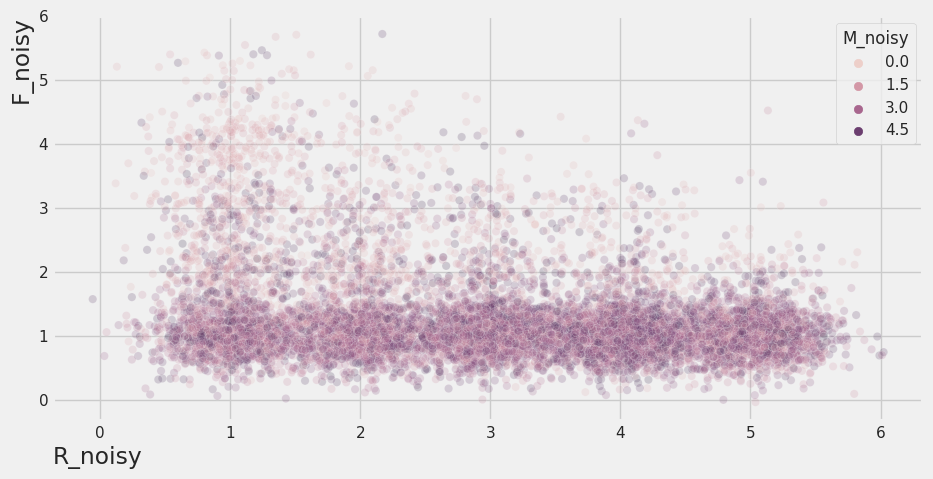

In [80]:
# visualy inspect clusters
sns.scatterplot(data=df_rfm.sample(10_000), 
                x="R_noisy", y="F_noisy", 
                hue="M_noisy", hue_order=[0, 1, 2, 3, 4],
                alpha=0.2);

In [81]:
# inspect dataframe
check_dataframe(df_rfm, summary_stats=True, size=1)

*************************************************
Dataframe size in memory: 114.468 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1100649, 13) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(1)


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
948460   7349242     2016-06-30 23:59:57      2016-05-19 22:16:24          1  \

        monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy  
948460       0.1       42  2  4  1      2.3      2.6      4.2      0.9  

[1 rows x 13 columns]

*************************************************


In [82]:
# create bins of the mapping
m_bins = [ 1, 2, 3, 4, 5 ]
# create labels of the mapping
m_labels = (1, 2, 3, 4)

# calculate values to cut RFM into bins into discrete intervals.
rfm_cut = pd.cut( 
    x=df_rfm['avg_RFM'], 
    bins=m_bins, labels=m_labels,
    right=True, retbins=True, include_lowest=True, ordered=True
    )
# map frequency feature into F feature
df_rfm['cluster'] = rfm_cut[0].tolist()
# save bins limits
rfm_transform['RFM'] = {"right": True, "include_lowest": False, "bins": rfm_cut[1]}

# inspect dataframe
df_rfm.sample(20, random_state=49)

buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
276228    4549511     2016-06-30 23:59:57      2016-05-06 21:24:28          1  \
1083062   7659702     2016-06-30 23:59:57      2016-06-25 21:24:13          1   
650039    6728206     2016-06-30 23:59:57      2016-03-08 16:54:28          1   
304462    4921710     2016-06-30 23:59:57      2016-01-28 17:14:39          1   
870542    7197272     2016-06-30 23:59:57      2016-06-03 16:40:35          2   
872524    7199682     2016-06-30 23:59:57      2016-05-03 01:41:24          1   
542552    6486727     2016-06-30 23:59:57      2016-02-06 23:42:23          1   
512645    6178422     2016-06-30 23:59:57      2016-01-31 02:46:49          1   
750816    6944969     2016-06-30 23:59:57      2016-04-03 22:43:11          1   
20915      380773     2016-06-30 23:59:57      2016-06-11 01:33:21          1   
804801    7061571     2016-06-30 23:59:57      2016-04-17 13:23:23          1   
71250     1206237     2016-06-30 23:59:57      2016-01-04 11:45:50          1   
914972    7280750     2016-06-30 23:59:57      2016-05-11 16:02:43          1   
902565    7256095     2016-06-30 23:59:57      2016-05-08 21:33:59          1   
793910    7038109     2016-06-30 23:59:57      2016-04-14 17:08:17          1   
650251    6728619     2016-06-30 23:59:57      2016-03-08 17:37:05          1   
297166    4824323     2016-06-30 23:59:57      2016-04-18 13:10:53          4   
114361    1953006     2016-06-30 23:59:57      2016-03-01 02:05:49          2   
970803    7399065     2016-06-30 23:59:57      2016-05-26 09:48:57          1   
237628    4010778     2016-06-30 23:59:57      2016-06-10 04:01:06          2   

         monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy   
276228       -0.4       55  2  3  1      2.0      1.6      2.4      0.8  \
1083062      -0.4        5  1  2  1      1.3      1.0      1.9      1.1   
650039       -0.5      114  4  2  1      2.3      3.9      2.2      1.1   
304462        0.5      154  5  5  1      3.7      4.9      5.0      0.8   
870542       -1.0       27  2  1  2      1.7      2.0      1.3      1.3   
872524       -0.4       58  3  3  1      2.3      3.0      2.8      0.7   
542552        0.6      145  5  5  1      3.7      5.2      4.9      1.3   
512645       -0.4      151  5  2  1      2.7      4.7      1.8      1.0   
750816       -0.1       88  3  4  1      2.7      3.3      3.7      1.4   
20915         0.3       19  1  4  1      2.0      1.0      4.2      1.4   
804801       -0.5       74  3  2  1      2.0      2.8      2.0      0.6   
71250         0.0      178  5  4  1      3.3      5.1      4.3      1.1   
914972        1.6       50  2  5  1      2.7      1.8      4.6      0.9   
902565       -0.3       53  2  3  1      2.0      2.3      2.5      0.8   
793910       -0.5       77  3  1  1      1.7      2.9      1.2      0.8   
650251        0.4      114  4  5  1      3.3      4.4      5.2      1.1   
297166       -2.0       73  3  1  3      2.3      3.6      0.8      3.3   
114361        0.1      121  4  4  2      3.3      4.0      3.7      1.4   
970803       -0.3       35  2  3  1      2.0      2.8      3.1      1.0   
237628        4.4       20  1  5  2      2.7      0.6      5.1      2.2   

         cluster  
276228         1  
1083062        1  
650039         2  
304462         3  
870542         1  
872524         2  
542552         3  
512645         2  
750816         2  
20915          1  
804801         1  
71250          3  
914972         2  
902565         1  
793910         1  
650251         3  
297166         2  
114361         3  
970803         1  
237628         2  

[20 rows x 14 columns]

In [83]:
# inspect dataframe
check_dataframe(df_rfm, summary_stats=True, size=1)

*************************************************
Dataframe size in memory: 123.273 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1100649, 14) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(1)


buyer_id db_latest_purchase_date latest_customer_purchase  frequency   
68485   1163031     2016-06-30 23:59:57      2016-05-23 17:50:33          1  \

       monetary  recency  R  M  F  avg_RFM  R_noisy  M_noisy  F_noisy  cluster  
68485       0.2       38  2  4  1      2.3      1.9      4.2      0.9        2  

[1 rows x 14 columns]

*************************************************


In [84]:
# get cluster description
df_cluster = df_rfm.groupby(by="cluster", as_index=False).agg(
    cluster_avg_recency = ("recency", "mean"),
    cluster_avg_frequency = ("frequency", "mean"),
    cluster_avg_monetary = ("monetary", "mean"),
    cluster_size = ("buyer_id", "nunique")
)

# get RFM for clusters mean
df_cluster["clusters_r"] = np.digitize(x=df_cluster["cluster_avg_recency"], bins=rfm_transform["R"]["bins"], right=True)
df_cluster["clusters_f"] = np.digitize(x=df_cluster["cluster_avg_frequency"], bins=rfm_transform["F"]["bins"], right=True)
df_cluster["clusters_m"] = np.digitize(x=df_cluster["cluster_avg_monetary"], bins=rfm_transform["M"]["bins"], right=True)

# inspect results
df_cluster

cluster  cluster_avg_recency  cluster_avg_frequency  cluster_avg_monetary   
0        1                 37.9                    1.6                  -0.6  \
1        2                 94.2                    1.4                   0.1   
2        3                131.5                    1.4                   1.2   
3        4                133.5                    4.3                   3.1   

   cluster_size  clusters_r  clusters_f  clusters_m  
0        385803           2           2           1  
1        548675           4           2           4  
2        165737           4           2           5  
3           434           4           4           5  

[4 rows x 8 columns]

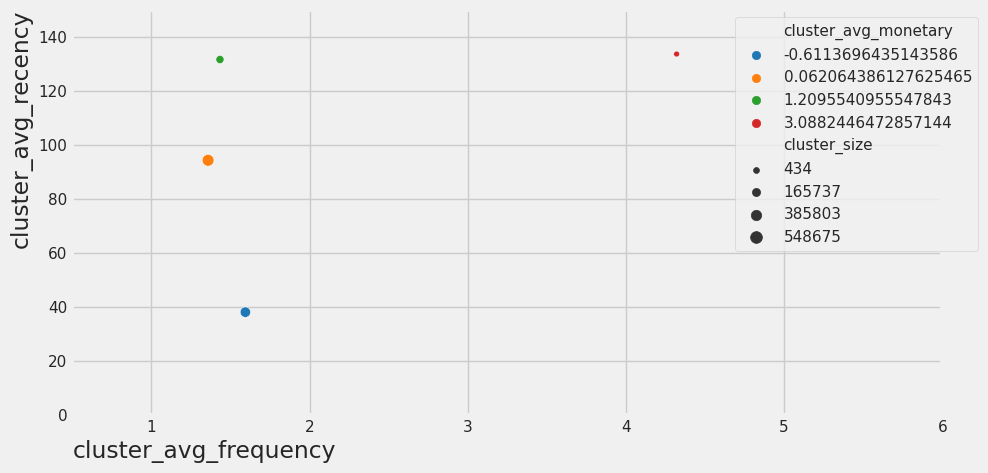

In [85]:
# plot average RFM for each cluster
sns.scatterplot(data = df_cluster, x = 'cluster_avg_frequency', y = 'cluster_avg_recency', 
                size = 'cluster_size', hue = 'cluster_avg_monetary',
                palette="tab10"
                )
# plot details
plt.legend(bbox_to_anchor=(1.05, 1))
plt.ylim(0, 150)
plt.xlim(0.5, 6);

In [86]:
# get info from cluster percent size
df_cluster['cluster_size_percent'] = ( df_cluster['cluster_size'] / df_cluster['cluster_size'].sum() ) * 100

# give friendly name to clusters
df_cluster['cluster'] = df_cluster['cluster'].map({
    1: 'Winter', 
    2: 'Autumn', 
    3: 'Spring', 
    4: 'Summer'
} )

# inspect results
df_cluster

cluster  cluster_avg_recency  cluster_avg_frequency  cluster_avg_monetary   
0  Winter                 37.9                    1.6                  -0.6  \
1  Autumn                 94.2                    1.4                   0.1   
2  Spring                131.5                    1.4                   1.2   
3  Summer                133.5                    4.3                   3.1   

   cluster_size  clusters_r  clusters_f  clusters_m  cluster_size_percent  
0        385803           2           2           1                  35.1  
1        548675           4           2           4                  49.9  
2        165737           4           2           5                  15.1  
3           434           4           4           5                   0.0  

[4 rows x 9 columns]

In [87]:
# save as csv
df_cluster.to_csv(
    os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "df_cluster.csv"),
    header=True, index=False, mode="w"
    )

In [88]:
# iterate over clusters
for cluster in ["Summer", "Spring", "Autumn", "Winter"]:
    # get info for report
    num_customers = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_size"].tolist()[0]
    num_customers_percent = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_size_percent"].tolist()[0]
    avg_recency = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_avg_recency"].tolist()[0]
    avg_frequency = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_avg_frequency"].tolist()[0]
    avg_monetary = df_cluster.loc[df_cluster["cluster"]==cluster, "cluster_avg_monetary"].tolist()[0]

    # print report
    # print final report
    print(
        f"{cluster.upper()} cluster:\n"
        f"\tnumber of customers: {num_customers} ({num_customers_percent:.2f}% of customers)\n"
        f"\taverage recency:     {int(avg_recency)} days (days since last purchase)\n"
        f"\taverage frequency:   {avg_frequency:.1f} purchases (in average)\n"
        f"\taverage money spent: {avg_monetary:.1f} (average spent per customer in Z-score)\n"
    )

SUMMER cluster:
	number of customers: 434 (0.04% of customers)
	average recency:     133 days (days since last purchase)
	average frequency:   4.3 purchases (in average)
	average money spent: 3.1 (average spent per customer in Z-score)

SPRING cluster:
	number of customers: 165737 (15.06% of customers)
	average recency:     131 days (days since last purchase)
	average frequency:   1.4 purchases (in average)
	average money spent: 1.2 (average spent per customer in Z-score)

AUTUMN cluster:
	number of customers: 548675 (49.85% of customers)
	average recency:     94 days (days since last purchase)
	average frequency:   1.4 purchases (in average)
	average money spent: 0.1 (average spent per customer in Z-score)

WINTER cluster:
	number of customers: 385803 (35.05% of customers)
	average recency:     37 days (days since last purchase)
	average frequency:   1.6 purchases (in average)
	average money spent: -0.6 (average spent per customer in Z-score)



In [89]:
# check rfm mapping
rfm_transform

{'R': {'right': True, 'bins': array([  0.,  25.,  57.,  94., 136., 181.])},
 'M': {'right': True,
  'bins': array([-17.76675 ,  -0.492735,  -0.37793 ,  -0.158981,   0.35584 ,
         133.76227 ])},
 'F': {'right': True,
  'include_lowest': False,
  'bins': array([  0,   1,   2,   4,   7, 100])},
 'RFM': {'right': True,
  'include_lowest': False,
  'bins': array([1, 2, 3, 4, 5])}}

In [90]:
# save bins mapping
with open(os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "rfm_map.pickle"), "wb") as f:
    # save mapping as pickle
    pickle.dump(
        obj=rfm_transform,
        file=f,
        protocol= pickle.HIGHEST_PROTOCOL
    )

# save bins mapping
with open(os.path.join(PROJECT_ROOT_PATH, "artifacts", "rfm", "rfm_map.pickle"), "rb") as f:
    # save mapping as pickle
    rfm_transform = pickle.load(
        file=f,
    )

# check mapping bins
rfm_transform

{'R': {'right': True, 'bins': array([  0.,  25.,  57.,  94., 136., 181.])},
 'M': {'right': True,
  'bins': array([-17.76675 ,  -0.492735,  -0.37793 ,  -0.158981,   0.35584 ,
         133.76227 ])},
 'F': {'right': True,
  'include_lowest': False,
  'bins': array([  0,   1,   2,   4,   7, 100])},
 'RFM': {'right': True,
  'include_lowest': False,
  'bins': array([1, 2, 3, 4, 5])}}

In [91]:
########################################
####### check streamlit interface ######
########################################

r = 100
f = 1.5
m = -0.2

customer_r = np.digitize(x=r, bins=rfm_transform["R"]["bins"], right=True)
customer_f = np.digitize(x=f, bins=rfm_transform["F"]["bins"], right=True)
customer_m = np.digitize(x=m, bins=rfm_transform["M"]["bins"], right=True)

display("rfm map:", rfm_transform)

print(
    f"Customer R: {customer_r}\n"
    f"Customer F: {customer_f}\n"
    f"Customer M: {customer_m}\n"
)

'rfm map:'

{'R': {'right': True, 'bins': array([  0.,  25.,  57.,  94., 136., 181.])},
 'M': {'right': True,
  'bins': array([-17.76675 ,  -0.492735,  -0.37793 ,  -0.158981,   0.35584 ,
         133.76227 ])},
 'F': {'right': True,
  'include_lowest': False,
  'bins': array([  0,   1,   2,   4,   7, 100])},
 'RFM': {'right': True,
  'include_lowest': False,
  'bins': array([1, 2, 3, 4, 5])}}

Customer R: 4
Customer F: 2
Customer M: 3



**Streamlit app to validate use of RFM segmentation**:

- https://ds-gustavo-cunha-hotmart-case-streamlit-app-rddkkh.streamlit.app/

In [92]:
# delete previous section dataframe to save memory
lst = [df_cluster, df_rfm, recency_qcut]
del lst
del df_cluster
del df_rfm
del recency_qcut

### **H4.** It is possible to **estimate** how much **revenue** Hotmart will generate in the **next three months from the last month** shown in the dataset?
        - Check the revenue time-series to understand how to extrapolate it to the future
            - Visual inspection
            - Check for trend and seasonality and noise
            - Define baseline (dummy = last available date)
                - Initially, ARIMA model
                - If possible, machine learning models
                - Check model error and extrapolate to business impact
                  - knowing revenue forecast we can predcit scaling investments and even prepone investments.

In [93]:
# inspect datetime columns
datetime_summary(df_eda)

*There are only 6 months of purchase history so it's quite complex to predict future purchases for the next months with such few amount of data (how to extract trend, seasonality and so on?).*

**We will try to use a daily purchase frequency instead to workaround the lack of data in monthly frequency**

In [94]:
# groupby date and get meaningful agg for each feature
df_daily_purchases_agg = df_eda.groupby(
    by=["purchase_date_daily"], as_index=False).agg(
    sum_purchase_value =("purchase_value", "sum"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    nunique_purchase_id = ("purchase_id", "nunique"),
    nunique_product_id = ("product_id", "nunique"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_product_category = ("product_category", "nunique"),
    nunique_product_niche = ("product_niche", "nunique"),
    nunique_purchase_device = ("purchase_device", "nunique"),
    nunique_is_origin_page_social_network = ("is_origin_page_social_network", "nunique")
)

# define purchase_date_daily as index and set its frequency to daily
df_daily_purchases_agg = df_daily_purchases_agg.set_index("purchase_date_daily").asfreq("D")

# interpolate any missing value on the time series
df_daily_purchases_agg = df_daily_purchases_agg.interpolate(method='linear', axis=0)

# inspect preprocessing
df_daily_purchases_agg.head()

sum_purchase_value  mean_product_age_when_purchased   
purchase_date_daily                                                        
2016-01-01                     -1,035.5                             15.1  \
2016-01-02                     -1,401.2                             14.5   
2016-01-03                     -1,375.9                             14.7   
2016-01-04                     -1,429.3                             14.5   
2016-01-05                     -1,317.1                             15.1   

                     mean_affiliate_commission_percentual   
purchase_date_daily                                         
2016-01-01                                            8.1  \
2016-01-02                                            9.3   
2016-01-03                                            9.6   
2016-01-04                                            8.9   
2016-01-05                                            8.3   

                     nunique_purchase_id  nunique_product_id   
purchase_date_daily                                            
2016-01-01                       4,378.0             1,054.0  \
2016-01-02                       7,909.0             1,591.0   
2016-01-03                       8,080.0             1,649.0   
2016-01-04                       8,334.0             1,688.0   
2016-01-05                       7,938.0             1,614.0   

                     nunique_affiliate_id  nunique_buyer_id   
purchase_date_daily                                           
2016-01-01                        1,098.0           4,300.0  \
2016-01-02                        1,613.0           7,746.0   
2016-01-03                        1,672.0           7,939.0   
2016-01-04                        1,686.0           8,187.0   
2016-01-05                        1,640.0           7,795.0   

                     nunique_product_category  nunique_product_niche   
purchase_date_daily                                                    
2016-01-01                                8.0                   23.0  \
2016-01-02                                9.0                   23.0   
2016-01-03                               10.0                   23.0   
2016-01-04                                9.0                   23.0   
2016-01-05                                9.0                   23.0   

                     nunique_purchase_device   
purchase_date_daily                            
2016-01-01                               4.0  \
2016-01-02                               5.0   
2016-01-03                               4.0   
2016-01-04                               5.0   
2016-01-05                               5.0   

                     nunique_is_origin_page_social_network  
purchase_date_daily                                         
2016-01-01                                             2.0  
2016-01-02                                             2.0  
2016-01-03                                             2.0  
2016-01-04                                             2.0  
2016-01-05                                             2.0  

[5 rows x 11 columns]

*************************************************
	SUM_PURCHASE_VALUE
*************************************************



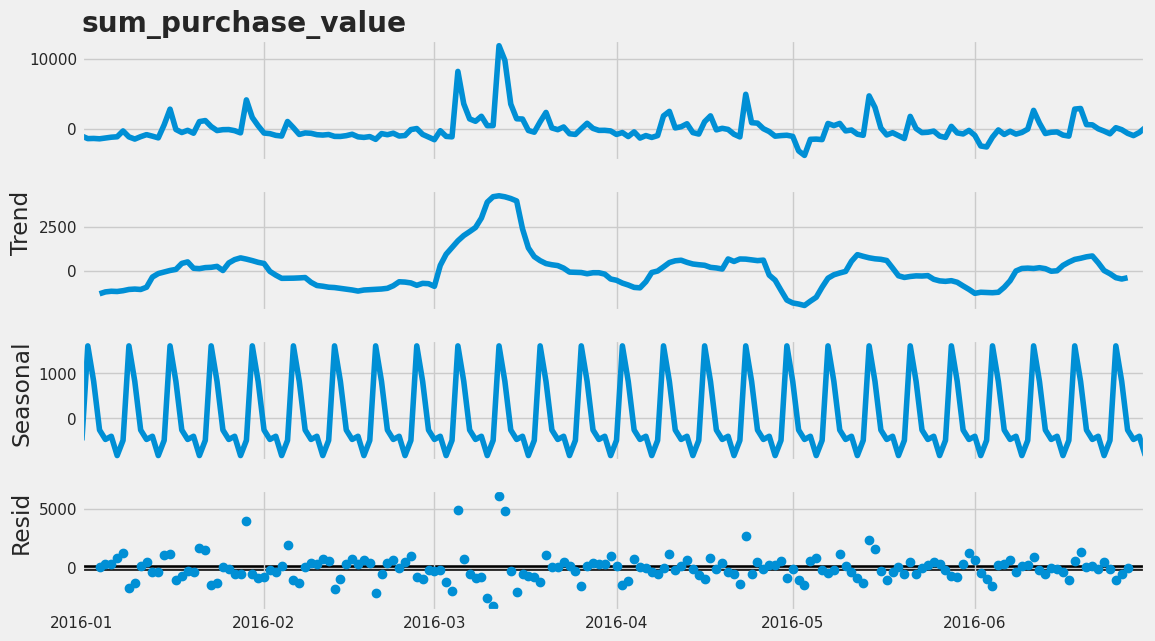

*************************************************
	MEAN_PRODUCT_AGE_WHEN_PURCHASED
*************************************************



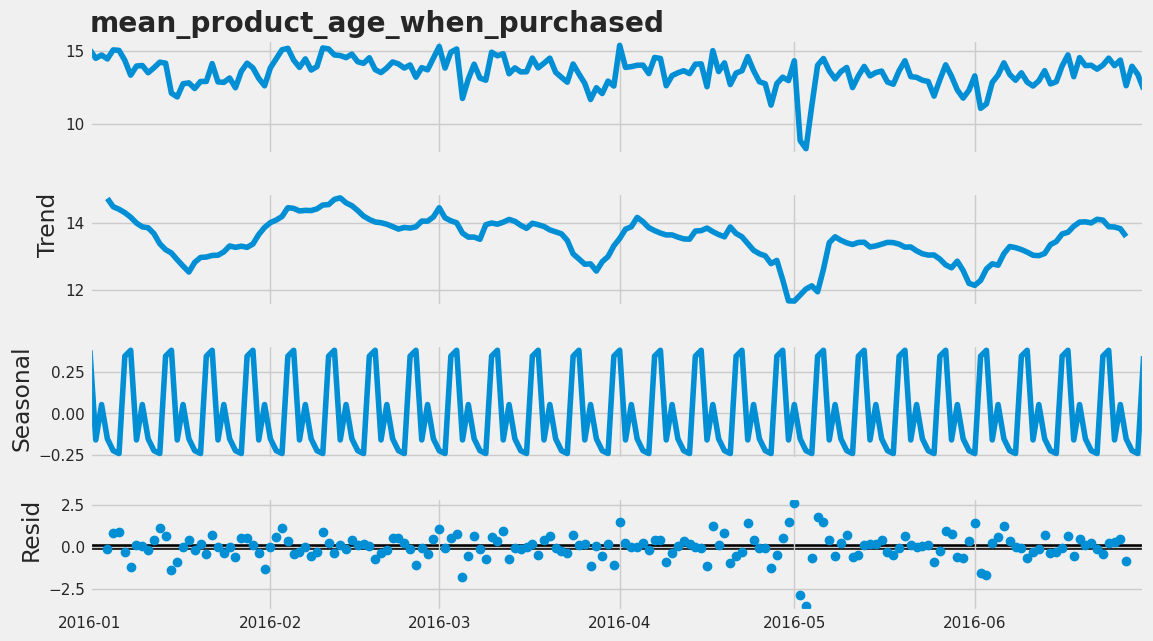

*************************************************
	MEAN_AFFILIATE_COMMISSION_PERCENTUAL
*************************************************



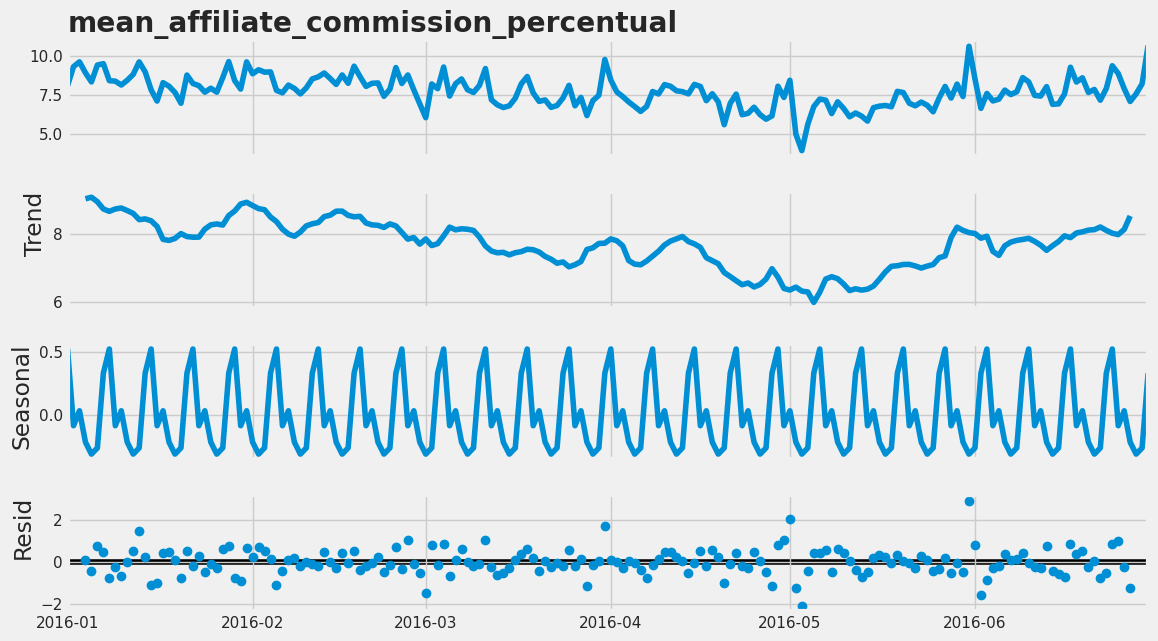

*************************************************
	NUNIQUE_PURCHASE_ID
*************************************************



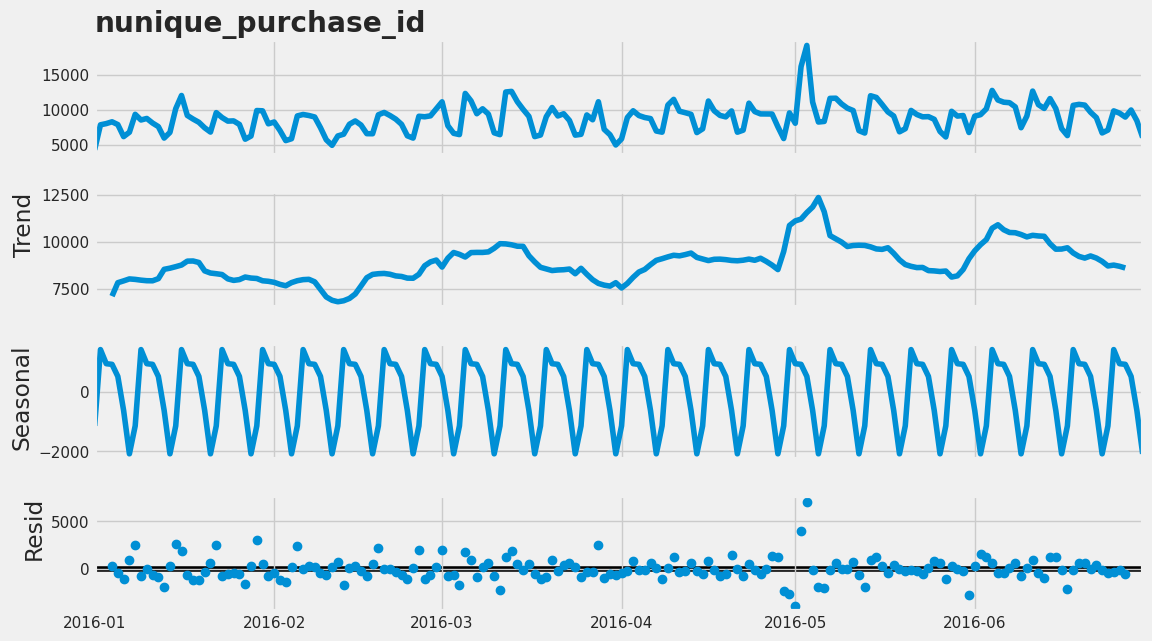

*************************************************
	NUNIQUE_PRODUCT_ID
*************************************************



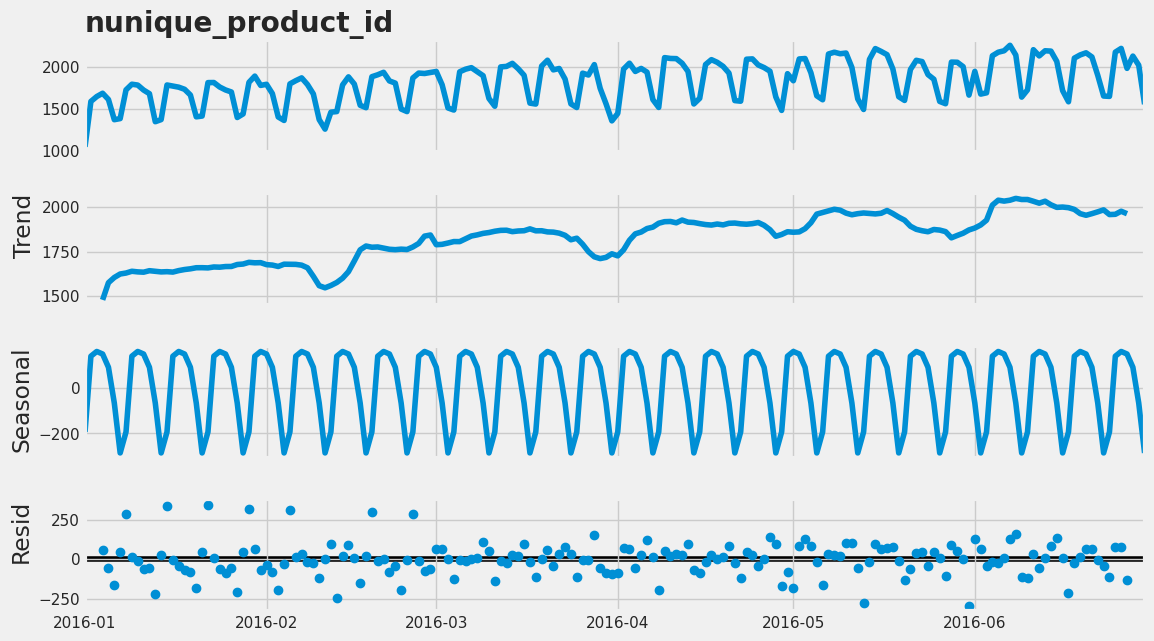

*************************************************
	NUNIQUE_AFFILIATE_ID
*************************************************



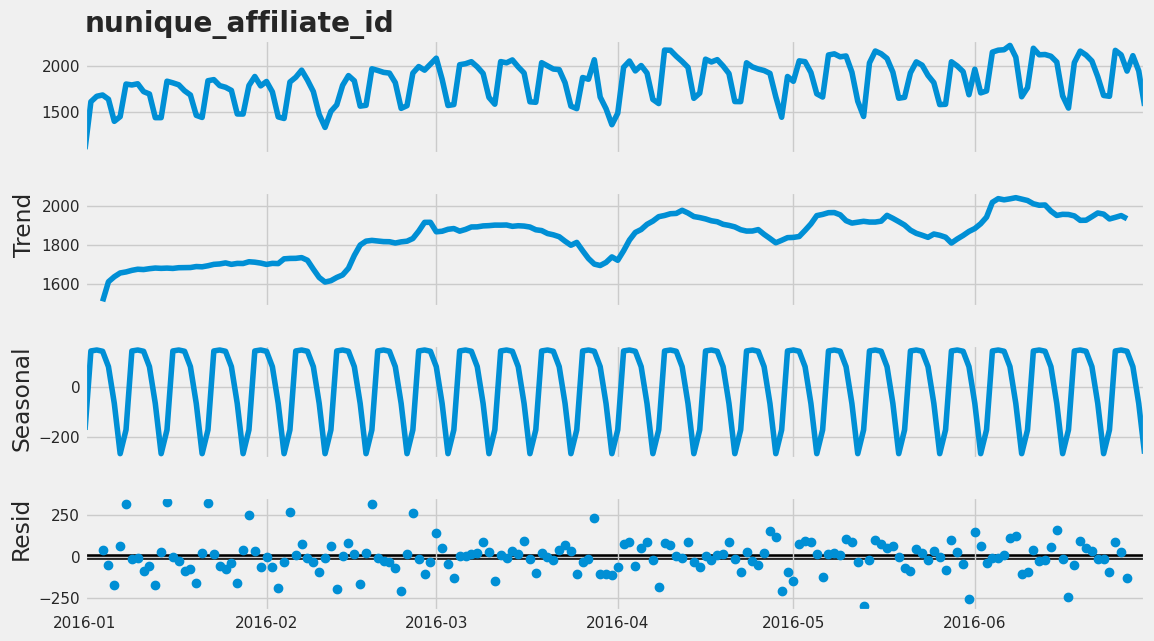

*************************************************
	NUNIQUE_BUYER_ID
*************************************************



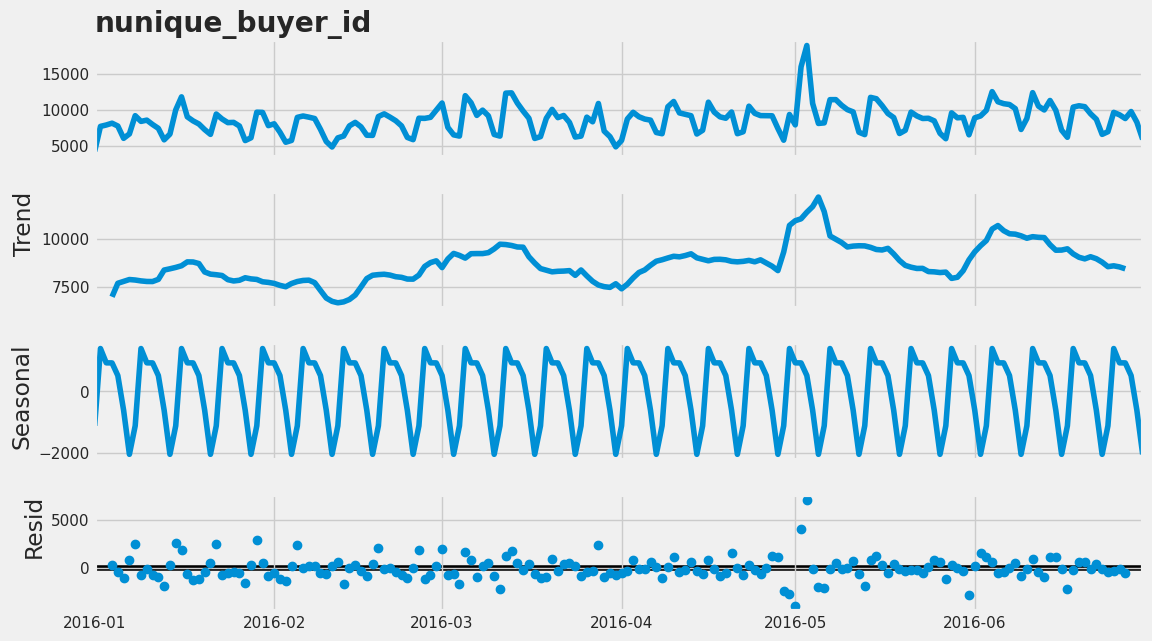

*************************************************
	NUNIQUE_PRODUCT_CATEGORY
*************************************************



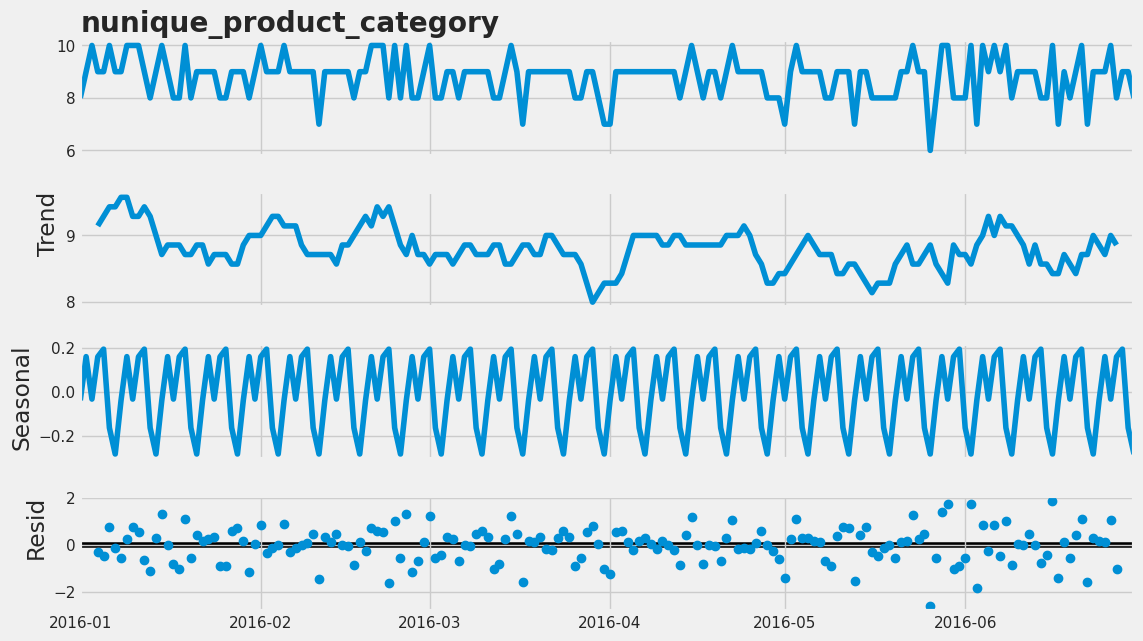

*************************************************
	NUNIQUE_PRODUCT_NICHE
*************************************************



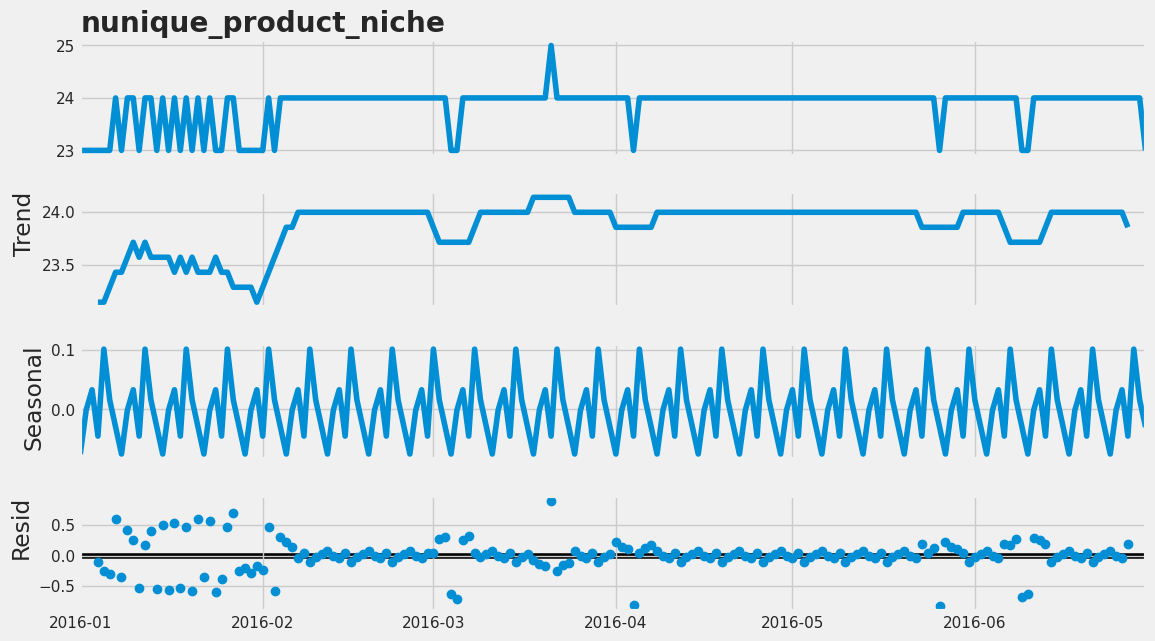

*************************************************
	NUNIQUE_PURCHASE_DEVICE
*************************************************



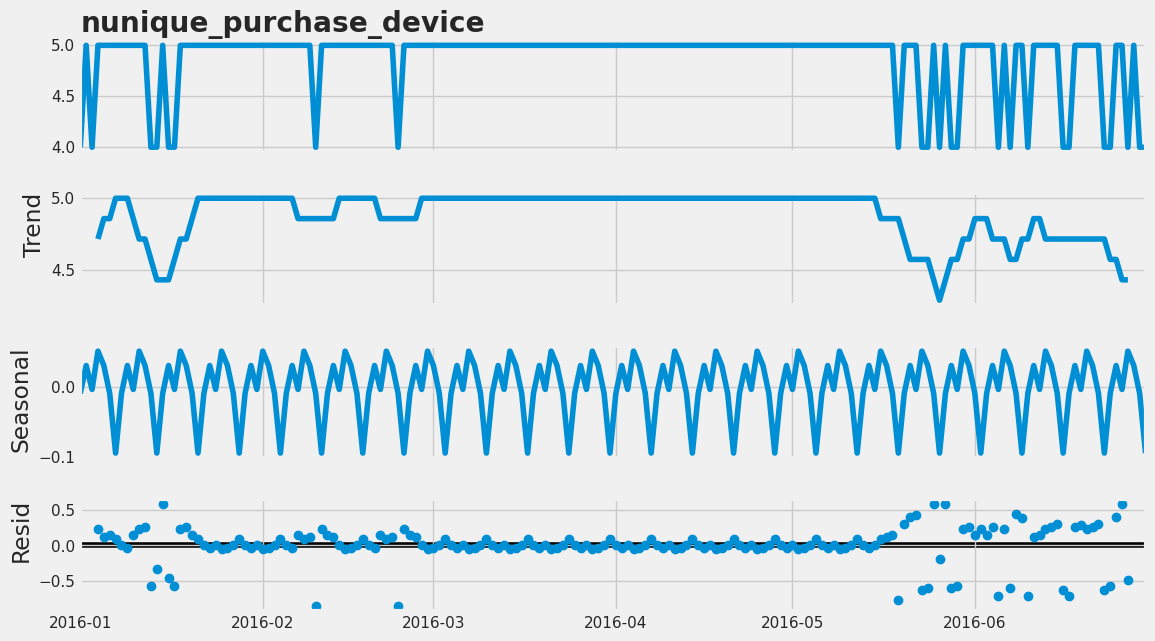

*************************************************
	NUNIQUE_IS_ORIGIN_PAGE_SOCIAL_NETWORK
*************************************************



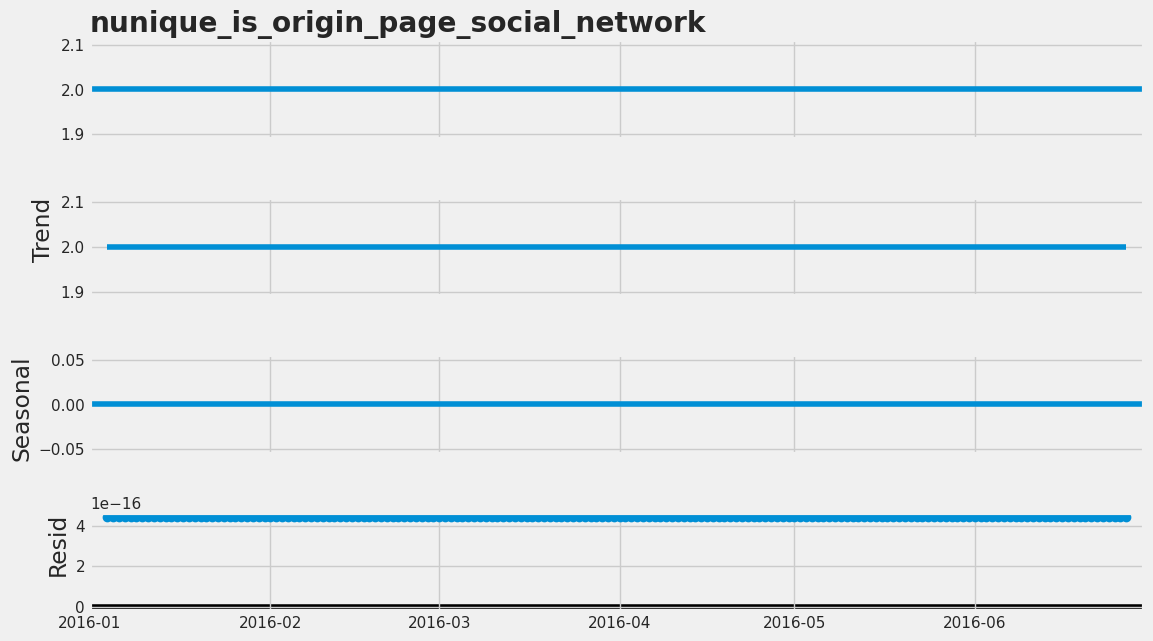

In [95]:
# iterate over columns
for col in df_daily_purchases_agg.columns.tolist():
    # print report
    print(
        f"{'*'*49}\n"
        f"\t{col.upper()}\n"
        f"{'*'*49}\n"
    )
    # plot seasonal decompose
    seasonal_decompose(df_daily_purchases_agg[col], model='additive').plot()
    # plot details
    g = plt.gcf()
    g.set_size_inches(12, 7)
    plt.show()

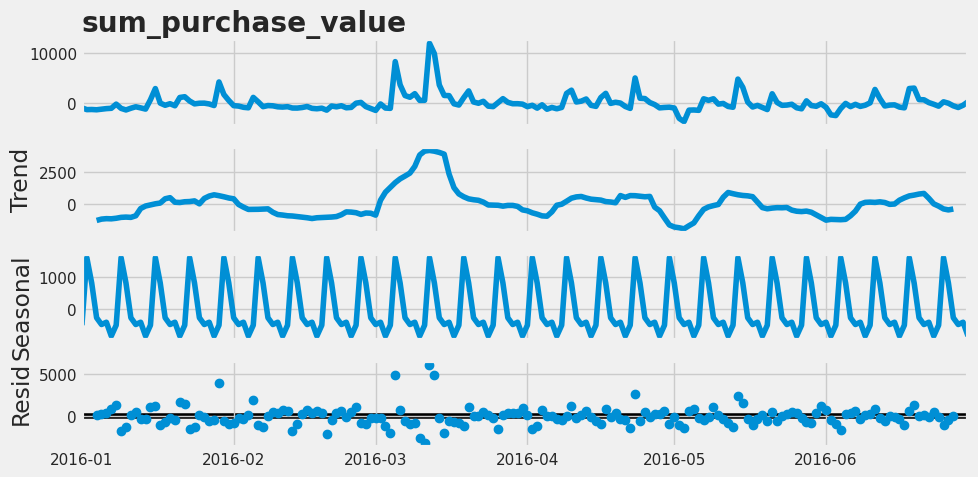

In [96]:
# inspect again target variable
sd = seasonal_decompose(df_daily_purchases_agg["sum_purchase_value"], model='additive')
sd.plot();

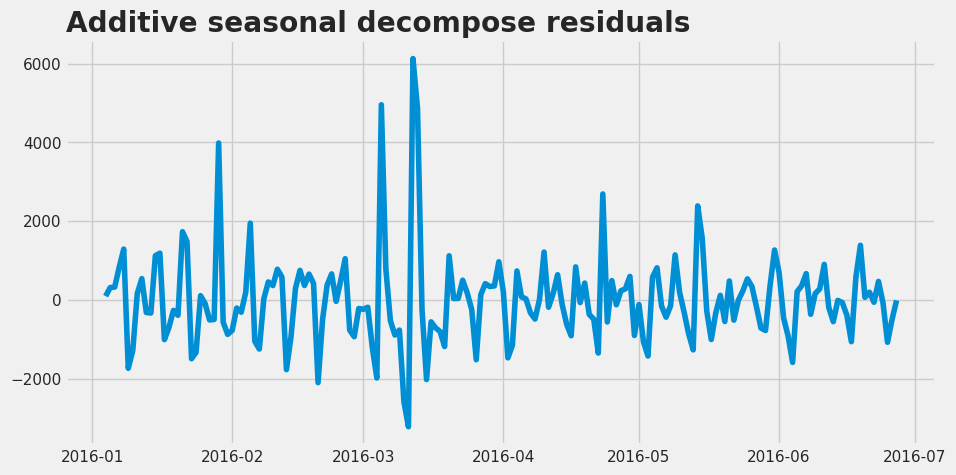

In [97]:
# visually inspect residuals
plt.plot(sd.resid)
plt.title("Additive seasonal decompose residuals");

In [98]:
# perform Augmented Dickey Fuller - ADF to check for stationarity
# H0: The series is not-stationary
adfuller(df_daily_purchases_agg["sum_purchase_value"])[1]  # p-value

0.0056419689735423125

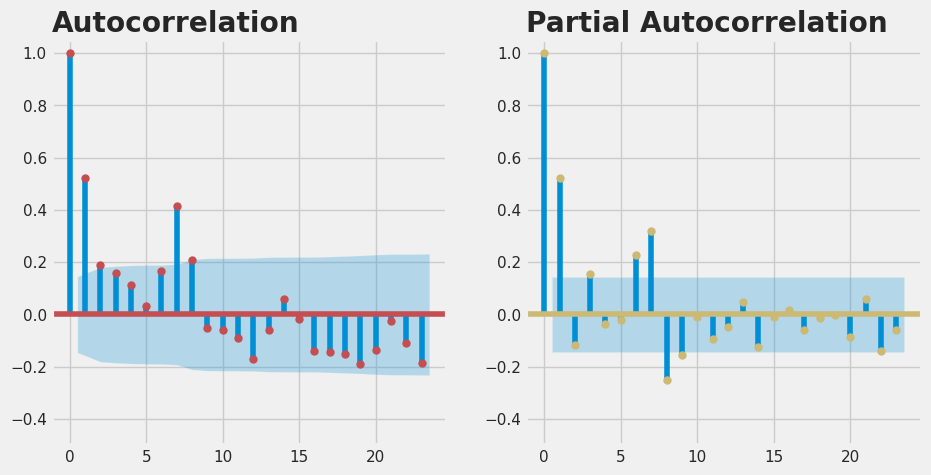

In [99]:
# define figure layout
fig, axs = plt.subplots(nrows=1, ncols=2)
# plot acf and padf
plot_acf(df_daily_purchases_agg["sum_purchase_value"], c="r", zero=True, ax=axs[0])
plot_pacf(df_daily_purchases_agg["sum_purchase_value"], c="y", zero=True, ax=axs[1])
# plot details
axs[0].set_ylim(-0.5, 1.05)
axs[1].set_ylim(-0.5, 1.05)
plt.show()

#### *ARIMA*

In summary, initial guess is:

- **p = 1, q = 2, i = 0**

In [100]:
# define model dataset
df_modelling = df_daily_purchases_agg["sum_purchase_value"]

# define training ratio and split index
# tr = 0.75
# split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# inspect results
print(
    f"Train:\n\tmin={train.index.min()}; \n\tmax={train.index.max()}\n\n"
    f"Test: \n\tmin={test.index.min()}; \n\tmax={test.index.max()}"
    )

Train:
	min=2016-01-01 00:00:00; 
	max=2016-05-31 00:00:00

Test: 
	min=2016-06-01 00:00:00; 
	max=2016-06-30 00:00:00


In [101]:
# define ARIMA model
arima = ARIMA(
    endog=train, 
    exog=None, 
    order=(1, 0, 2), 
    seasonal_order=(0, 0, 0, 0), 
    trend=None, 
    enforce_stationarity=True, 
)    

# fit model to data
arima = arima.fit()
# check results
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     sum_purchase_value   No. Observations:                  152
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1338.925
Date:                Mon, 22 May 2023   AIC                           2687.850
Time:                        16:26:25   BIC                           2702.969
Sample:                    01-01-2016   HQIC                          2693.992
                         - 05-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.9388    656.364      0.046      0.964   -1256.511    1316.389
ar.L1          0.8449      0.208      4.070      0.000       0.438       1.252
ma.L1         -0.2574      0.240     -1.073      0.283      -0.727       0.213
ma.L2         -0.3418      0.252     -1.357      0.175      -0.836       0.152
sigma2      2.767e+06   1.94e+05     14.226      0.000    2.39e+06    3.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3188.35
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.20   Skew:                             3.96
Prob(H) (two-sided):                  0.01   Kurtosis:                        23.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

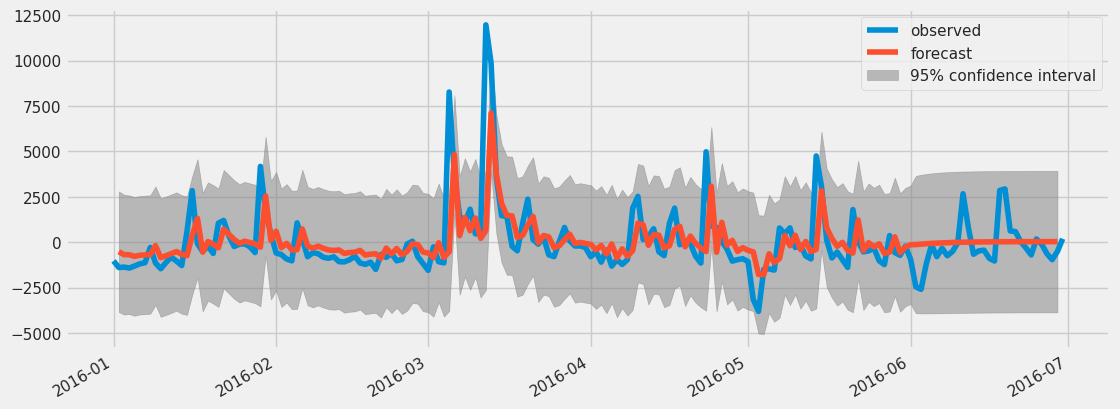

In [102]:
# define plot layout
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# plot real values
axs.plot(df_daily_purchases_agg["sum_purchase_value"], label='observed')
# plot predicted values
plot_predict(arima, start=1, end=180, ax=axs);

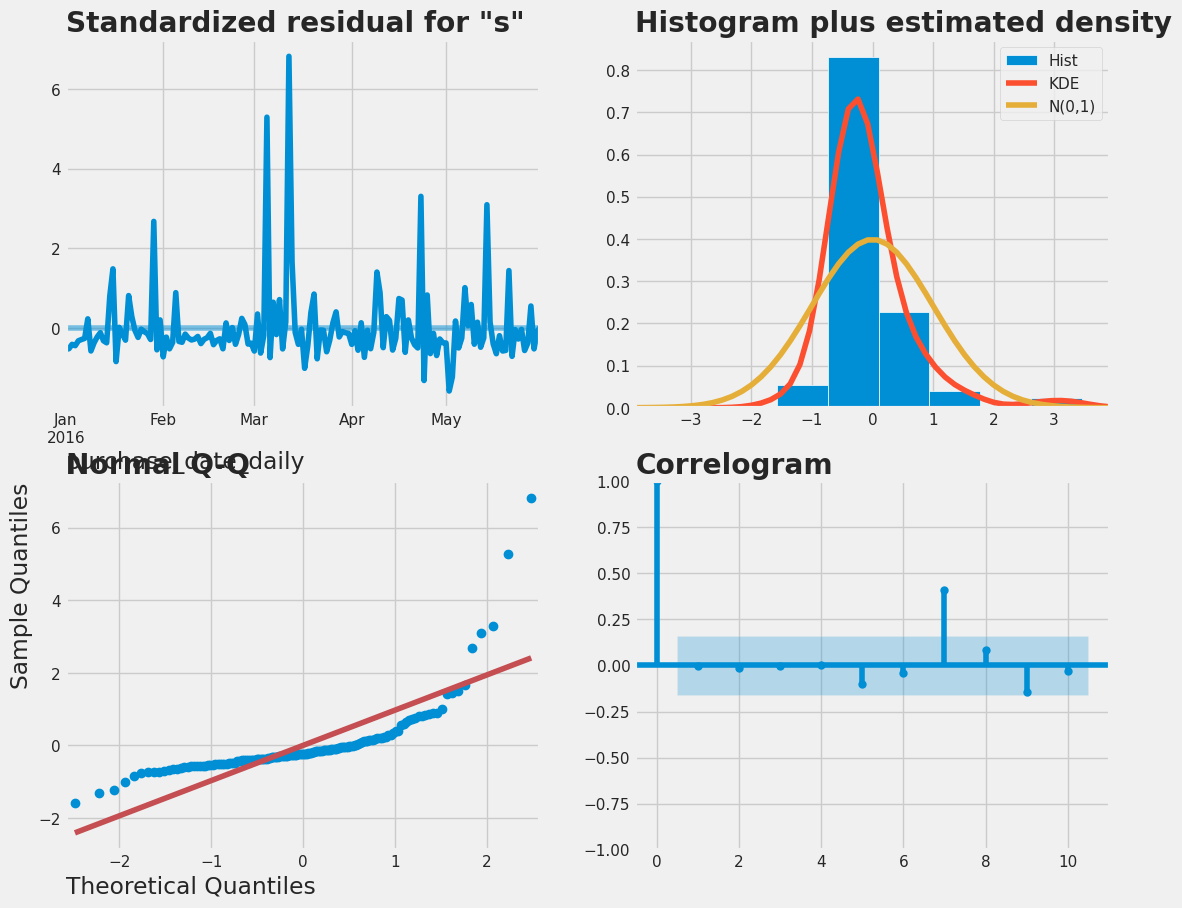

In [103]:
# perform error analysis
arima.plot_diagnostics(figsize=(12,10))
plt.show()

#### *Auto-ARIMA*

In [104]:
# Define Auto-ARIMA to automatically discover the optimal order for an ARIMA model.
auto_model = pm.auto_arima(train,
                    start_p=0, max_p=2,
                    d=0, max_d=0, 
                    start_q=0, max_q=2,
                    start_P=0, max_P=1, 
                    D=1, max_D=1,
                    start_Q=0, max_Q=2,
                    max_order=5, 
                    seasonal=True, m=7, # weekly seasonality
                    trend=None, with_intercept="auto",
                    #out_of_sample_size=7, 
                    scoring="mse",
                    trace=True, error_action="ignore", suppress_warnings=True, 
                    n_jobs=-1
                    )

# try to train model
try:
    # fit mode to data
    auto_model.fit()

# in case of type error    
except TypeError:
    pass

# regardless of errors
finally:
   # inspect results
    display(auto_model.summary())

/home/ds-gustavo-cunha/.pyenv/versions/hotmart_case/lib/python3.10/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=2634.421, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=2577.732, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=2562.806, Time=2.87 sec
 ARIMA(0,0,0)(0,1,0)[7]             : AIC=2632.463, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=2596.084, Time=0.06 sec
 ARIMA(0,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=2.90 sec
 ARIMA(0,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=5.00 sec
 ARIMA(0,0,1)(1,1,0)[7] intercept   : AIC=2591.992, Time=0.14 sec
 ARIMA(0,0,1)(1,1,2)[7] intercept   : AIC=inf, Time=5.12 sec
 ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=2608.831, Time=1.78 sec
 ARIMA(1,0,1)(0,1,1)[7] intercept   : AIC=2554.878, Time=3.65 sec
 ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=2584.486, Time=0.39 sec
 ARIMA(1,0,1)(1,1,1)[7] intercept   : AIC=inf, Time=3.88 sec
 ARIMA(1,0,1)(0,1,2)[7] intercept   : AIC=inf, Time=5.63 sec
 ARIMA(1,0,1)(1,1,0)[7] intercept   : AIC=2579.695, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  152
Model:             SARIMAX(1, 0, 0)x(1, 1, [1, 2], 7)   Log Likelihood               -1265.342
Date:                                Mon, 22 May 2023   AIC                           2542.685
Time:                                        16:27:55   BIC                           2560.545
Sample:                                    01-01-2016   HQIC                          2549.942
                                         - 05-31-2016                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -16.4286     57.434     -0.286      0.775    -128.997      96.140
ar.L1          0.5692      0.062      9.223      0.000       0.448       0.690
ar.S.L7       -0.0395      0.180     -0.219      0.826      -0.393       0.314
ma.S.L7       -0.5036      0.218     -2.309      0.021      -0.931      -0.076
ma.S.L14      -0.3924      0.144     -2.728      0.006      -0.674      -0.110
sigma2      2.347e+06   2.71e+05      8.646      0.000    1.81e+06    2.88e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1234.20
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.87   Skew:                             2.65
Prob(H) (two-sided):                  0.03   Kurtosis:                        16.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/ds-gustavo-cunha/.pyenv/versions/hotmart_case/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['label']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


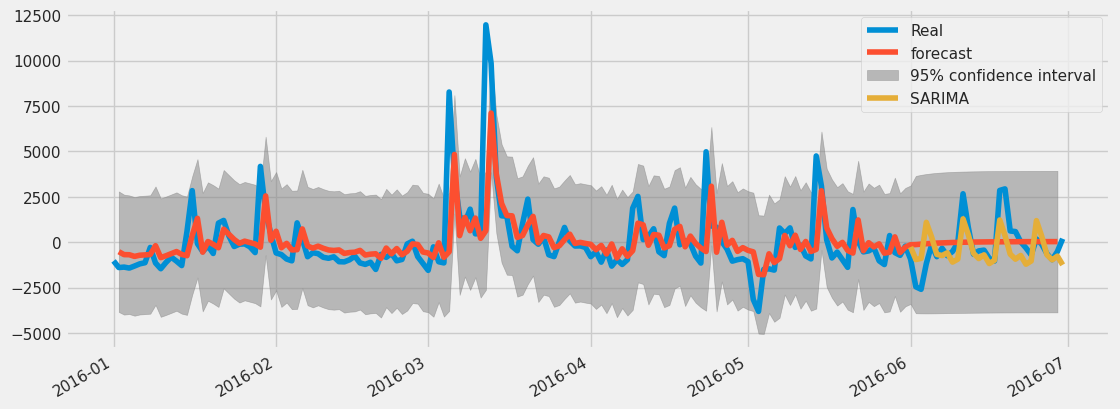

In [105]:
# define plot layout
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
# plot real values
axs.plot(df_daily_purchases_agg["sum_purchase_value"], label='Real')
# plot ARIMA predicted values
plot_predict(arima, start=1, end=180, ax=axs, label="ARIMA");
# plot SARIMA
plt.plot(auto_model.predict(len(test)), label="SARIMA")
plt.legend();

#### *Profet*

In [106]:
# define model dataset
df_modelling = df_daily_purchases_agg["sum_purchase_value"]
# set index as ds column
df_modelling = df_modelling.reset_index().rename(columns={"purchase_date_daily": "ds", "sum_purchase_value": "y"})

# define training ratio and split index
# tr = 0.75
# split_index = int(len(df_modelling)*0.7)
split_index = -30

# split dataset
train = df_modelling.iloc[:split_index]
test = df_modelling.iloc[split_index:]

# instanciate model
model = Prophet(seasonality_mode='additive')

# fit model to data
model.fit(train)

16:27:57 - cmdstanpy - INFO - Chain [1] start processing
16:27:57 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
# make forecasts for testing data
test_forecast = model.predict(test)
test_forecast.head()

ds  trend  yhat_lower  yhat_upper  trend_lower  trend_upper   
0 2016-06-01  115.8    -2,505.2     2,075.1        115.8        115.8  \
1 2016-06-02  115.6    -2,973.2     1,582.5        115.5        115.7   
2 2016-06-03  115.5    -2,476.4     1,930.5        115.2        115.7   
3 2016-06-04  115.3      -572.7     3,868.9        114.8        115.8   
4 2016-06-05  115.1    -1,323.9     3,051.3        114.3        115.9   

   additive_terms  additive_terms_lower  additive_terms_upper  weekly   
0          -370.9                -370.9                -370.9  -370.9  \
1          -777.1                -777.1                -777.1  -777.1   
2          -379.3                -379.3                -379.3  -379.3   
3         1,586.4               1,586.4               1,586.4 1,586.4   
4           736.6                 736.6                 736.6   736.6   

   weekly_lower  weekly_upper  multiplicative_terms   
0        -370.9        -370.9                   0.0  \
1        -777.1        -777.1                   0.0   
2        -379.3        -379.3                   0.0   
3       1,586.4       1,586.4                   0.0   
4         736.6         736.6                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper    yhat  
0                         0.0                         0.0  -255.1  
1                         0.0                         0.0  -661.4  
2                         0.0                         0.0  -263.8  
3                         0.0                         0.0 1,701.7  
4                         0.0                         0.0   851.7  

[5 rows x 16 columns]

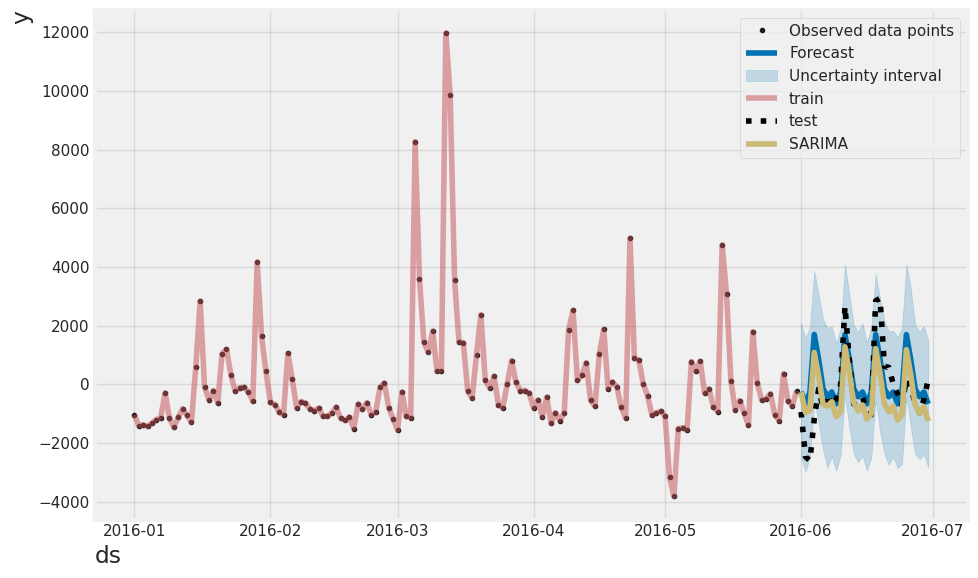

In [108]:
# plot forecast
model.plot(test_forecast);
plt.plot(train["ds"], train["y"], label="train", color="r", alpha=0.5)
plt.plot(test["ds"], test["y"], label="test", color="black", linestyle="dotted")
plt.plot(auto_model.predict(len(test)), color="y", label="SARIMA")
plt.legend()
#plt.xlim(train.index.min()a)
plt.show()

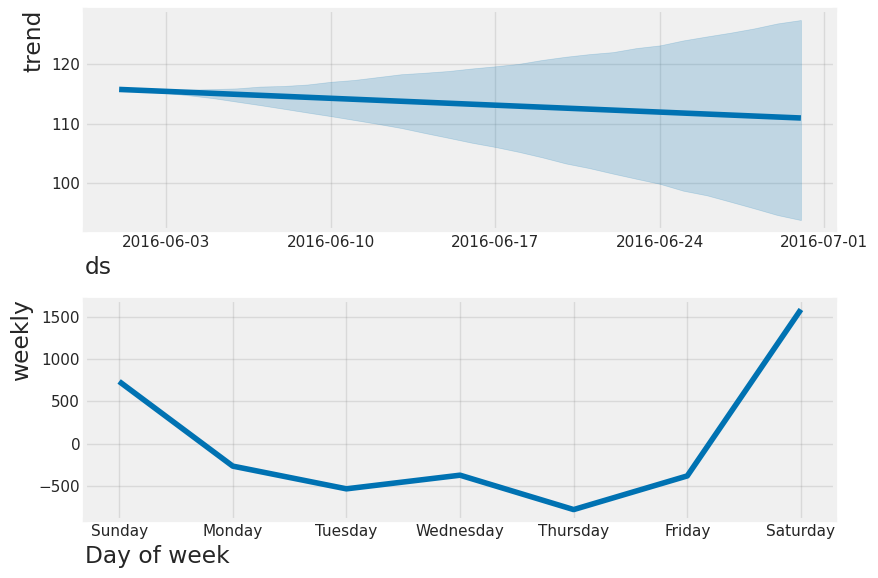

In [109]:
# plot prediction components
model.plot_components(test_forecast);

In [110]:
# cross-validate model
df_cv = cross_validation(
    model=model, 
    initial = "30 days", # size of the initial training period
    period = "15 days", # spacing between cutoff dates
    horizon = "30 days", # forecast horizon  
    )

# inspect results
df_cv

  0%|          | 0/7 [00:00<?, ?it/s]16:28:00 - cmdstanpy - INFO - Chain [1] start processing
16:28:00 - cmdstanpy - INFO - Chain [1] done processing
 14%|█▍        | 1/7 [00:00<00:01,  3.98it/s]16:28:00 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
 29%|██▊       | 2/7 [00:00<00:01,  3.32it/s]16:28:01 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
 43%|████▎     | 3/7 [00:00<00:01,  3.06it/s]16:28:01 - cmdstanpy - INFO - Chain [1] start processing
16:28:01 - cmdstanpy - INFO - Chain [1] done processing
 57%|█████▋    | 4/7 [00:01<00:00,  3.05it/s]16:28:01 - cmdstanpy - INFO - Chain [1] start processing
16:28:02 - cmdstanpy - INFO - Chain [1] done processing
 71%|███████▏  | 5/7 [00:01<00:00,  3.27it/s]16:28:02 - cmdstanpy - INFO - Chain [1] start processing
16:28:02 - cmdstanpy - INFO - Chain [1] done processing
 86%|████████▌ | 6/7 [00:01<00:00,  4.08it/s]16:28:02 - cmds

ds    yhat  yhat_lower  yhat_upper        y     cutoff
0   2016-02-02   877.8      -137.8     1,867.9   -685.9 2016-02-01
1   2016-02-03   708.5      -210.8     1,649.7   -932.1 2016-02-01
2   2016-02-04 1,002.5        38.8     1,906.9 -1,031.8 2016-02-01
3   2016-02-05 2,717.4     1,687.4     3,666.9  1,061.1 2016-02-01
4   2016-02-06 2,243.8     1,224.4     3,246.4    170.5 2016-02-01
..         ...     ...         ...         ...      ...        ...
205 2016-05-27   310.6    -1,994.9     2,702.8 -1,235.3 2016-05-01
206 2016-05-28 2,004.2      -217.4     4,346.6    363.1 2016-05-01
207 2016-05-29 1,230.1      -961.9     3,719.2   -578.3 2016-05-01
208 2016-05-30   388.3    -2,001.3     2,725.4   -728.7 2016-05-01
209 2016-05-31   173.5    -2,224.4     2,355.4   -222.0 2016-05-01

[210 rows x 6 columns]

In [111]:
# get performance metrics
df_performance = performance_metrics(df_cv)
df_performance

horizon          mse    rmse     mae  mape  mdape  smape  coverage
0   3 days  7,267,097.3 2,695.8 2,019.4   2.1    1.8    1.6       0.4
1   4 days  7,369,614.3 2,714.7 2,082.9   2.5    1.6    1.7       0.5
2   5 days  6,510,897.3 2,551.6 1,913.9   3.3    1.6    1.7       0.6
3   6 days  3,386,130.0 1,840.1 1,647.0   3.3    1.6    1.7       0.7
4   7 days  3,003,692.0 1,733.1 1,586.8   2.7    1.6    1.6       0.7
5   8 days  2,963,203.8 1,721.4 1,528.2   1.8    1.5    1.4       0.6
6   9 days  3,108,002.0 1,763.0 1,401.4  12.2    1.2    1.3       0.6
7  10 days  9,393,439.5 3,064.9 1,755.3  13.8    1.6    1.4       0.6
8  11 days 14,929,316.5 3,863.8 2,219.0  15.6    2.4    1.5       0.7
9  12 days 15,969,172.8 3,996.1 2,501.4   5.4    2.4    1.7       0.7
10 13 days  9,920,026.4 3,149.6 2,234.1   4.1    1.9    1.7       0.7
11 14 days  5,256,595.8 2,292.7 2,054.2   2.6    1.6    1.7       0.6
12 15 days  4,802,212.3 2,191.4 1,977.4   2.6    2.4    1.6       0.5
13 16 days  5,713,034.5 2,390.2 2,025.4   2.5    2.0    1.6       0.5
14 17 days  6,741,770.9 2,596.5 2,130.0   2.7    2.0    1.7       0.5
15 18 days 10,147,342.6 3,185.5 2,614.8   3.2    1.5    1.8       0.5
16 19 days 10,503,232.4 3,240.9 2,747.6   4.0    2.1    1.9       0.5
17 20 days  9,188,754.8 3,031.3 2,512.1   3.8    2.2    1.8       0.5
18 21 days  5,798,667.5 2,408.0 2,123.1   4.5    2.4    1.8       0.5
19 22 days  4,749,843.6 2,179.4 1,912.4   3.6    2.4    1.6       0.5
20 23 days  4,415,577.7 2,101.3 1,784.5   3.2    1.8    1.6       0.6
21 24 days  3,658,295.1 1,912.7 1,486.0   2.2    1.6    1.4       0.7
22 25 days  9,359,926.8 3,059.4 1,931.8   7.1    1.8    1.5       0.7
23 26 days 14,155,052.7 3,762.3 2,465.4  11.8    3.4    1.7       0.7
24 27 days 15,334,313.1 3,915.9 2,829.4  11.8    2.9    1.8       0.7
25 28 days  9,875,201.7 3,142.5 2,485.3   7.1    2.9    1.8       0.7
26 29 days  6,967,607.0 2,639.6 2,304.4   2.7    2.9    1.7       0.6
27 30 days  6,947,564.2 2,635.8 2,214.4   3.3    3.1    1.7       0.5

[28 rows x 8 columns]

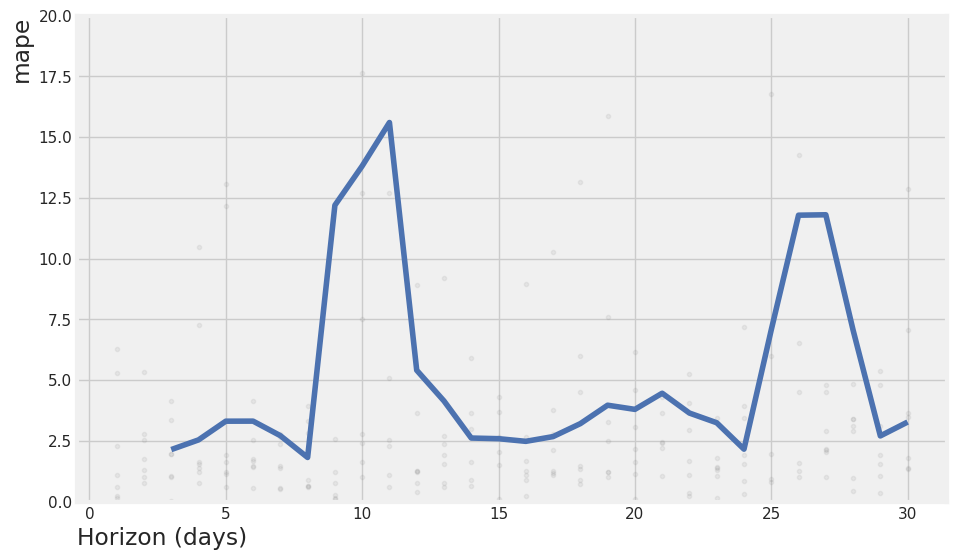

In [112]:
# plot mape performance
plot_cross_validation_metric(df_cv, metric='mape')
plt.ylim(0, 20);

In [113]:
# delete previous section dataframe to save memory
lst = [df_daily_purchases_agg]
del lst
del df_daily_purchases_agg

### **H5.** What **features most impact** the success of a **product**? that is, what makes a **product sell more**?
        - Success of a product = number of products sold
            - Inspect features with high correlation to the number of product sold
            - Inspect feature with high correlation with an increasing trend of products sold
            - Check for simple causal inference techniques
              - knowing features that best impact the product success, we can use this feature for marketing purpose (scalling effort) and, perhaps, get a better overview about what leads to focus on.


In [114]:
# inspect source dataframe
check_dataframe(df_eda, summary_stats=True)

*************************************************
Dataframe size in memory: 486.323 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599826, 17) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
531840      11926913      201684        922823       922823   3888956  \
1521863     13856353      167968       3425706      3425706    535774   
1066845     12982700      219755       6697083      6697083   7224817   
737759      12341707      158646        575974       575974    115263   
983433      12830654       60982        628228       628228   5150820   

              purchase_date product_creation_date product_category   
531840  2016-03-07 18:47:00   2016-01-31 16:35:13    Phisical book  \
1521863 2016-06-21 18:45:55   2015-08-15 16:16:00    Phisical book   
1066845 2016-05-05 13:35:12   2016-04-11 13:35:45    Phisical book   
737759  2016-03-30 23:45:52   2015-06-23 19:17:46    Phisical book   
983433  2016-04-27 17:44:50   2013-06-11 17:48:47    Phisical book   

               product_niche  purchase_value  affiliate_commission_percentual   
531840   Presentation skills             0.8                              0.0  \
1521863              Careers             0.2                              0.0   
1066845          Immigration            -0.2                              0.0   
737759             Economics             0.1                              0.0   
983433           Negotiation             0.2                              0.0   

        purchase_device  is_origin_page_social_network   
531840          Desktop                           True  \
1521863        Smart TV                           True   
1066845        eReaders                           True   
737759         eReaders                           True   
983433         eReaders                           True   

         product_age_when_purchased binned_affiliate_commission_percentual   
531840                            2                                [0, 10)  \
1521863                          10                                [0, 10)   
1066845                           1                                [0, 10)   
737759                            9                                [0, 10)   
983433                           34                                [0, 10)   

        binned_product_age_when_purchased purchase_date_daily  
531840                            [0, 10)          2016-03-07  
1521863                          [10, 20)          2016-06-21  
1066845                           [0, 10)          2016-05-05  
737759                            [0, 10)          2016-03-30  
983433                           [30, 40)          2016-04-27  

[5 rows x 17 columns]

*************************************************


In [115]:
# inspect unique purchase devices
display(df_eda["purchase_device"].unique())

# convert purchase_device to dummies
df_purchase_device_dummies = pd.get_dummies(data=df_eda["purchase_device"], 
                                            prefix="purchase_device", 
                                            prefix_sep='_', 
                                            dummy_na=False, 
                                            columns=None, 
                                            sparse=False, 
                                            drop_first=False, 
                                            dtype=bool               
                                            )

# inspect results
df_purchase_device_dummies.head()

array(['Smart TV', 'Tablet', 'Desktop', 'eReaders', 'Cellphone'],
      dtype=object)

purchase_device_Cellphone  purchase_device_Desktop   
0                      False                    False  \
1                      False                    False   
2                      False                    False   
3                      False                    False   
4                      False                    False   

   purchase_device_Smart TV  purchase_device_Tablet  purchase_device_eReaders  
0                      True                   False                     False  
1                      True                   False                     False  
2                      True                   False                     False  
3                      True                   False                     False  
4                      True                   False                     False  

[5 rows x 5 columns]

In [116]:
# make a copy of eda dataframe
df_product = df_eda.copy()

# sanity check
assert len(df_product) == len(df_purchase_device_dummies), "Purchase dummies dataframe miss data!"

# concatenate purchase_device dummies
df_product[df_purchase_device_dummies.columns.str.lower()] = df_purchase_device_dummies
df_product = df_product.rename(columns={"purchase_device_smart tv": "purchase_device_smart_tv"})

# inspect results
check_dataframe(df_product, summary_stats=True)

*************************************************
Dataframe size in memory: 494.323 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (1599826, 22) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(5)


purchase_id  product_id  affiliate_id  producer_id  buyer_id   
818258      12505961      217807       2204011      2204011   6994924  \
1154430     13145868      108622         42346        42346   7300019   
593976      12051455      145986       4264973      4264973   6779564   
134110      11108027      190988        141418       141418   5650709   
253349      11349973       33431       1206265         2724   5550406   

              purchase_date product_creation_date product_category   
818258  2016-04-09 22:24:44   2016-04-04 15:54:48          Podcast  \
1154430 2016-05-14 14:59:17   2014-07-11 21:33:55    Phisical book   
593976  2016-03-14 01:43:07   2015-04-10 19:05:22    Phisical book   
134110  2016-01-17 17:44:38   2015-12-10 17:56:54    Phisical book   
253349  2016-02-01 10:11:51   2012-05-20 10:27:38    Phisical book   

               product_niche  purchase_value  affiliate_commission_percentual   
818258      Personal finance            -0.5                              0.0  \
1154430           Accounting             3.2                              0.0   
593976            Accounting             0.8                              0.0   
134110               Careers            -0.1                              0.0   
253349   Presentation skills            -0.5                             70.0   

        purchase_device  is_origin_page_social_network   
818258          Desktop                           True  \
1154430       Cellphone                           True   
593976          Desktop                           True   
134110        Cellphone                           True   
253349          Desktop                           True   

         product_age_when_purchased binned_affiliate_commission_percentual   
818258                            0                                [0, 10)  \
1154430                          22                                [0, 10)   
593976                           11                                [0, 10)   
134110                            1                                [0, 10)   
253349                           45                               [70, 80)   

        binned_product_age_when_purchased purchase_date_daily   
818258                            [0, 10)          2016-04-09  \
1154430                          [20, 30)          2016-05-14   
593976                           [10, 20)          2016-03-14   
134110                            [0, 10)          2016-01-17   
253349                           [40, 50)          2016-02-01   

         purchase_device_cellphone  purchase_device_desktop   
818258                       False                     True  \
1154430                       True                    False   
593976                       False                     True   
134110                        True                    False   
253349                       False                     True   

         purchase_device_smart_tv  purchase_device_tablet   
818258                      False                   False  \
1154430                     False                   False   
593976                      False                   False   
134110                      False                   False   
253349                      False                   False   

         purchase_device_ereaders  
818258                      False  
1154430                     False  
593976                      False  
134110                      False  
253349                      False  

[5 rows x 22 columns]

*************************************************


In [117]:
# inspect negative affiliate_commission_percentual
df_product[df_product["affiliate_commission_percentual"] < 0]

purchase_id  product_id  affiliate_id  producer_id  buyer_id   
0        1663958        6640        209372       116238   1200397  \
1        1677087        2350        141418         2821   1083764   
2        2017360       35669        618642       618642   1436106   
3        2017379       57998       1164511        70388   1436118   
4        2017382       58329       1261488       221253   1386357   
..           ...         ...           ...          ...       ...   
194      8654999       47704          5600       782369   4988478   
195      8972356      154310       3382787      3382787    821015   
196     10839476      190145       5277553      5277553   5917684   
197     10839479      175067        147273       147273    451863   
198     10839480      183990       2070939      2070939   5917687   

          purchase_date product_creation_date product_category   
0   2016-06-26 12:00:00   2011-03-19 15:47:36            Video  \
1   2016-06-26 12:00:00   2010-07-05 01:50:15          Podcast   
2   2016-06-26 12:00:00   2012-06-13 02:59:37          Podcast   
3   2016-06-26 12:00:00   2013-05-07 08:51:31          Podcast   
4   2016-06-26 12:00:00   2013-05-12 08:12:06          Podcast   
..                  ...                   ...              ...   
194 2016-06-26 12:00:00   2012-11-21 09:37:02    Phisical book   
195 2016-06-26 12:00:00   2015-05-31 00:12:18          Podcast   
196 2016-01-01 00:00:27   2015-12-06 11:33:07    Phisical book   
197 2016-01-01 00:02:00   2015-09-20 19:22:05          Podcast   
198 2016-01-01 00:03:42   2015-11-06 18:41:52    Phisical book   

           product_niche  purchase_value  affiliate_commission_percentual   
0    Presentation skills            -0.3                             -1.0  \
1       Child psychology            -0.2                             -1.0   
2    Presentation skills            -0.5                             -1.0   
3     Anxiety management            -0.4                             -1.0   
4       Teaching English            -0.5                             -1.0   
..                   ...             ...                              ...   
194     Personal finance             0.3                             -1.0   
195           Government            -0.5                             -1.0   
196              Careers            -0.5                             -1.0   
197  Presentation skills            -0.5                             -1.0   
198          Negotiation            -0.4                             -1.0   

    purchase_device  is_origin_page_social_network   
0          Smart TV                           True  \
1          Smart TV                           True   
2          Smart TV                           True   
3          Smart TV                           True   
4          Smart TV                           True   
..              ...                            ...   
194        Smart TV                           True   
195        Smart TV                           True   
196         Desktop                           True   
197         Desktop                           True   
198         Desktop                           True   

     product_age_when_purchased binned_affiliate_commission_percentual   
0                            63                                [-1, 0)  \
1                            71                                [-1, 0)   
2                            48                                [-1, 0)   
3                            37                                [-1, 0)   
4                            37                                [-1, 0)   
..                          ...                                    ...   
194                          43                                [-1, 0)   
195                          13                                [-1, 0)   
196                           1                                [-1, 0)   
197                           4                                [-1, 0

In [118]:
# assign affiliate_commission_percentual = 0 when is was originally NaN
df_product["affiliate_commission_percentual"] = df_product["affiliate_commission_percentual"].apply(lambda x: 0 if x < 0 else x)

# inspect results
summary_statistics(df_product[["affiliate_commission_percentual"]])



Statistics for Numerical Variables [NaNs are ignored]:


In [119]:
# aggregate meaning information per product
df_product_agg = df_product.sort_values(
        by=["purchase_date"], ignore_index=True # order dataframe by purchase data before aggregating
    ).groupby(
        by="product_id", as_index=False
    ).agg(
    nunique_buyer_id = ("buyer_id", "nunique"),
    nunique_purchase_id = ("purchase_id", "nunique"), 
    mean_purchase_value = ("purchase_value", "mean"),
    nunique_affiliate_id = ("affiliate_id", "nunique"),
    nunique_producer_id = ("producer_id", "nunique"),
    last_purchase_date = ("purchase_date", "max"),
    min_product_creation_date = ("product_creation_date", "min"), 
    last_product_category = ("product_category", "last"),
    last_product_niche = ("product_niche", "last"),
    mean_affiliate_commission_percentual = ("affiliate_commission_percentual", "mean"),
    mean_purchase_device_cellphone = ("purchase_device_cellphone", "mean"),
    mean_purchase_device_desktop = ("purchase_device_desktop", "mean"),
    mean_purchase_device_smart_tv = ("purchase_device_smart_tv", "mean"),
    mean_purchase_device_tablet = ("purchase_device_tablet", "mean"),
    mean_purchase_device_ereaders = ("purchase_device_ereaders", "mean"),
    mean_is_origin_page_social_network = ("is_origin_page_social_network", "mean"),
    mean_product_age_when_purchased = ("product_age_when_purchased", "mean"),
)

# inspect results
df_product_agg

product_id  nunique_buyer_id  nunique_purchase_id  mean_purchase_value   
0               4                 2                    2                 -0.5  \
1              17                 1                    1                 -0.5   
2              27                 2                    2                 -0.5   
3              35                 3                    3                 -0.5   
4              39                 3                    3                 -0.5   
...           ...               ...                  ...                  ...   
17877      241639                 7                    8                 -0.5   
17878      241745                 1                    1                 -0.5   
17879      241896                 5                    5                 -0.4   
17880      241903                 1                    1                 -0.5   
17881      241977                 1                    1                  0.2   

       nunique_affiliate_id  nunique_producer_id  last_purchase_date   
0                         1                    1 2016-05-08 21:23:11  \
1                         1                    1 2016-03-09 00:31:23   
2                         2                    1 2016-02-22 13:33:26   
3                         1                    1 2016-05-26 16:45:42   
4                         1                    1 2016-05-27 16:36:25   
...                     ...                  ...                 ...   
17877                     1                    1 2016-06-30 19:51:22   
17878                     1                    1 2016-06-30 16:35:53   
17879                     1                    1 2016-06-30 13:51:35   
17880                     1                    1 2016-06-29 19:28:20   
17881                     1                    1 2016-06-29 18:22:33   

      min_product_creation_date last_product_category   last_product_niche   
0           2008-10-27 01:39:34               Podcast              Disease  \
1           2008-10-29 13:54:42               Podcast     Personal finance   
2           2008-10-31 20:53:25               Podcast  Presentation skills   
3           2008-11-02 16:44:11               Podcast  Presentation skills   
4           2008-11-02 19:13:51                   App  Presentation skills   
...                         ...                   ...                  ...   
17877       2016-06-28 18:45:19         Phisical book          Negotiation   
17878       2016-06-28 22:32:59              Workshop         Organization   
17879       2016-06-29 13:38:40         Phisical book  Presentation skills   
17880       2016-06-29 13:59:06         Phisical book          Negotiation   
17881       2016-06-29 17:35:58         Phisical book  Presentation skills   

       mean_affiliate_commission_percentual  mean_purchase_device_cellphone   
0                                       0.0                             0.0  \
1                                      47.0                             0.0   
2                                      25.0                             0.0   
3                                      60.0                             0.0   
4                                      50.0                             0.0   
...                                     ...                             ...   
17877                                   0.0                             0.0   
17878                                   0.0                             0.0   
17879                                   0.0                             0.0   
17880                                   0.0                             0.0   
17881                                   0.0                             0.0   

       mean_purchase_device_desktop  mean_purchase_device_smart_tv   
0                               1.0                            0.0  \
1                               0.0                            0.0   
2                               1.0                            0.0   
3  

In [120]:
# calculate summary stats
check_dataframe(df_product_agg, summary_stats=True)

*************************************************
Dataframe size in memory: 4.775 MB 

-----------------------------
Dataframe overview:


-----------------------------

 Dataframe shape is (17882, 18) 

-----------------------------


Statistics for Numerical Variables [NaNs are ignored]:


-----------------------------


dataframe.sample(5)


product_id  nunique_buyer_id  nunique_purchase_id  mean_purchase_value   
13003      203550                 7                    7                  1.5  \
10586      188783                 3                    3                 -0.4   
10974      191364               115                  115                 -0.2   
4249       123071                12                   12                  3.0   
14321      211602                21                   21                 -0.5   

       nunique_affiliate_id  nunique_producer_id  last_purchase_date   
13003                     1                    1 2016-04-24 15:08:04  \
10586                     1                    1 2016-06-07 11:52:18   
10974                     1                    1 2016-06-27 23:25:32   
4249                      1                    1 2016-06-22 17:42:07   
14321                     2                    1 2016-06-07 13:40:50   

      min_product_creation_date last_product_category      last_product_niche   
13003       2016-02-08 18:25:17              Workshop        Personal finance  \
10586       2015-11-29 18:22:22         Phisical book      Anxiety management   
10974       2015-12-12 12:33:38         Phisical book      Anxiety management   
4249        2014-11-07 16:27:10         Phisical book        Teaching English   
14321       2016-03-13 12:03:13         Phisical book  Online course creation   

       mean_affiliate_commission_percentual  mean_purchase_device_cellphone   
13003                                   0.0                             0.0  \
10586                                   0.0                             0.0   
10974                                   0.0                             0.0   
4249                                    0.0                             0.0   
14321                                   1.4                             0.0   

       mean_purchase_device_desktop  mean_purchase_device_smart_tv   
13003                           0.7                            0.0  \
10586                           1.0                            0.0   
10974                           0.7                            0.0   
4249                            0.2                            0.0   
14321                           0.5                            0.0   

       mean_purchase_device_tablet  mean_purchase_device_ereaders   
13003                          0.0                            0.3  \
10586                          0.0                            0.0   
10974                          0.0                            0.3   
4249                           0.0                            0.8   
14321                          0.0                            0.5   

       mean_is_origin_page_social_network  mean_product_age_when_purchased  
13003                                 1.0                              1.6  
10586                                 1.0                              7.0  
10974                                 1.0                              2.7  
4249                                  1.0                             19.0  
14321                                 1.0                              1.3  

[5 rows x 18 columns]

*************************************************


In [121]:
# define feature to use for clustering
cluster_cols = ['nunique_buyer_id', 'nunique_purchase_id',
       'mean_purchase_value', 'nunique_affiliate_id', 'nunique_producer_id',
       #'last_purchase_date', 'min_product_creation_date', # datetime
       'last_product_category', 'last_product_niche', # categorical
       'mean_affiliate_commission_percentual', # remember -1 flag
       'mean_purchase_device_cellphone', 'mean_purchase_device_desktop',
       'mean_purchase_device_smart_tv', 'mean_purchase_device_tablet',
       'mean_purchase_device_ereaders', 'mean_is_origin_page_social_network',
       'mean_product_age_when_purchased']

# define modelling dataframe
df_modelling = df_product_agg[cluster_cols]#.sample(100_000, random_state=7)       
# inspect 
df_modelling.head()


nunique_buyer_id  nunique_purchase_id  mean_purchase_value   
0                 2                    2                 -0.5  \
1                 1                    1                 -0.5   
2                 2                    2                 -0.5   
3                 3                    3                 -0.5   
4                 3                    3                 -0.5   

   nunique_affiliate_id  nunique_producer_id last_product_category   
0                     1                    1               Podcast  \
1                     1                    1               Podcast   
2                     2                    1               Podcast   
3                     1                    1               Podcast   
4                     1                    1                   App   

    last_product_niche  mean_affiliate_commission_percentual   
0              Disease                                   0.0  \
1     Personal finance                                  47.0   
2  Presentation skills                                  25.0   
3  Presentation skills                                  60.0   
4  Presentation skills                                  50.0   

   mean_purchase_device_cellphone  mean_purchase_device_desktop   
0                             0.0                           1.0  \
1                             0.0                           0.0   
2                             0.0                           1.0   
3                             0.0                           0.0   
4                             0.0                           0.0   

   mean_purchase_device_smart_tv  mean_purchase_device_tablet   
0                            0.0                          0.0  \
1                            0.0                          0.0   
2                            0.0                          0.0   
3                            0.0                          0.0   
4                            0.0                          0.0   

   mean_purchase_device_ereaders  mean_is_origin_page_social_network   
0                            0.0                                 1.0  \
1                            1.0                                 1.0   
2                            0.0                                 1.0   
3                            1.0                                 1.0   
4                            1.0                                 1.0   

   mean_product_age_when_purchased  
0                             89.0  
1                             89.0  
2                             87.5  
3                             90.0  
4                             90.0  

[5 rows x 15 columns]

In [122]:
# # define default params for model instanciation
# models_to_try = {
#     "kmeans": (
#         KMeans, 
#         dict(
#             init='k-means++', 
#             n_init=100, 
#             max_iter=300, 
#             verbose=0, 
#             random_state=None, 
#             copy_x=True
#             )
#         ), 
#     "gmixture": (
#         GaussianMixture,
#         dict(
#             covariance_type='tied', 
#             max_iter=300, 
#             n_init=100, 
#             init_params='k-means++', 
#             random_state=None, 
#             warm_start=False, 
#             verbose=0
#             )
#         ),
#     "dbscan": (
#         DBSCAN,
#         dict(
#             min_samples=5, 
#             metric='euclidean', 
#             algorithm='auto', 
#             p=None, 
#             n_jobs=-1
#             )
#     )
# }

# # define params to try
# params_to_try = {
#     "kmeans": dict(n_clusters=[*np.arange( 4, 11)]),
#     "gmixture": dict(n_components=[*np.arange(4, 11)]),
#     "dbscan": dict(eps=[*np.arange(0.1, 1.0, 0.1)])
# }

# # try to create experiment
# try:
#     # create MLFlow experiment
#     experiment_id = mlflow.create_experiment(
#         name="initial_clustering_experiment"
#         )
# # experiment already exist
# except mlflow.exceptions.MlflowException:
#     # create MLFlow experiment
#     experiment_id = mlflow.get_experiment_by_name(name="initial_clustering_experiment").experiment_id


# # iterate over models to test
# for model_tag in models_to_try.keys():
#     # define params to inspect for the given model
#     params_to_inspect = params_to_try[model_tag]
#     # get param name and param values
#     param_name = list(params_to_inspect.keys())[0]
#     param_values = list(params_to_inspect.values())[0]

#     # iterate over params to test
#     for run_param in param_values:

#         # print report
#         print(f"On model {model_tag.upper()} with {param_name} = {run_param} 🚀")

#         # get numerical and categorical columns
#         num_cols = make_column_selector(dtype_include=['number'])
#         cat_cols = make_column_selector(dtype_include=['object'])

#         # define robust scaler params for numeric features
#         rs_params = dict(
#             with_centering=True,
#             with_scaling=True,
#             quantile_range=(25.0, 75.0)
#             )

#         # define target encoder
#         te = TargetEncoder(
#             verbose=0, cols=None, 
#             drop_invariant=False, 
#             return_df=True, 
#             handle_missing='value', 
#             handle_unknown='value', 
#             min_samples_leaf=20, 
#             smoothing=10, 
#             hierarchy=None
#             )

#         # define numerical and categorical pipes
#         num_transformer = Pipeline([
#             ("rob_scaler", RobustScaler(**rs_params))
#         ])
#         cat_transformer = Pipeline([
#             ("target_enc", te),
#             ("rob_scaler", RobustScaler(**rs_params))
#         ])

#         # define proprocessing pipe
#         preprocessing_pipe = ColumnTransformer([
#             ('num_transformer', num_transformer, num_cols),
#             ('cat_transformer', cat_transformer, cat_cols)],
#             remainder='passthrough',
#             n_jobs=-1
#             )

#         # fit preprocessing pipeline to data
#         preprocessing_pipe.fit(X=df_modelling, y=df_modelling["nunique_buyer_id"])

#         # created preprocessed dataframe
#         df_preprocessed = pd.DataFrame(
#             data=preprocessing_pipe.transform(X=df_modelling),
#             columns=preprocessing_pipe.get_feature_names_out()
#             )

#         # sanity check
#         assert df_preprocessed.shape == df_modelling.shape, "Using pipelines incorrectly!"

#         # define model variable and its params
#         model = models_to_try[model_tag][0]
#         iteration_params = models_to_try[model_tag][1].copy()
#         iteration_params[ param_name ] = run_param

#         # print model params
#         print(f"\t{iteration_params}")

#         # define ML model
#         ml_model = model(**iteration_params)

#         # fit model to data
#         ml_model.fit(df_preprocessed)

#         # inspect silhouette
#         s_dict = silhouette_inspection(
#             dataframe=df_preprocessed,
#             labels= (
#             ml_model.predict(df_preprocessed) if model_tag != "dbscan" else ml_model.labels_
#             ),
#             model_name=model_tag,
#             display_figure=False
#         )

#         # define MLFlow model tag
#         mlflow_model_tag = f"{model_tag.upper()}({param_name}={run_param})"

#         # make a run on MLFlow with context manager
#         with mlflow.start_run(experiment_id=experiment_id, 
#                          run_name=mlflow_model_tag, 
#                          tags={
#                              "experiment_type": "silhouette_inspection",
#                              "model": model_tag
#                              }):
#             # select active run
#             run = mlflow.active_run()
#             # report run status
#             print(f"\texperiment_id: {experiment_id}; run_id: {run.info.run_id}; status: {run.info.status}")

#             # log model name as param
#             mlflow.log_param("model", mlflow_model_tag)
#             # log metrics on MLFlow
#             mlflow.log_metric("silhouette_score", s_dict["s_mean"])
#             # log chosen model params
#             mlflow.log_params(iteration_params)
#             mlflow.log_params(s_dict)

#             # log model
#             mlflow.sklearn.save_model(
#                 sk_model=preprocessing_pipe, 
#                 path=os.path.join(".", "mlruns", experiment_id, f"{mlflow_model_tag}_preprocess")
#                 )
#             mlflow.sklearn.log_model(
#                 sk_model=ml_model, 
#                 artifact_path="sklearn_clustering_algo",
#                 registered_model_name= (mlflow_model_tag + "_algo")
#                 )

#             # end run and get status
#             mlflow.end_run()
#             run = mlflow.get_run(run.info.run_id)
#             print(f"\texperiment_id: {experiment_id}; run_id: {run.info.run_id}; status: {run.info.status}")

#             # print report
#             print(f"Successfully trained and logged {model_tag.upper()} with {param_name} = {run_param} ✅\n")

![MLFlow tracking](../img/experiment_tracking/mlflow_tracking.png)

'preprocessing_pipe'

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('num_transformer',
                                 Pipeline(steps=[('rob_scaler',
                                                  RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efd1d2e45b0>),
                                ('cat_transformer',
                                 Pipeline(steps=[('target_enc',
                                                  TargetEncoder()),
                                                 ('rob_scaler',
                                                  RobustScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7efd4d25a290>)])

'columns of dataframe to predict'

Index(['product_id', 'nunique_buyer_id', 'nunique_purchase_id',
       'mean_purchase_value', 'nunique_affiliate_id', 'nunique_producer_id',
       'last_purchase_date', 'min_product_creation_date',
       'last_product_category', 'last_product_niche',
       'mean_affiliate_commission_percentual',
       'mean_purchase_device_cellphone', 'mean_purchase_device_desktop',
       'mean_purchase_device_smart_tv', 'mean_purchase_device_tablet',
       'mean_purchase_device_ereaders', 'mean_is_origin_page_social_network',
       'mean_product_age_when_purchased'],
      dtype='object')

'df_preprocessed.head()'

num_transformer__nunique_buyer_id  num_transformer__nunique_purchase_id   
0                               -0.2                                  -0.2  \
1                               -0.2                                  -0.2   
2                               -0.2                                  -0.2   
3                               -0.1                                  -0.1   
4                               -0.1                                  -0.1   

   num_transformer__mean_purchase_value   
0                                  -0.3  \
1                                  -0.2   
2                                  -0.3   
3                                  -0.3   
4                                  -0.3   

   num_transformer__nunique_affiliate_id   
0                                    0.0  \
1                                    0.0   
2                                    1.0   
3                                    0.0   
4                                    0.0   

   num_transformer__nunique_producer_id   
0                                   0.0  \
1                                   0.0   
2                                   0.0   
3                                   0.0   
4                                   0.0   

   num_transformer__mean_affiliate_commission_percentual   
0                                                    0.0  \
1                                                   26.7   
2                                                   14.2   
3                                                   34.0   
4                                                   28.4   

   num_transformer__mean_purchase_device_cellphone   
0                                              0.0  \
1                                              0.0   
2                                              0.0   
3                                              0.0   
4                                              0.0   

   num_transformer__mean_purchase_device_desktop   
0                                            0.9  \
1                                           -0.9   
2                                            0.9   
3                                           -0.9   
4                                           -0.9   

   num_transformer__mean_purchase_device_smart_tv   
0                                             0.0  \
1                                             0.0   
2                                             0.0   
3                                             0.0   
4                                             0.0   

   num_transformer__mean_purchase_device_tablet   
0                                           0.0  \
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   num_transformer__mean_purchase_device_ereaders   
0                                            -0.6  \
1                                             1.1   
2                                            -0.6   
3                                             1.1   
4                                             1.1   

   num_transformer__mean_is_origin_page_social_network   
0                                                  0.0  \
1                                                  0.0   
2                                                  0.0   
3                                                  0.0   
4                                                  0.0   

   num_transformer__mean_product_age_when_purchased   
0                                               5.7  \
1                                               5.7   
2                                               5.6   
3                                               5.8   
4                                               5.8   

   cat_transformer__last_product_category  cat_transformer__last_product_niche  
0                                    -1.0     

'clusterer'

KMeans(n_init=100)

'pred_labels: [1 0 0 ... 1 1 1]'

'unique pred_labels: {0, 1, 2, 3, 4, 5, 6, 7}'

'value counts for pred_labels: {0: 1911, 1: 15534, 2: 2, 3: 11, 4: 2, 5: 53, 6: 8, 7: 361}'

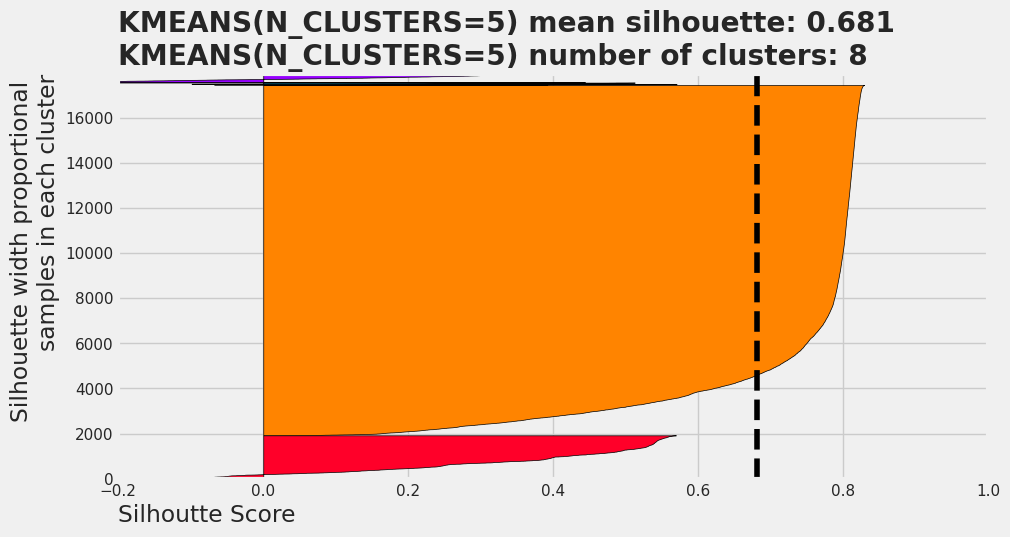

In [123]:
###########################################
# based on MLFlow analysis
# initial model = KMEANS(n_clusters=8)
# because clusters are not that small
###########################################

# load preprocessing pipe from MLFlow
preprocessing_pipe = mlflow.sklearn.load_model(
    os.path.join(".", "mlruns", "179470667288571464", "KMEANS(n_clusters=8)_preprocess")
    )

# inspect loaded model
display(
    "preprocessing_pipe", preprocessing_pipe,
    "columns of dataframe to predict", df_product_agg.columns
    )

# created preprocessed dataframe
df_preprocessed = pd.DataFrame(
    data=preprocessing_pipe.transform(X=df_product_agg),
    columns=preprocessing_pipe.get_feature_names_out()
    )

# inspect results
display("df_preprocessed.head()", df_preprocessed.head())

# load clustering model
clusterer = mlflow.sklearn.load_model(
    model_uri="mlruns/179470667288571464/307f56a130354342a4760bb1adf3b523/artifacts/sklearn_clustering_algo"
)

# inspect loaded model
display("clusterer", clusterer)

# get cluster labels
pred_labels = clusterer.predict(df_preprocessed)

# inspect results
display(
    f"pred_labels: {pred_labels}",
    f"unique pred_labels: {set(pred_labels)}",
    f"value counts for pred_labels: {dict(zip(*np.unique(pred_labels, return_counts=True)))}",
    )

# inspect silhouette
s_dict = silhouette_inspection(
    dataframe=df_preprocessed,
    labels=pred_labels,
    model_name="KMEANS(n_clusters=5)",
    display_figure=True
)

In [124]:
# group clusters with few samples -> easier to interpret
grouped_labels = [-1 if i in (2, 3, 4, 5, 6) else i for i in pred_labels]

# sanity check
assert len(grouped_labels) == len(pred_labels), "Error when grouping clusters"

# inspect unique results
set(grouped_labels)

{-1, 0, 1, 7}

In [125]:
# sanity check
assert len(df_product_agg) == len(pred_labels), "Missing labels on clustering predictions!"

# create a new column with cluster labels
df_product_agg["cluster_labels"] = grouped_labels

# inspect dataframe
display(
    df_product_agg.columns,
    df_product_agg.head()
    )

Index(['product_id', 'nunique_buyer_id', 'nunique_purchase_id',
       'mean_purchase_value', 'nunique_affiliate_id', 'nunique_producer_id',
       'last_purchase_date', 'min_product_creation_date',
       'last_product_category', 'last_product_niche',
       'mean_affiliate_commission_percentual',
       'mean_purchase_device_cellphone', 'mean_purchase_device_desktop',
       'mean_purchase_device_smart_tv', 'mean_purchase_device_tablet',
       'mean_purchase_device_ereaders', 'mean_is_origin_page_social_network',
       'mean_product_age_when_purchased', 'cluster_labels'],
      dtype='object')

product_id  nunique_buyer_id  nunique_purchase_id  mean_purchase_value   
0           4                 2                    2                 -0.5  \
1          17                 1                    1                 -0.5   
2          27                 2                    2                 -0.5   
3          35                 3                    3                 -0.5   
4          39                 3                    3                 -0.5   

   nunique_affiliate_id  nunique_producer_id  last_purchase_date   
0                     1                    1 2016-05-08 21:23:11  \
1                     1                    1 2016-03-09 00:31:23   
2                     2                    1 2016-02-22 13:33:26   
3                     1                    1 2016-05-26 16:45:42   
4                     1                    1 2016-05-27 16:36:25   

  min_product_creation_date last_product_category   last_product_niche   
0       2008-10-27 01:39:34               Podcast              Disease  \
1       2008-10-29 13:54:42               Podcast     Personal finance   
2       2008-10-31 20:53:25               Podcast  Presentation skills   
3       2008-11-02 16:44:11               Podcast  Presentation skills   
4       2008-11-02 19:13:51                   App  Presentation skills   

   mean_affiliate_commission_percentual  mean_purchase_device_cellphone   
0                                   0.0                             0.0  \
1                                  47.0                             0.0   
2                                  25.0                             0.0   
3                                  60.0                             0.0   
4                                  50.0                             0.0   

   mean_purchase_device_desktop  mean_purchase_device_smart_tv   
0                           1.0                            0.0  \
1                           0.0                            0.0   
2                           1.0                            0.0   
3                           0.0                            0.0   
4                           0.0                            0.0   

   mean_purchase_device_tablet  mean_purchase_device_ereaders   
0                          0.0                            0.0  \
1                          0.0                            1.0   
2                          0.0                            0.0   
3                          0.0                            1.0   
4                          0.0                            1.0   

   mean_is_origin_page_social_network  mean_product_age_when_purchased   
0                                 1.0                             89.0  \
1                                 1.0                             89.0   
2                                 1.0                             87.5   
3                                 1.0                             90.0   
4                                 1.0                             90.0   

   cluster_labels  
0               1  
1               0  
2               0  
3               0  
4               0  

[5 rows x 19 columns]

In [126]:
# group data by cluster label and aggregate data for cluster description
df_cluster_description = df_product_agg.groupby(by="cluster_labels", as_index=False).agg(
    size = ("cluster_labels", "size"),
    mean_nunique_buyer_id = ("nunique_buyer_id", "mean"), 
    mean_nunique_purchase_id = ("nunique_purchase_id", "mean"),
    mean_mean_purchase_value = ("mean_purchase_value", "mean"),
    mean_nunique_affiliate_id = ("nunique_affiliate_id", "mean"),
    mean_nunique_producer_id = ("nunique_producer_id", "mean"),
    mean_last_purchase_date = ("last_purchase_date", "mean"),
    mean_min_product_creation_date = ("min_product_creation_date", "mean"),
    mode_last_product_category = ("last_product_category", lambda x: pd.Series.mode(x)[0]),       
    mode_last_product_niche = ("last_product_niche", lambda x: pd.Series.mode(x)[0]),
    mean_affiliate_commission_percentual = ("mean_affiliate_commission_percentual", "mean"),
    mean_purchase_device_cellphone = ("mean_purchase_device_cellphone", "mean"),
    mean_purchase_device_desktop = ("mean_purchase_device_desktop", "mean"),
    mean_purchase_device_smart_tv = ("mean_purchase_device_smart_tv", "mean"),
    mean_purchase_device_tablet = ("mean_purchase_device_tablet", "mean"),
    mean_purchase_device_ereaders = ("mean_purchase_device_ereaders", "mean"),
    mean_is_origin_page_social_network = ("mean_is_origin_page_social_network", "mean"),
    mean_product_age_when_purchased = ("mean_product_age_when_purchased", "mean"),
)

# inspect results
df_cluster_description

cluster_labels   size  mean_nunique_buyer_id  mean_nunique_purchase_id   
0              -1     76                5,039.0                   6,980.1  \
1               0   1911                   37.4                      37.9   
2               1  15534                   33.8                      38.5   
3               7    361                  947.9                   1,104.9   

   mean_mean_purchase_value  mean_nunique_affiliate_id   
0                      -0.1                      122.3  \
1                      -0.2                        5.7   
2                       0.1                        1.6   
3                       0.1                       32.0   

   mean_nunique_producer_id       mean_last_purchase_date   
0                       1.0 2016-06-28 20:56:42.842105344  \
1                       1.0 2016-05-16 09:27:26.986917888   
2                       1.0 2016-05-13 23:24:08.560190720   
3                       1.0 2016-06-24 15:35:46.296398848   

  mean_min_product_creation_date mode_last_product_category   
0  2015-01-01 04:28:08.197368320              Phisical book  \
1  2014-09-01 13:24:12.047618816              Phisical book   
2  2015-06-09 05:33:57.726406656              Phisical book   
3  2015-01-31 05:14:09.756232704              Phisical book   

  mode_last_product_niche  mean_affiliate_commission_percentual   
0      Anxiety management                                  10.1  \
1             Negotiation                                  35.3   
2             Negotiation                                   1.2   
3      Anxiety management                                  13.2   

   mean_purchase_device_cellphone  mean_purchase_device_desktop   
0                             0.0                           0.3  \
1                             0.0                           0.5   
2                             0.0                           0.5   
3                             0.0                           0.4   

   mean_purchase_device_smart_tv  mean_purchase_device_tablet   
0                            0.2                          0.0  \
1                            0.0                          0.0   
2                            0.1                          0.0   
3                            0.1                          0.0   

   mean_purchase_device_ereaders  mean_is_origin_page_social_network   
0                            0.5                                 1.0  \
1                            0.4                                 1.0   
2                            0.4                                 1.0   
3                            0.5                                 1.0   

   mean_product_age_when_purchased  
0                             14.9  
1                             19.0  
2                              9.9  
3                             14.1  

[4 rows x 19 columns]

**Remember that the main focus is to scale, so products with higher mean_nunique_buyer_id and mean_nunique_purchase_id tend to be better.**

In [127]:
# define clusters names
cluster_mapping = {
    -1: "sun",
    7: "mercury",
    1: "venus",
    0: "moon"
}

# create cluster mapping col
df_cluster_description["cluster_name"] = df_cluster_description["cluster_labels"].map(cluster_mapping)

# sanity check
assert df_cluster_description["cluster_name"].isna().sum() == 0, "Missing cluster labels"

# inspect results
df_cluster_description

cluster_labels   size  mean_nunique_buyer_id  mean_nunique_purchase_id   
0              -1     76                5,039.0                   6,980.1  \
1               0   1911                   37.4                      37.9   
2               1  15534                   33.8                      38.5   
3               7    361                  947.9                   1,104.9   

   mean_mean_purchase_value  mean_nunique_affiliate_id   
0                      -0.1                      122.3  \
1                      -0.2                        5.7   
2                       0.1                        1.6   
3                       0.1                       32.0   

   mean_nunique_producer_id       mean_last_purchase_date   
0                       1.0 2016-06-28 20:56:42.842105344  \
1                       1.0 2016-05-16 09:27:26.986917888   
2                       1.0 2016-05-13 23:24:08.560190720   
3                       1.0 2016-06-24 15:35:46.296398848   

  mean_min_product_creation_date mode_last_product_category   
0  2015-01-01 04:28:08.197368320              Phisical book  \
1  2014-09-01 13:24:12.047618816              Phisical book   
2  2015-06-09 05:33:57.726406656              Phisical book   
3  2015-01-31 05:14:09.756232704              Phisical book   

  mode_last_product_niche  mean_affiliate_commission_percentual   
0      Anxiety management                                  10.1  \
1             Negotiation                                  35.3   
2             Negotiation                                   1.2   
3      Anxiety management                                  13.2   

   mean_purchase_device_cellphone  mean_purchase_device_desktop   
0                             0.0                           0.3  \
1                             0.0                           0.5   
2                             0.0                           0.5   
3                             0.0                           0.4   

   mean_purchase_device_smart_tv  mean_purchase_device_tablet   
0                            0.2                          0.0  \
1                            0.0                          0.0   
2                            0.1                          0.0   
3                            0.1                          0.0   

   mean_purchase_device_ereaders  mean_is_origin_page_social_network   
0                            0.5                                 1.0  \
1                            0.4                                 1.0   
2                            0.4                                 1.0   
3                            0.5                                 1.0   

   mean_product_age_when_purchased cluster_name  
0                             14.9          sun  
1                             19.0         moon  
2                              9.9        venus  
3                             14.1      mercury  

[4 rows x 20 columns]

In [128]:
# iterate over clusters
for cluster in ["sun", "mercury", "venus", "moon"]:
    # get info for report
    mean_nunique_buyer_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_buyer_id"].tolist()[0]
    mean_nunique_purchase_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_purchase_id"].tolist()[0]
    mean_mean_purchase_value = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_mean_purchase_value"].tolist()[0]
    mean_nunique_affiliate_id = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_nunique_affiliate_id"].tolist()[0]
    mode_last_product_niche = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mode_last_product_niche"].tolist()[0]
    mean_affiliate_commission_percentual = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_affiliate_commission_percentual"].tolist()[0]
    mean_product_age_when_purchased = df_cluster_description.loc[df_cluster_description["cluster_name"]==cluster, "mean_product_age_when_purchased"].tolist()[0]

    # print report
    print(
        f"{cluster.upper()} cluster:\n"
        f"\taverage number of unique customers:              {int(mean_nunique_buyer_id)}\n"
        f"\taverage number of purchases:                     {int(mean_nunique_purchase_id)}\n"
        f"\taverage purchase value (z-scored):               {mean_mean_purchase_value:.2f}\n"
        f"\taverage number of unique affiliates per product: {int(mean_nunique_affiliate_id)}\n"
        f"\tmost frequent product niche:                     {mode_last_product_niche}\n"
        f"\taverage afilliate commision percentual:          {mean_affiliate_commission_percentual:.2f}\n"
        f"\taverage product age when purchased               {mean_product_age_when_purchased:.1f}\n"
    )

SUN cluster:
	average number of unique customers:              5039
	average number of purchases:                     6980
	average purchase value (z-scored):               -0.13
	average number of unique affiliates per product: 122
	most frequent product niche:                     Anxiety management
	average afilliate commision percentual:          10.08
	average product age when purchased               14.9

MERCURY cluster:
	average number of unique customers:              947
	average number of purchases:                     1104
	average purchase value (z-scored):               0.09
	average number of unique affiliates per product: 31
	most frequent product niche:                     Anxiety management
	average afilliate commision percentual:          13.23
	average product age when purchased               14.1

VENUS cluster:
	average number of unique customers:              33
	average number of purchases:                     38
	average purchase value (z-scored):               

In [129]:
# delete previous section dataframe to save memory
lst = [df_modelling, df_preprocessed, df_product, df_purchase_device_dummies]
del lst
del df_modelling
del df_preprocessed
del df_product
del df_purchase_device_dummies

In [130]:
xxxxxxxxxxxxxxxxxx

NameError: name 'xxxxxxxxxxxxxxxxxx' is not defined

## 5.5 - Data Space Analysis

**Initial inspection on dimensionality reduction potential**

### PCA

In [ ]:
# No need so far

### UMAP

In [ ]:
# No need so far

### t-SNE

In [ ]:
# No need so far

### PHATE

In [ ]:
# No need so far

### KMeans Embedding

In [ ]:
# No need so far

### Tree-Base Embedding

In [ ]:
# No need so far

# **6 - DATA PREPARATION**

## 6.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
xxxxxxxxxxxxxxxxxxxxxxxxxxx

In [ ]:
# create a restore point for the previous section dataframe
df_prep = df_eda.copy()

# check dataframe
check_dataframe( df_prep )

## 6.2 - Remove variables that won't be available in the production environment

*Remove variables that model can use on production to make predictions*

In [ ]:
# TO-DO

## 6.3 - Train-Validation-Test split

*Split dataframe into training, validation and test dataset*

In [ ]:
# TO-DO

## 6.4 - Scale numeric features

*Scale numeric feature to make modelling "easier" for ML models*

### 6.4.1 - Standard Scaler

In [ ]:
# TO-DO

### 6.4.2 - Min-Max Scaler

In [ ]:
# TO-DO

### 6.4.3 - Robust Scaler

In [ ]:
# TO-DO

### 6.4.4 - Discretization

In [ ]:
# TO-DO

## 6.5 - Encode categorical features

*Encode categorical feature to make modelling possible for ML models*

### 6.5.1 - One-Hot Encodingm

In [ ]:
# TO-DO

### 6.5.2 - Ordinal Encoding

In [ ]:
# TO-DO

### 6.5.3 - Target Encoding

In [ ]:
# TO-DO

## 6.6 - Response variable transformation

*Transform target variable (e.g. log, sqrt, etc) to make modelling "easier" for ML models*

In [ ]:
# TO-DO

## 6.7 - Cyclic variables transformation

*Transform cyclic variables (e.g. days of week, months in year, etc) with a sin and cos functions*

In [ ]:
# TO-DO

## 6.8 - Double-check preparation

*Double-check the prepared dataset to make sure it is as expected*

In [ ]:
# TO-DO

# **7 - FEATURE SELECTION**

## 7.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_f_selection = df_prep.copy()

# check dataframe
check_dataframe( df_f_selection )

## 7.2 - Logist regression coefficients

In [ ]:
# TO-DO

## 7.3 - Random forest feature importance

In [ ]:
# TO-DO

## 7.4 - Boruta algorithm

In [ ]:
# TO-DO

## 7.5 - Mutual information

In [ ]:
# TO-DO

# **8 - ML MODEL TRAINING**

## 8.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_train = df_f_selection.copy()

# check dataframe
check_dataframe( df_train )

## 8.2 - Metrics

*Define the metric of success and the health metrics*

In [ ]:
# TO-DO

## 8.3 - Baseline model

*Check the performance metrics with a dummy model to get the baseline metric*

In [ ]:
# TO-DO

## 8.4 - ML models

*Get performance metrics of ML model with cross-validation*

In [ ]:
# TO-DO

## 8.5 - Final modelling comparison

*Compare all models and decide what one is the best (and will be fine-tuned)*

In [ ]:
# TO-DO

# **9 - HYPERPARAMETER TUNNING**

## 9.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_tune = df_train.copy()

# check dataframe
check_dataframe( df_tune )

## 9.2 - Hypertune the best ML model

*Check the best hyperparams for the best ML model*

### 9.2.1 - Grid Search

In [ ]:
# TO-DO

### 9.2.2 - Random Search

In [ ]:
# TO-DO

### 9.2.3 - Bayesian Search

In [ ]:
# TO-DO

## 9.3 - Define best hyperparameters

*Explicitly define best hyper parameters*

In [ ]:
# TO-DO

# **10 - PERFORMANCE EVALUATION AND INTERPRETATION**

## 10.1 - Restore Point

*Create a checkpoint of the last dataframe from previous section*

In [ ]:
# create a restore point for the previous section dataframe
df_perform = df_tune.copy()

# check dataframe
check_dataframe( df_perform )

## 10.2 - Training Performance

*Get final model performance on training data*

In [ ]:
# TO-DO

## 10.3 - Generalization performance

### 10.3.1 - Final model training

*Get final model performance on validation data*

In [ ]:
# TO-DO

### 10.3.2 - Error analysis

*Perform error analysis on final model to make sure it is ready for production*

In [ ]:
# TO-DO

## 10.4 - Define prodution model

*Train ML on "training + validation" data*

In [ ]:
# TO-DO

## 10.5 - Testing performance

*Get production model performance on testing data*

In [ ]:
# TO-DO

## 10.6 - Business performance

*Translate testing performance into business results*

In [ ]:
# TO-DO

# **11 - DEPLOYMENT**

![Deployment architecture](../img/....jpg)

## 11.1 - API creation

*Code to create API for ML predictions*

In [ ]:
# TO-DO

## 11.2 - Docker container

*Code to create a Docker container and deploy ML model*

In [ ]:
# TO-DO